In [ ]:
import pandas as pd

# Load the product dataset
product_data = pd.read_csv("product.csv")  # Replace with your actual file path

# Count the number of products associated with each manufacturer
manufacturer_product_count = product_data.groupby("MANUFACTURER")["PRODUCT_ID"].nunique().reset_index()

# Rename columns for clarity
manufacturer_product_count.columns = ["MANUFACTURER", "PRODUCT_COUNT"]

# Sort by product count in descending order
manufacturer_product_count = manufacturer_product_count.sort_values(by="PRODUCT_COUNT", ascending=False)

# Save the output to a CSV file (optional)
manufacturer_product_count.to_csv("manufacturer_product_count.csv", index=False)

# Print the results
print(manufacturer_product_count)


      MANUFACTURER  PRODUCT_COUNT
68              69          12676
1                2           1411
5421          5423           1376
763            764           1332
1406          1407           1210
...            ...            ...
3745          3746              1
3750          3751              1
3751          3752              1
3753          3754              1
6475          6477              1

[6476 rows x 2 columns]


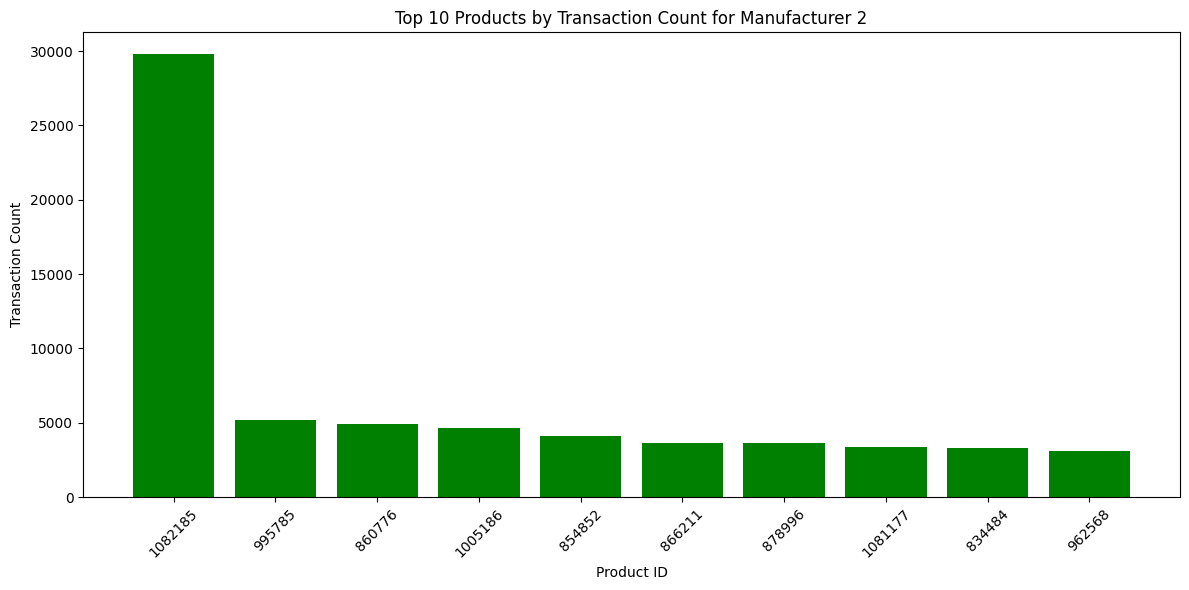

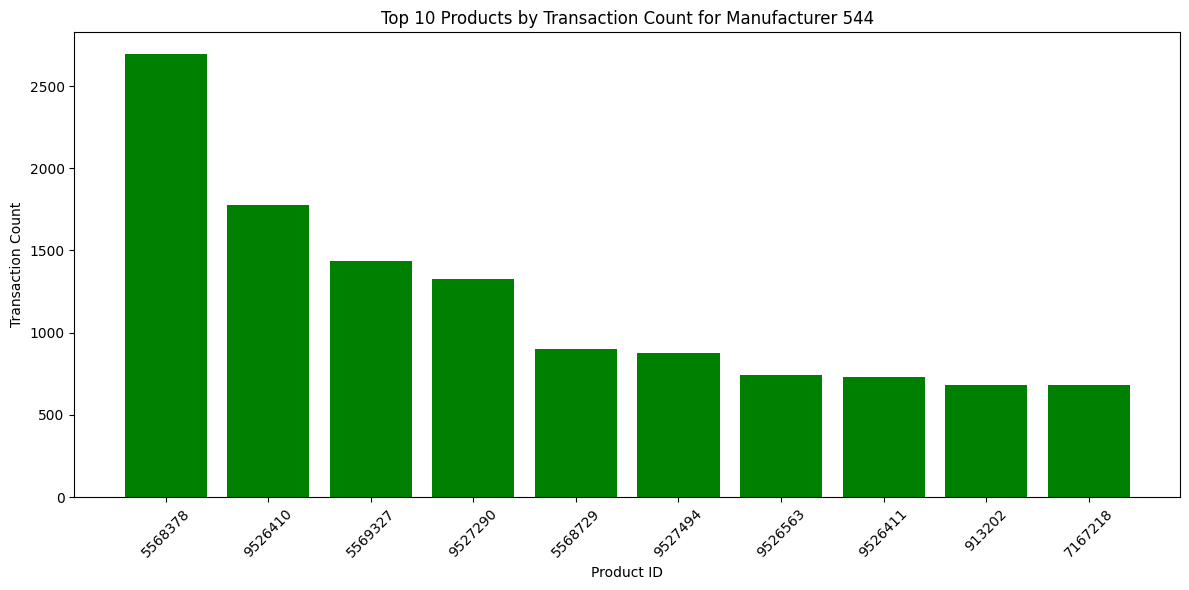

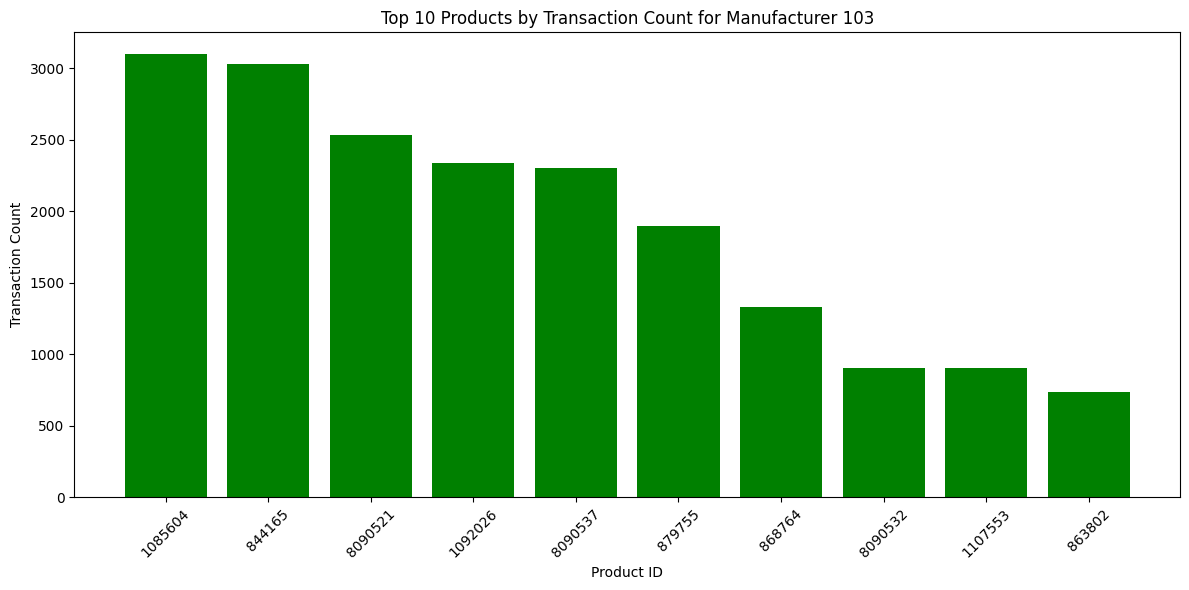

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
product_data = pd.read_csv("product.csv")  # Replace with your actual file path
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with your actual file path

# Merge product and transaction data on PRODUCT_ID
merged_data = transaction_data.merge(product_data, on="PRODUCT_ID", how="inner")

# Count transactions for each manufacturer
manufacturer_transactions = (
    merged_data.groupby("MANUFACTURER")["BASKET_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"BASKET_ID": "TRANSACTION_COUNT"})
)

# Identify the top 5 manufacturers by transaction count
top_5_manufacturers = manufacturer_transactions.sort_values("TRANSACTION_COUNT", ascending=False).head(5)

# Get the top 10 products for each of the top 5 manufacturers
top_products_by_manufacturer = (
    merged_data.groupby(["MANUFACTURER", "PRODUCT_ID"])["BASKET_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"BASKET_ID": "TRANSACTION_COUNT"})
)

top_products_by_manufacturer = (
    top_products_by_manufacturer.sort_values(["MANUFACTURER", "TRANSACTION_COUNT"], ascending=[True, False])
    .groupby("MANUFACTURER")
    .head(10)
)

# Plot individual bar charts for the top 10 products of each of the top 5 manufacturers
for manufacturer in top_5_manufacturers["MANUFACTURER"]:
    manufacturer_data = top_products_by_manufacturer[top_products_by_manufacturer["MANUFACTURER"] == manufacturer]
    plt.figure(figsize=(12, 6))
    plt.bar(
        manufacturer_data["PRODUCT_ID"].astype(str),
        manufacturer_data["TRANSACTION_COUNT"],
        color="green"
    )
    plt.title(f"Top 10 Products by Transaction Count for Manufacturer {manufacturer}")
    plt.xlabel("Product ID")
    plt.ylabel("Transaction Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Load the datasets
campaign_table = pd.read_csv("campaign_table.csv")  # Replace with your actual file path
coupon = pd.read_csv("coupon.csv")  # Replace with your actual file path
product = pd.read_csv("product.csv")  # Replace with your actual file path

# Merge coupon data with product data to associate products with manufacturers
coupon_product_data = coupon.merge(product, on="PRODUCT_ID", how="inner")

# A. Count how many campaigns feature each manufacturer's products
manufacturer_campaign_count = (
    coupon_product_data.groupby("MANUFACTURER")["CAMPAIGN"]
    .nunique()
    .reset_index()
    .rename(columns={"CAMPAIGN": "CAMPAIGN_COUNT"})
)


In [ ]:

# B. Count the number of households targeted by campaigns for each manufacturer
# Merge campaign_table with coupon_product_data to link households with manufacturers
household_campaign_data = campaign_table.merge(
    coupon_product_data, on="CAMPAIGN", how="inner"
)

manufacturer_household_count = (
    household_campaign_data.groupby("MANUFACTURER")["HOUSEHOLD_KEY"]
    .nunique()
    .reset_index()
    .rename(columns={"HOUSEHOLD_KEY": "HOUSEHOLD_COUNT"})
)

# Merge results for a combined view
manufacturer_campaign_presence = manufacturer_campaign_count.merge(
    manufacturer_household_count, on="MANUFACTURER"
)

# Sort by campaign count in descending order
manufacturer_campaign_presence = manufacturer_campaign_presence.sort_values(
    by="CAMPAIGN_COUNT", ascending=False
)

# Save the result to a CSV file (optional)
manufacturer_campaign_presence.to_csv("manufacturer_campaign_presence.csv", index=False)

# Print the results
print("Manufacturer Campaign Representation:")
print(manufacturer_campaign_presence.head())




---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the product dataset
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
product_data.columns = product_data.columns.str.upper()

# Filter for Manufacturer 69
manufacturer_69_products = product_data[product_data["MANUFACTURER"] == 69]

# Aggregate by department
department_stats = manufacturer_69_products.groupby("DEPARTMENT").agg(
    COUNT=("PRODUCT_ID", "count")
).reset_index()

# Sort by count and get the top 5 departments
top_departments = department_stats.nlargest(5, "COUNT")

# Visualize the top 5 departments
plt.figure(figsize=(10, 5))  # Larger figure size for better visibility

# Barplot for count with colorful palette
sns.barplot(data=top_departments, x="DEPARTMENT", y="COUNT", palette="viridis")
plt.title("Top 5 Departments for Manufacturer 69", fontsize=16)
plt.xlabel("Department", fontsize=14)
plt.ylabel("Count", fontsize=14)



# Display the plot
plt.tight_layout()
plt.show()

# Print top departments data
print("Top 5 Departments for Manufacturer 69:")
print(top_departments)


<ipython-input-20-8ac6a1e1ee07>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_departments, x="DEPARTMENT", y="COUNT", palette="viridis")


Top 5 Departments for Manufacturer 69:
    DEPARTMENT  COUNT
4      GROCERY   8704
2      DRUG GM   1657
10      PASTRY    703
7   MEAT-PCKGD    421
1         DELI    418



Top 10 Manufacturers based on nunique of DEPARTMENT:
      MANUFACTURER  COUNT
1                2     20
68              69     14
5421          5423     13
4                5     13
902            903      7
692            693      7
5109          5111      7
763            764      6
1440          1441      5
894            895      5



Top 10 Manufacturers based on count of DEPARTMENT:
      MANUFACTURER  COUNT
68              69  12676
1                2   1411
5421          5423   1376
763            764   1332
1406          1407   1210
692            693    979
543            544    915
5141          5143    771
1045          1046    717
1250          1251    685


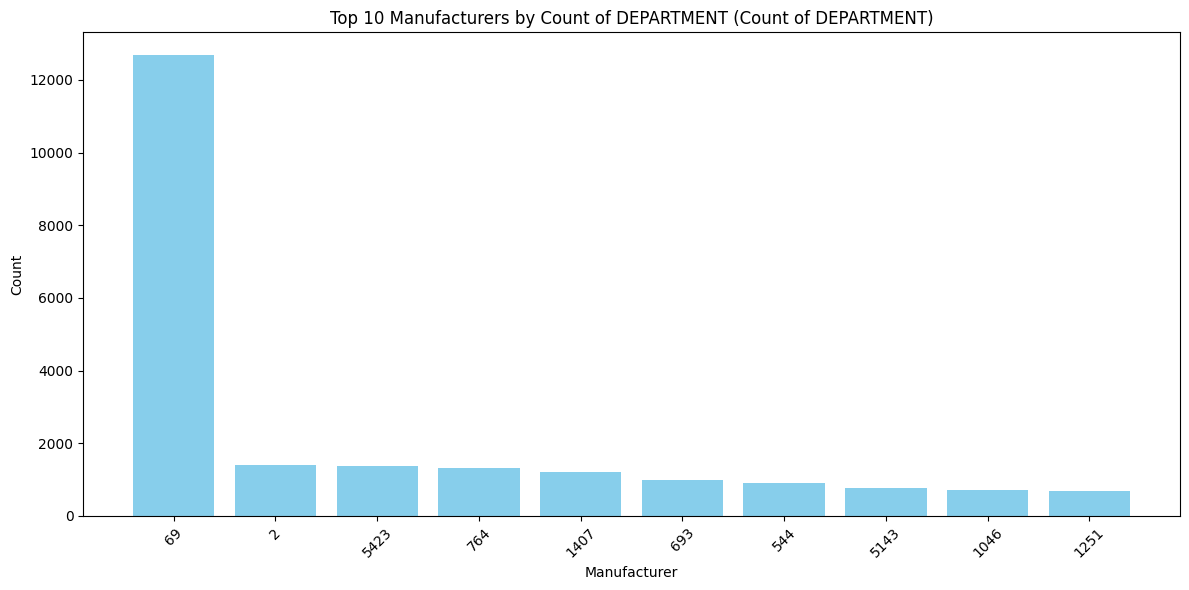


Top 10 Manufacturers based on nunique of COMMODITY_DESC:
      MANUFACTURER  COUNT
68              69    205
5421          5423     87
1                2     75
902            903     40
894            895     34
5109          5111     33
763            764     30
672            673     30
416            417     21
530            531     20


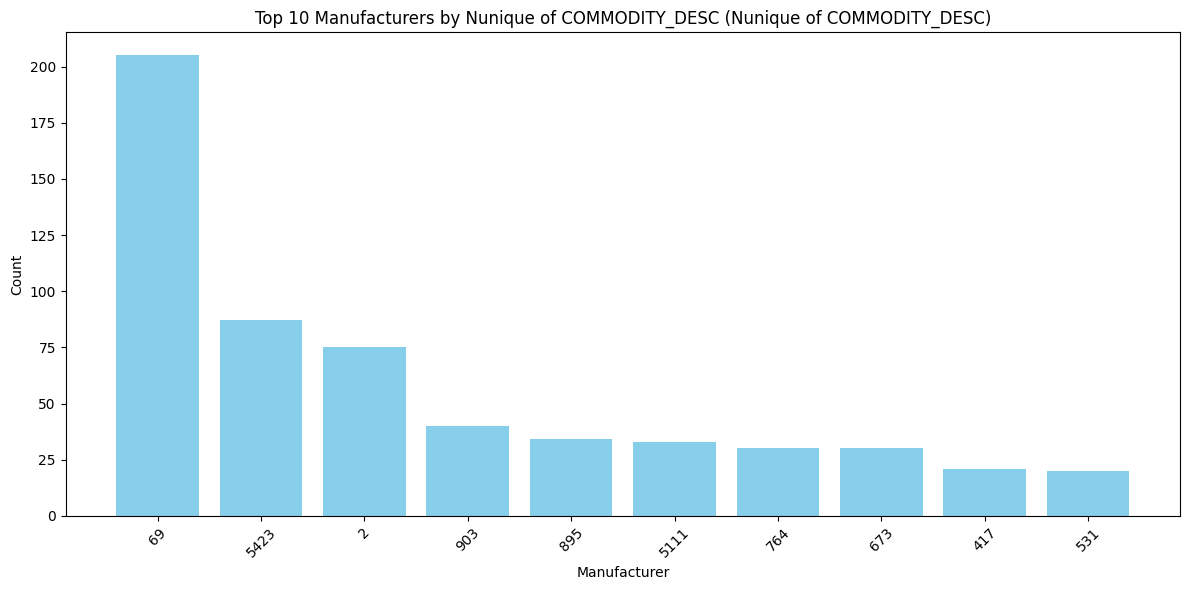


Top 10 Manufacturers based on count of COMMODITY_DESC:
      MANUFACTURER  COUNT
68              69  12676
1                2   1411
5421          5423   1376
763            764   1332
1406          1407   1210
692            693    979
543            544    915
5141          5143    771
1045          1046    717
1250          1251    685



Top 10 Manufacturers based on nunique of SUB_COMMODITY_DESC:
      MANUFACTURER  COUNT
68              69    854
5421          5423    293
1                2    195
672            673    133
894            895     82
902            903     78
763            764     66
5109          5111     44
530            531     44
5995          5997     40


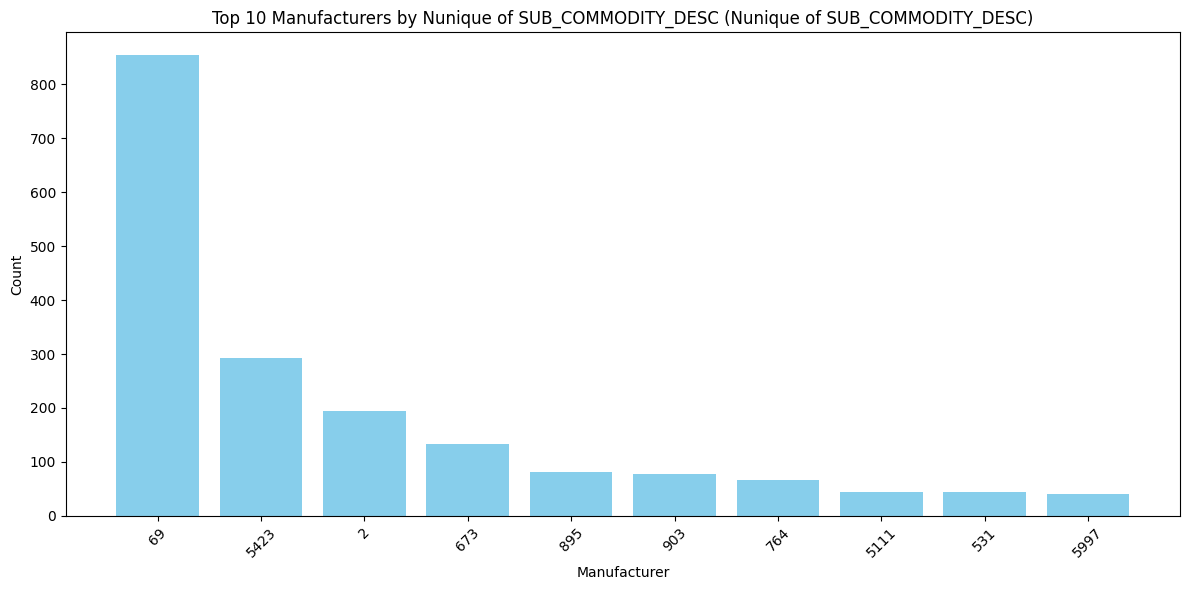


Top 10 Manufacturers based on count of SUB_COMMODITY_DESC:
      MANUFACTURER  COUNT
68              69  12676
1                2   1411
5421          5423   1376
763            764   1332
1406          1407   1210
692            693    979
543            544    915
5141          5143    771
1045          1046    717
1250          1251    685


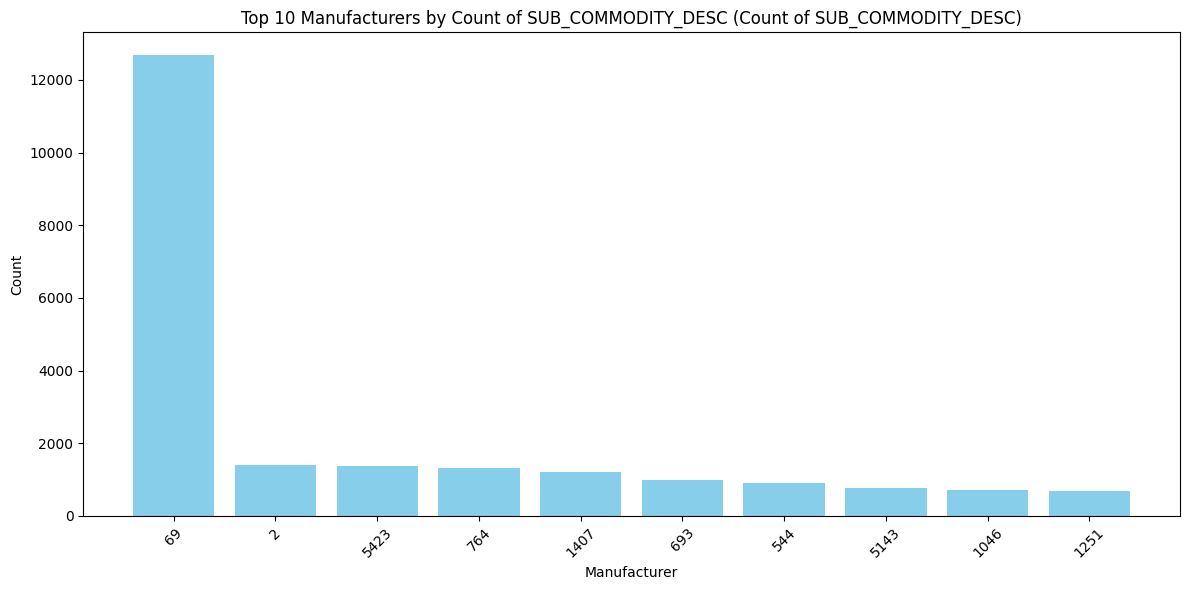


Top 10 Manufacturers based on nunique of PRODUCT_ID:
      MANUFACTURER  COUNT
68              69  12676
1                2   1411
5421          5423   1376
763            764   1332
1406          1407   1210
692            693    979
543            544    915
5141          5143    771
1045          1046    717
1250          1251    685


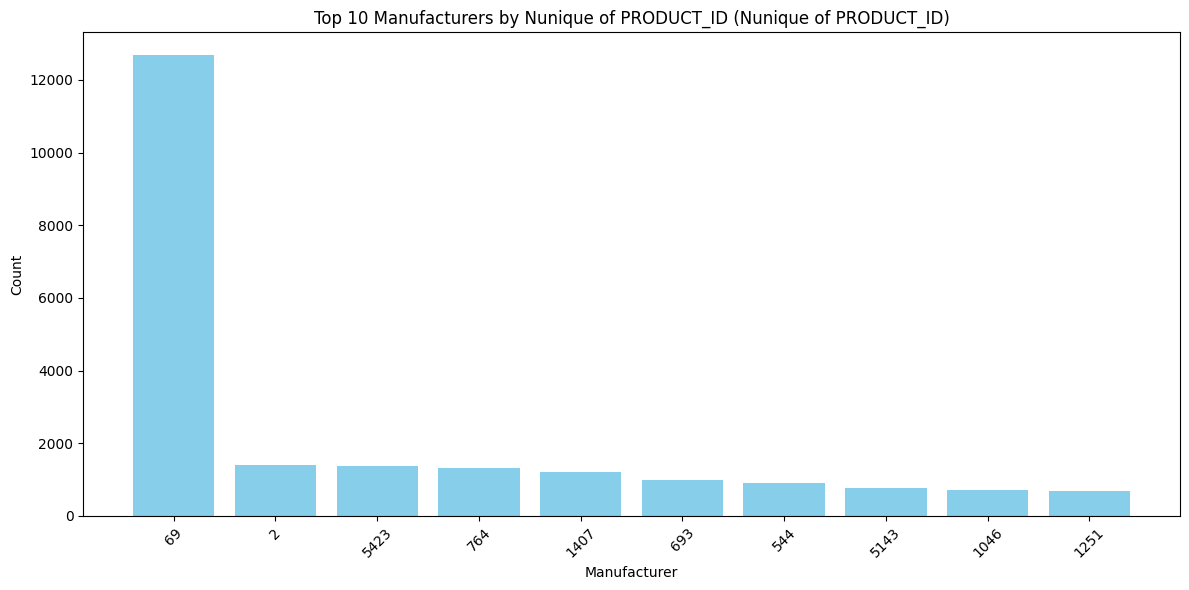


Top 10 Manufacturers based on count of PRODUCT_ID:
      MANUFACTURER  COUNT
68              69  12676
1                2   1411
5421          5423   1376
763            764   1332
1406          1407   1210
692            693    979
543            544    915
5141          5143    771
1045          1046    717
1250          1251    685


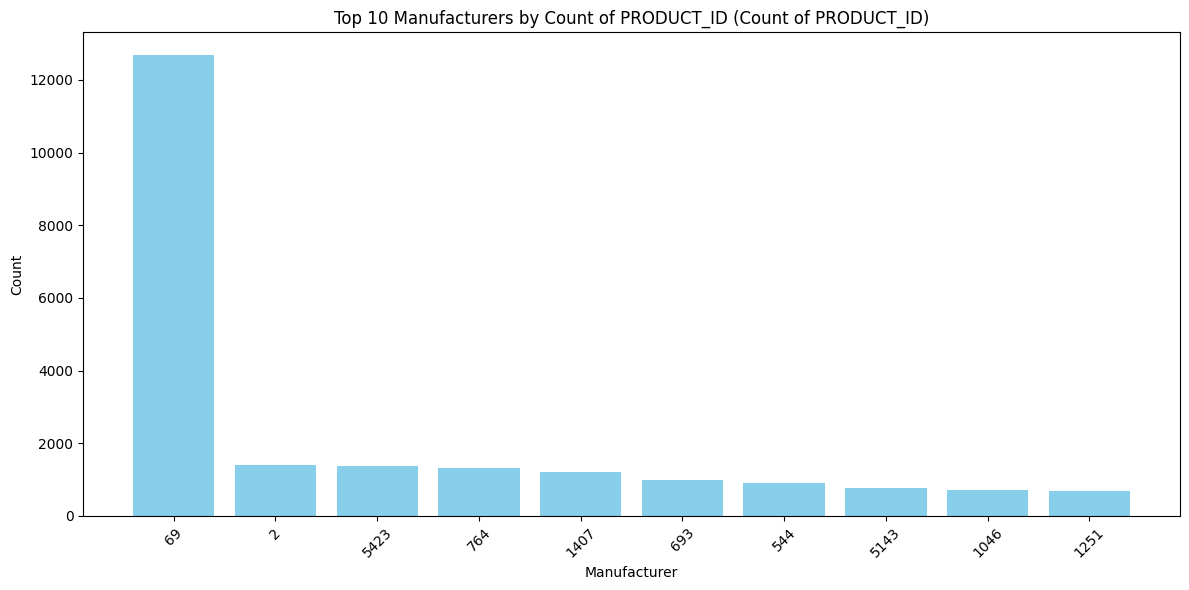

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the product table
product_data = pd.read_csv("product.csv")  # Replace with your actual file path

# Function to get top 10 manufacturers based on a column
def top_10_manufacturers(column, agg_func="nunique", title="Top 10 Manufacturers", xlabel="Count"):
    # Aggregate data based on the specified column
    if agg_func == "nunique":
        manufacturer_stats = product_data.groupby("MANUFACTURER")[column].nunique().reset_index()
    elif agg_func == "count":
        manufacturer_stats = product_data.groupby("MANUFACTURER")[column].count().reset_index()
    else:
        raise ValueError("Unsupported aggregation function. Use 'nunique' or 'count'.")

    manufacturer_stats.columns = ["MANUFACTURER", "COUNT"]
    manufacturer_stats = manufacturer_stats.sort_values(by="COUNT", ascending=False).head(10)

    # Descriptive output
    print(f"\nTop 10 Manufacturers based on {agg_func} of {column}:")
    print(manufacturer_stats)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.bar(manufacturer_stats["MANUFACTURER"].astype(str), manufacturer_stats["COUNT"], color="skyblue")
    plt.title(f"{title} ({agg_func.capitalize()} of {column})")
    plt.xlabel("Manufacturer")
    plt.ylabel(xlabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analyze based on all individual columns in the product table
columns_to_analyze = ["DEPARTMENT", "COMMODITY_DESC", "SUB_COMMODITY_DESC", "PRODUCT_ID"]
aggregation_methods = ["nunique", "count"]

for column in columns_to_analyze:
    for agg in aggregation_methods:
        top_10_manufacturers(
            column,
            agg_func=agg,
            title=f"Top 10 Manufacturers by {agg.capitalize()} of {column}",
            xlabel="Count"
        )


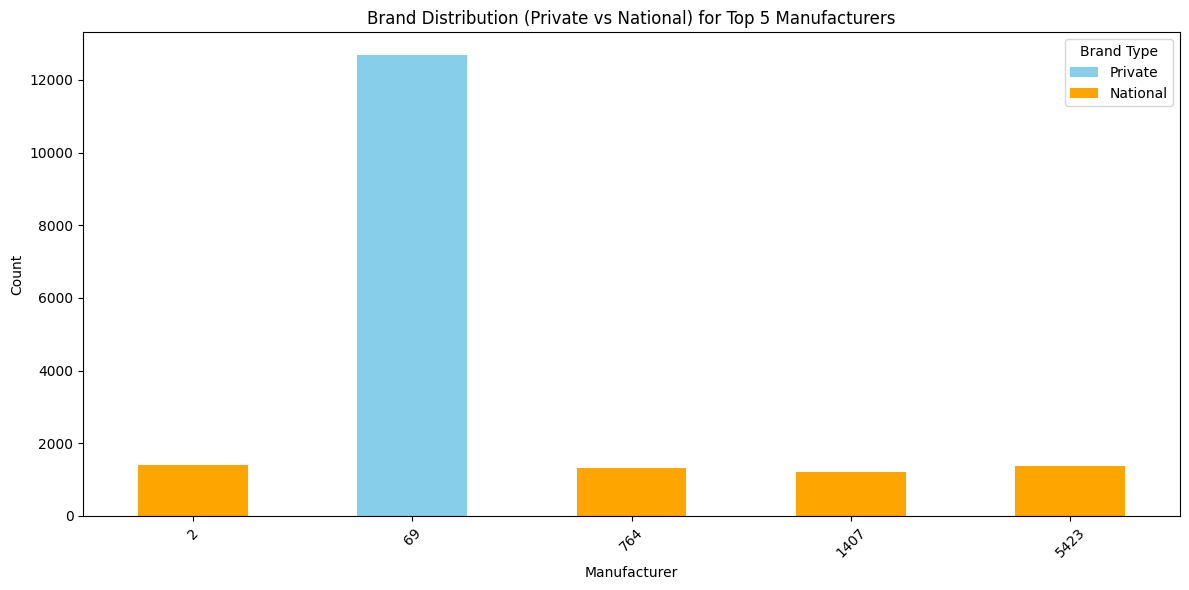

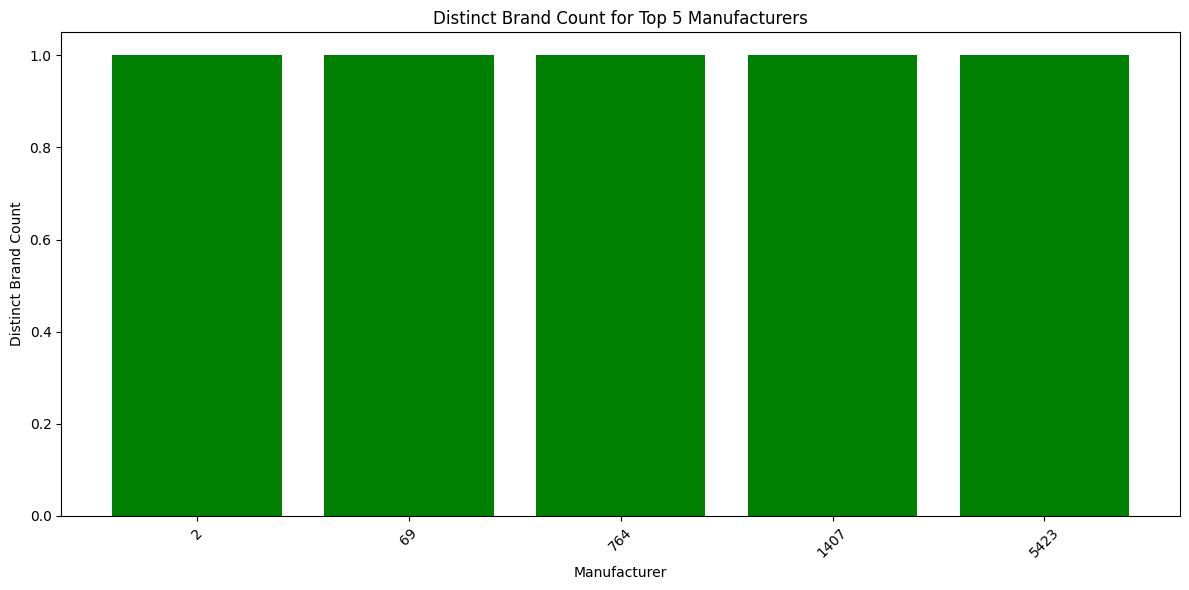

Brand Dominance (Most Frequent Brand Type) for Top 5 Manufacturers:
   MANUFACTURER     BRAND  COUNT
0             2  National   1411
1            69   Private  12676
2           764  National   1332
3          1407  National   1210
4          5423  National   1376


<ipython-input-3-c2e9e6b07e18>:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_dominance = brand_distribution.groupby("MANUFACTURER").apply(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the top 5 manufacturers
top_5_manufacturers = [69, 2, 5423, 764, 1407]

# Filter data for the top 5 manufacturers
filtered_data = product_data[product_data["MANUFACTURER"].isin(top_5_manufacturers)]

# A. Brand Distribution
brand_distribution = (
    filtered_data.groupby(["MANUFACTURER", "BRAND"])["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "COUNT"})
)

# Pivot for visualization
brand_pivot = brand_distribution.pivot(index="MANUFACTURER", columns="BRAND", values="COUNT").fillna(0)
brand_pivot["Total"] = brand_pivot.sum(axis=1)

# Plot: Private vs National Brands for Top Manufacturers
brand_pivot[["Private", "National"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), color=["skyblue", "orange"]
)
plt.title("Brand Distribution (Private vs National) for Top 5 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Brand Type")
plt.tight_layout()
plt.show()

# B. Distinct Brand Count
distinct_brand_count = (
    filtered_data.groupby("MANUFACTURER")["BRAND"]
    .nunique()
    .reset_index()
    .rename(columns={"BRAND": "DISTINCT_BRAND_COUNT"})
)

# Plot: Distinct Brand Count
plt.figure(figsize=(12, 6))
plt.bar(
    distinct_brand_count["MANUFACTURER"].astype(str),
    distinct_brand_count["DISTINCT_BRAND_COUNT"],
    color="green"
)
plt.title("Distinct Brand Count for Top 5 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Distinct Brand Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# C. Brand Dominance
# Identify the dominant brand type (Private/National) for each manufacturer
brand_dominance = brand_distribution.groupby("MANUFACTURER").apply(
    lambda x: x.loc[x["COUNT"].idxmax()]
).reset_index(drop=True)

# Descriptive Output
print("Brand Dominance (Most Frequent Brand Type) for Top 5 Manufacturers:")
print(brand_dominance)


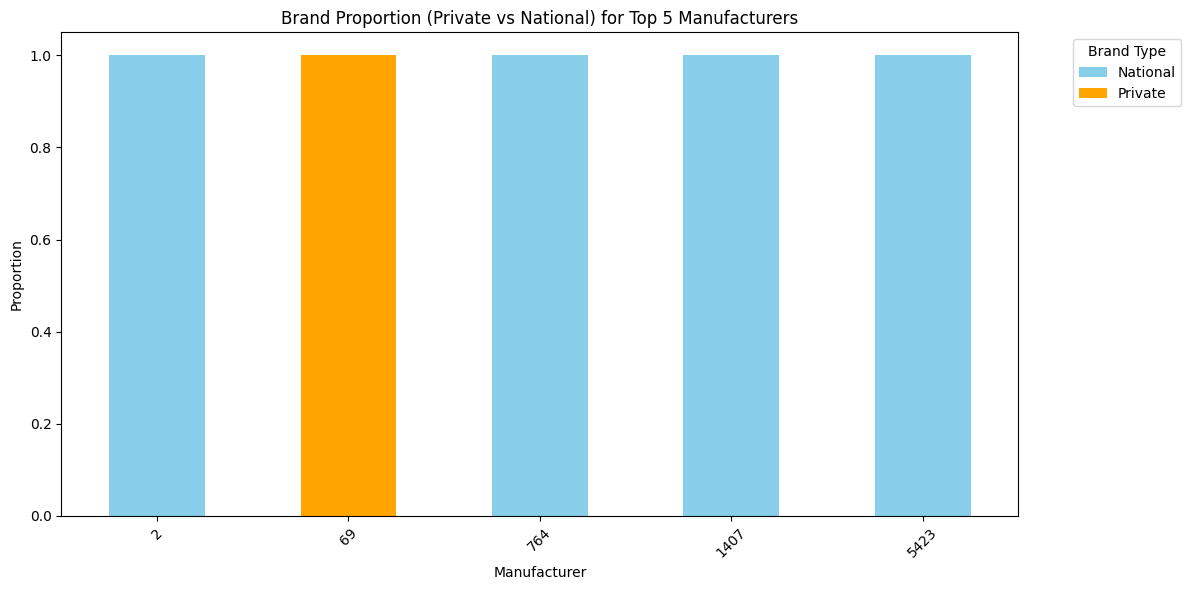

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the top 5 manufacturers
top_5_manufacturers = [69, 2, 5423, 764, 1407]

# Filter data for the top 5 manufacturers
filtered_data = product_data[product_data["MANUFACTURER"].isin(top_5_manufacturers)]

# A. Brand Distribution
brand_distribution = (
    filtered_data.groupby(["MANUFACTURER", "BRAND"])["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "COUNT"})
)

# Pivot for visualization and normalize to proportions
brand_pivot = brand_distribution.pivot(index="MANUFACTURER", columns="BRAND", values="COUNT").fillna(0)
brand_pivot["Total"] = brand_pivot.sum(axis=1)

# Normalize to proportions
brand_pivot_normalized = brand_pivot.div(brand_pivot["Total"], axis=0).drop(columns="Total")

# Plot: Proportional Stacked Bar Chart
brand_pivot_normalized.plot(
    kind="bar", stacked=True, figsize=(12, 6), color=["skyblue", "orange"]
)
plt.title("Brand Proportion (Private vs National) for Top 5 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Brand Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


# Define the top 5 manufacturers
top_5_manufacturers = [69, 2, 5423, 764, 1407]

# Filter data for the top 5 manufacturers
filtered_data = product_data[product_data["MANUFACTURER"].isin(top_5_manufacturers)]

# A. Identify common departments across the manufacturers
common_departments = (
    filtered_data.groupby(["MANUFACTURER", "DEPARTMENT"])["PRODUCT_ID"]
    .count()
    .reset_index()
    .groupby("DEPARTMENT")["MANUFACTURER"]
    .nunique()
    .reset_index()
)

# Filter for departments present across all 5 manufacturers
common_departments = common_departments[common_departments["MANUFACTURER"] == len(top_5_manufacturers)]

# B. Rank common departments by total product count
top_common_departments = (
    filtered_data[filtered_data["DEPARTMENT"].isin(common_departments["DEPARTMENT"])]
    .groupby("DEPARTMENT")["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "TOTAL_PRODUCTS"})
    .sort_values("TOTAL_PRODUCTS", ascending=False)
    .head(5)
)

# Display the top 5 common departments
print("Top 5 Common Departments for Competitor Analysis:")
print(top_common_departments)

# Optional: Save results to a CSV file
top_common_departments.to_csv("top_5_common_departments.csv", index=False)


Top 5 Common Departments for Competitor Analysis:
  DEPARTMENT  TOTAL_PRODUCTS
0    DRUG GM            3597


<Figure size 1200x600 with 0 Axes>

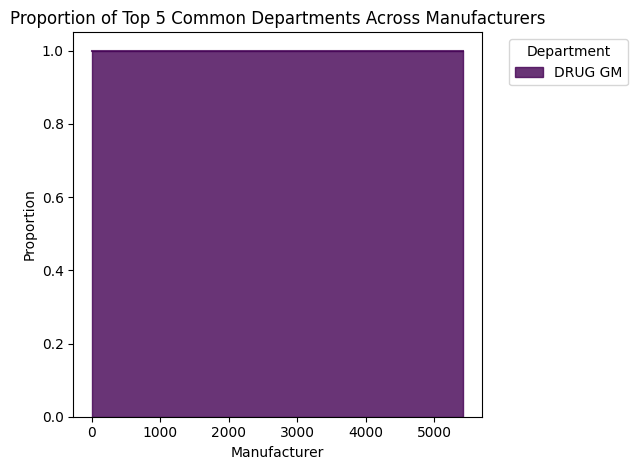

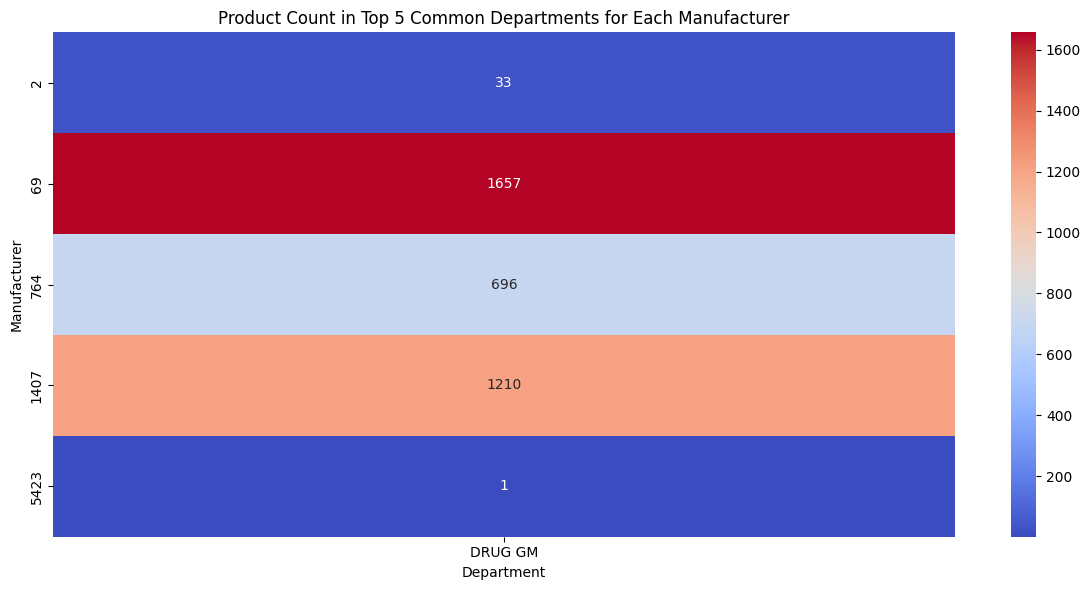

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the top 5 manufacturers
top_5_manufacturers = [69, 2, 5423, 764, 1407]

# Filter data for the top 5 manufacturers
filtered_data = product_data[product_data["MANUFACTURER"].isin(top_5_manufacturers)]

# A. Identify common departments across the manufacturers
common_departments = (
    filtered_data.groupby(["MANUFACTURER", "DEPARTMENT"])["PRODUCT_ID"]
    .count()
    .reset_index()
    .groupby("DEPARTMENT")["MANUFACTURER"]
    .nunique()
    .reset_index()
)

# Filter for departments present across all 5 manufacturers
common_departments = common_departments[common_departments["MANUFACTURER"] == len(top_5_manufacturers)]

# B. Rank common departments by total product count
top_common_departments = (
    filtered_data[filtered_data["DEPARTMENT"].isin(common_departments["DEPARTMENT"])]
    .groupby("DEPARTMENT")["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "TOTAL_PRODUCTS"})
    .sort_values("TOTAL_PRODUCTS", ascending=False)
    .head(5)
)

# Filter data for top 5 common departments
top_departments = top_common_departments["DEPARTMENT"].tolist()
filtered_top_departments = filtered_data[filtered_data["DEPARTMENT"].isin(top_departments)]

# C. Prepare data for visualizations
# Group by manufacturer and department for stacked area chart and heatmap
department_distribution = (
    filtered_top_departments.groupby(["MANUFACTURER", "DEPARTMENT"])["PRODUCT_ID"]
    .count()
    .unstack(fill_value=0)
)

# Normalize data for the stacked area chart
normalized_data = department_distribution.div(department_distribution.sum(axis=1), axis=0)

# Stacked Area Chart
plt.figure(figsize=(12, 6))
normalized_data.plot(kind="area", stacked=True, colormap="viridis", alpha=0.8)
plt.title("Proportion of Top 5 Common Departments Across Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Proportion")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(department_distribution, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Product Count in Top 5 Common Departments for Each Manufacturer")
plt.xlabel("Department")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Find the top 5 departments for Manufacturer 69
focal_manufacturer = 69

# Filter data for Manufacturer 69
manufacturer_69_data = product_data[product_data["MANUFACTURER"] == focal_manufacturer]

# Group by department and count the number of products
top_departments_69 = (
    manufacturer_69_data.groupby("DEPARTMENT")["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "TOTAL_PRODUCTS"})
    .sort_values("TOTAL_PRODUCTS", ascending=False)
    .head(5)
)

# Print the top 5 departments for Manufacturer 69
print("\nTop 5 Departments for Manufacturer 69:")
print(top_departments_69)

# Step 2: Find the top 10 manufacturers for each of the top 5 departments
top_departments = top_departments_69["DEPARTMENT"].tolist()

# Filter data for the top 5 departments
top_departments_data = product_data[product_data["DEPARTMENT"].isin(top_departments)]

# Group by department and manufacturer to count the number of products
top_10_manufacturers_per_department = (
    top_departments_data.groupby(["DEPARTMENT", "MANUFACTURER"])["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "TOTAL_PRODUCTS"})
    .sort_values(["DEPARTMENT", "TOTAL_PRODUCTS"], ascending=[True, False])
    .groupby("DEPARTMENT")
    .head(10)
)

# Print the top 10 manufacturers for each department
print("\nTop 10 Manufacturers for Each of the Top 5 Departments:")
print(top_10_manufacturers_per_department)



Top 5 Departments for Manufacturer 69:
    DEPARTMENT  TOTAL_PRODUCTS
4      GROCERY            8704
2      DRUG GM            1657
10      PASTRY             703
7   MEAT-PCKGD             421
1         DELI             418

Top 10 Manufacturers for Each of the Top 5 Departments:
      DEPARTMENT  MANUFACTURER  TOTAL_PRODUCTS
3           DELI            69             418
794         DELI          5423             100
46          DELI          1025              63
22          DELI           454              48
791         DELI          5355              45
67          DELI          1456              40
16          DELI           379              39
6           DELI           214              34
92          DELI          2135              31
42          DELI           961              28
851      DRUG GM            69            1657
1434     DRUG GM          1407            1210
1124     DRUG GM           693             893
2170     DRUG GM          5143             771
1155     DRU

In [ ]:
import pandas as pd


# Step 1: Identify Top 5 Departments for Manufacturer 69
focal_manufacturer = 69

# Filter data for Manufacturer 69
manufacturer_69_data = product_data[product_data["MANUFACTURER"] == focal_manufacturer]

# Top 5 departments based on total product count
top_departments_69_count = (
    manufacturer_69_data.groupby("DEPARTMENT")["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "TOTAL_PRODUCTS"})
    .sort_values("TOTAL_PRODUCTS", ascending=False)
    .head(5)
)

# Top 5 departments based on unique product count
top_departments_69_nunique = (
    manufacturer_69_data.groupby("DEPARTMENT")["PRODUCT_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "UNIQUE_PRODUCTS"})
    .sort_values("UNIQUE_PRODUCTS", ascending=False)
    .head(5)
)

# Print comparisons
print("\nTop 5 Departments for Manufacturer 69 (Based on Count):")
print(top_departments_69_count)

print("\nTop 5 Departments for Manufacturer 69 (Based on Unique Count):")
print(top_departments_69_nunique)

# Step 2: Compare Competitors in Top Departments
# Merge to find common top departments
top_departments = set(top_departments_69_count["DEPARTMENT"]).intersection(
    top_departments_69_nunique["DEPARTMENT"]
)

# Filter data for top departments
filtered_top_departments = product_data[product_data["DEPARTMENT"].isin(top_departments)]

# Competitor analysis for total count
competitors_count = (
    filtered_top_departments.groupby(["DEPARTMENT", "MANUFACTURER"])["PRODUCT_ID"]
    .count()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "TOTAL_PRODUCTS"})
    .sort_values(["DEPARTMENT", "TOTAL_PRODUCTS"], ascending=[True, False])
    .groupby("DEPARTMENT")
    .head(10)
)

# Competitor analysis for unique count
competitors_nunique = (
    filtered_top_departments.groupby(["DEPARTMENT", "MANUFACTURER"])["PRODUCT_ID"]
    .nunique()
    .reset_index()
    .rename(columns={"PRODUCT_ID": "UNIQUE_PRODUCTS"})
    .sort_values(["DEPARTMENT", "UNIQUE_PRODUCTS"], ascending=[True, False])
    .groupby("DEPARTMENT")
    .head(10)
)

# Print results
print("\nCompetitors in Top Departments (Based on Count):")
print(competitors_count)

print("\nCompetitors in Top Departments (Based on Unique Count):")
print(competitors_nunique)



Top 5 Departments for Manufacturer 69 (Based on Count):
    DEPARTMENT  TOTAL_PRODUCTS
4      GROCERY            8704
2      DRUG GM            1657
10      PASTRY             703
7   MEAT-PCKGD             421
1         DELI             418

Top 5 Departments for Manufacturer 69 (Based on Unique Count):
    DEPARTMENT  UNIQUE_PRODUCTS
4      GROCERY             8704
2      DRUG GM             1657
10      PASTRY              703
7   MEAT-PCKGD              421
1         DELI              418

Competitors in Top Departments (Based on Count):
      DEPARTMENT  MANUFACTURER  TOTAL_PRODUCTS
3           DELI            69             418
794         DELI          5423             100
46          DELI          1025              63
22          DELI           454              48
791         DELI          5355              45
67          DELI          1456              40
16          DELI           379              39
6           DELI           214              34
92          DELI          21

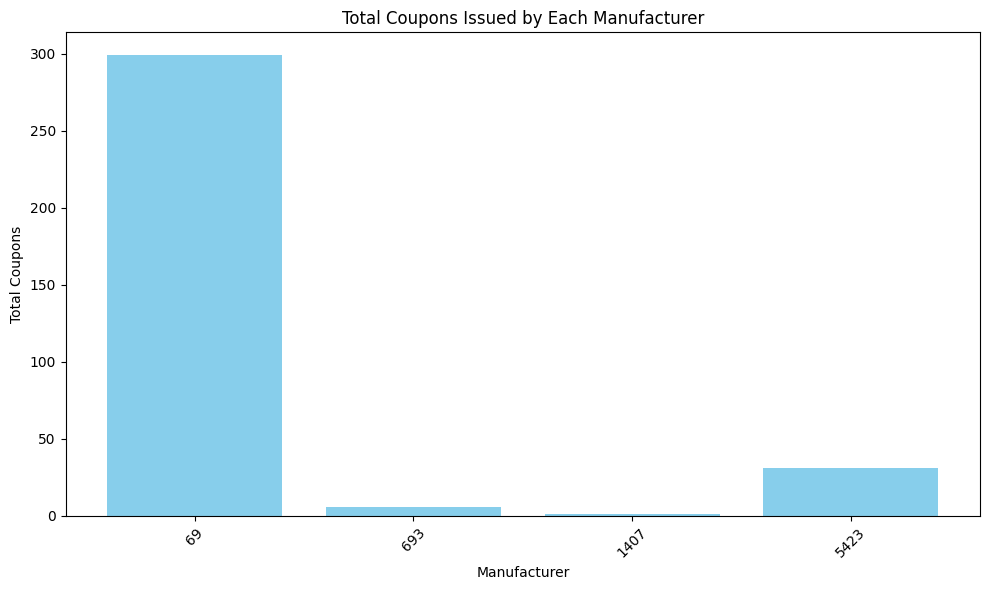

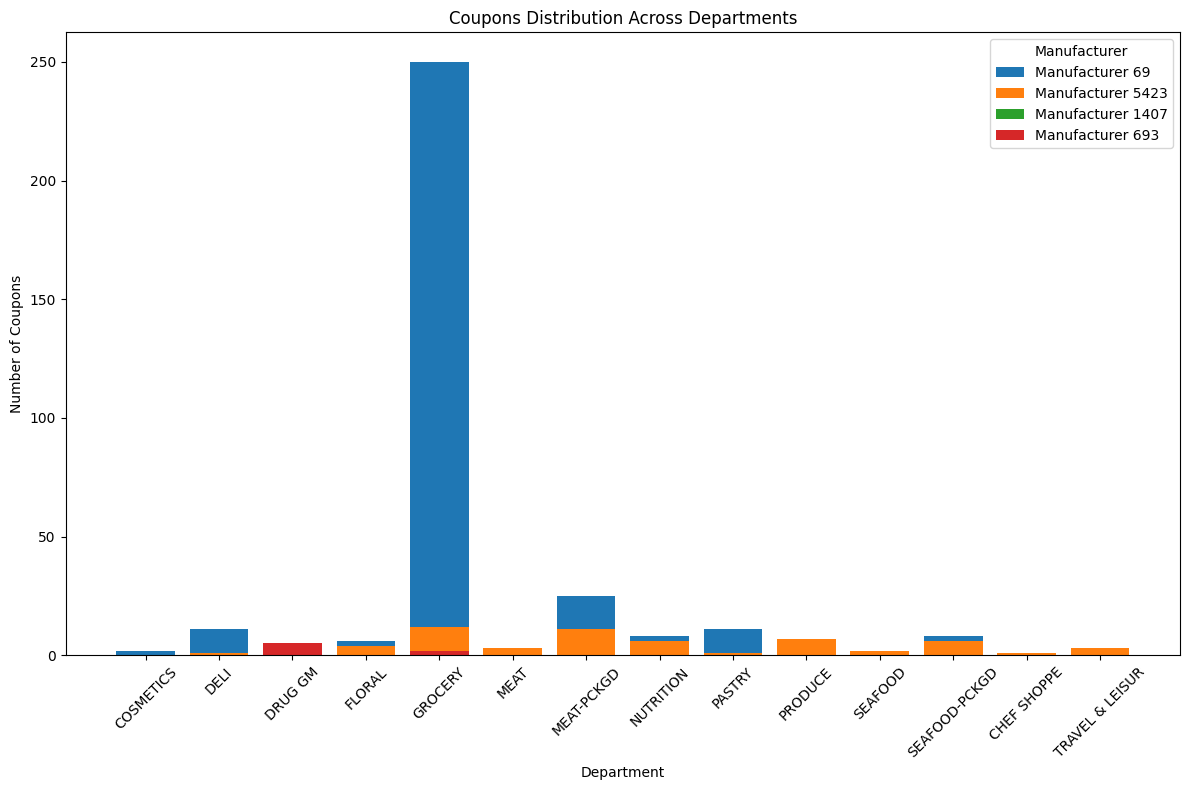


Total Coupons Issued by Manufacturer:
   MANUFACTURER  TOTAL_COUPONS
0            69            299
1           693              6
2          1407              1
3          5423             31

Coupons by Department:
   MANUFACTURER DEPARTMENT  COUPONS_BY_DEPARTMENT
0            69  COSMETICS                      2
1            69       DELI                     11
2            69    DRUG GM                      4
3            69     FLORAL                      6
4            69    GROCERY                    250

Coupons by Commodity:
   MANUFACTURER      COMMODITY_DESC  COUPONS_BY_COMMODITY
0            69  ADULT INCONTINENCE                     2
1            69            AIR CARE                     3
2            69          ANALGESICS                     2
3            69            ANTACIDS                     2
4            69              APPLES                     3

Coupons by Sub-Commodity:
   MANUFACTURER         SUB_COMMODITY_DESC  COUPONS_BY_SUB_COMMODITY
0            69

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
coupon_data = pd.read_csv("coupon.csv")  # Replace with actual file path
product_data = pd.read_csv("product.csv")  # Replace with actual file path

# Define selected manufacturers
selected_manufacturers = [69, 5423, 1407, 693]

# Step 1: Filter coupon data for selected manufacturers
filtered_coupons = coupon_data.merge(product_data, on="PRODUCT_ID", how="inner")
filtered_coupons = filtered_coupons[filtered_coupons["MANUFACTURER"].isin(selected_manufacturers)]

# Step 2: Total Coupons Issued by Each Manufacturer
total_coupons = (
    filtered_coupons.groupby("MANUFACTURER")["COUPON_UPC"]
    .nunique()
    .reset_index()
    .rename(columns={"COUPON_UPC": "TOTAL_COUPONS"})
)

# Step 3: Distribution Across Product Categories
coupons_by_department = (
    filtered_coupons.groupby(["MANUFACTURER", "DEPARTMENT"])["COUPON_UPC"]
    .nunique()
    .reset_index()
    .rename(columns={"COUPON_UPC": "COUPONS_BY_DEPARTMENT"})
)

coupons_by_commodity = (
    filtered_coupons.groupby(["MANUFACTURER", "COMMODITY_DESC"])["COUPON_UPC"]
    .nunique()
    .reset_index()
    .rename(columns={"COUPON_UPC": "COUPONS_BY_COMMODITY"})
)

coupons_by_sub_commodity = (
    filtered_coupons.groupby(["MANUFACTURER", "SUB_COMMODITY_DESC"])["COUPON_UPC"]
    .nunique()
    .reset_index()
    .rename(columns={"COUPON_UPC": "COUPONS_BY_SUB_COMMODITY"})
)

# Step 4: Visualizations
# A. Total Coupons by Manufacturer
plt.figure(figsize=(10, 6))
plt.bar(total_coupons["MANUFACTURER"].astype(str), total_coupons["TOTAL_COUPONS"], color="skyblue")
plt.title("Total Coupons Issued by Each Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Total Coupons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# B. Coupons Distribution Across Departments
plt.figure(figsize=(12, 8))
for manufacturer in selected_manufacturers:
    data = coupons_by_department[coupons_by_department["MANUFACTURER"] == manufacturer]
    plt.bar(data["DEPARTMENT"], data["COUPONS_BY_DEPARTMENT"], label=f"Manufacturer {manufacturer}")

plt.title("Coupons Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Coupons")
plt.legend(title="Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
total_coupons.to_csv("total_coupons_by_manufacturer.csv", index=False)
coupons_by_department.to_csv("coupons_by_department.csv", index=False)
coupons_by_commodity.to_csv("coupons_by_commodity.csv", index=False)
coupons_by_sub_commodity.to_csv("coupons_by_sub_commodity.csv", index=False)

# Print results
print("\nTotal Coupons Issued by Manufacturer:")
print(total_coupons)

print("\nCoupons by Department:")
print(coupons_by_department.head())

print("\nCoupons by Commodity:")
print(coupons_by_commodity.head())

print("\nCoupons by Sub-Commodity:")
print(coupons_by_sub_commodity.head())


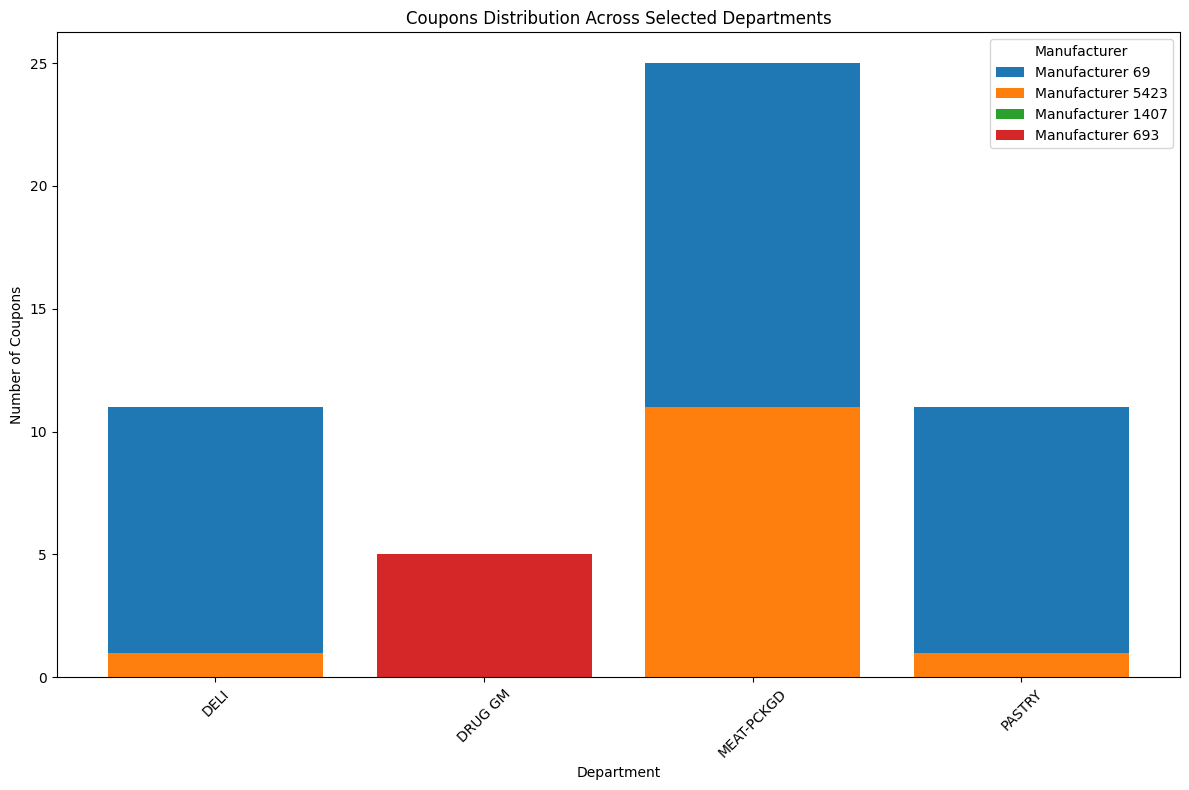

In [ ]:
# Define the four specific departments you want to analyze
selected_departments = ["DRUG GM", "DELI", "MEAT-PCKGD", "PASTRY"]

# Filter the coupons_by_department DataFrame for the selected departments
filtered_coupons_by_department = coupons_by_department[
    coupons_by_department["DEPARTMENT"].isin(selected_departments)
]

# Visualization: Coupons Distribution Across Selected Departments
plt.figure(figsize=(12, 8))
for manufacturer in selected_manufacturers:
    data = filtered_coupons_by_department[filtered_coupons_by_department["MANUFACTURER"] == manufacturer]
    plt.bar(data["DEPARTMENT"], data["COUPONS_BY_DEPARTMENT"], label=f"Manufacturer {manufacturer}")

plt.title("Coupons Distribution Across Selected Departments")
plt.xlabel("Department")
plt.ylabel("Number of Coupons")
plt.legend(title="Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


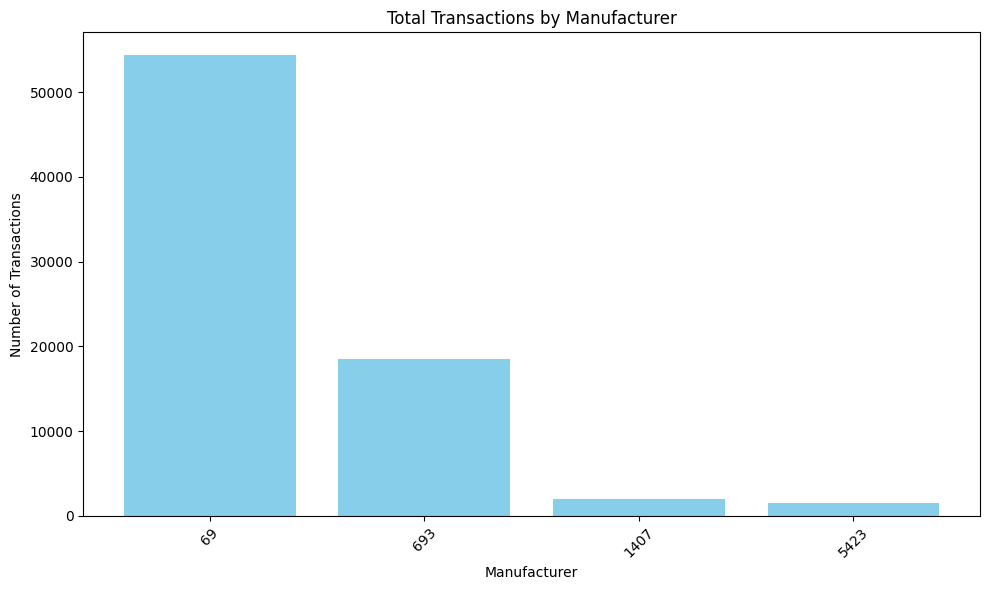

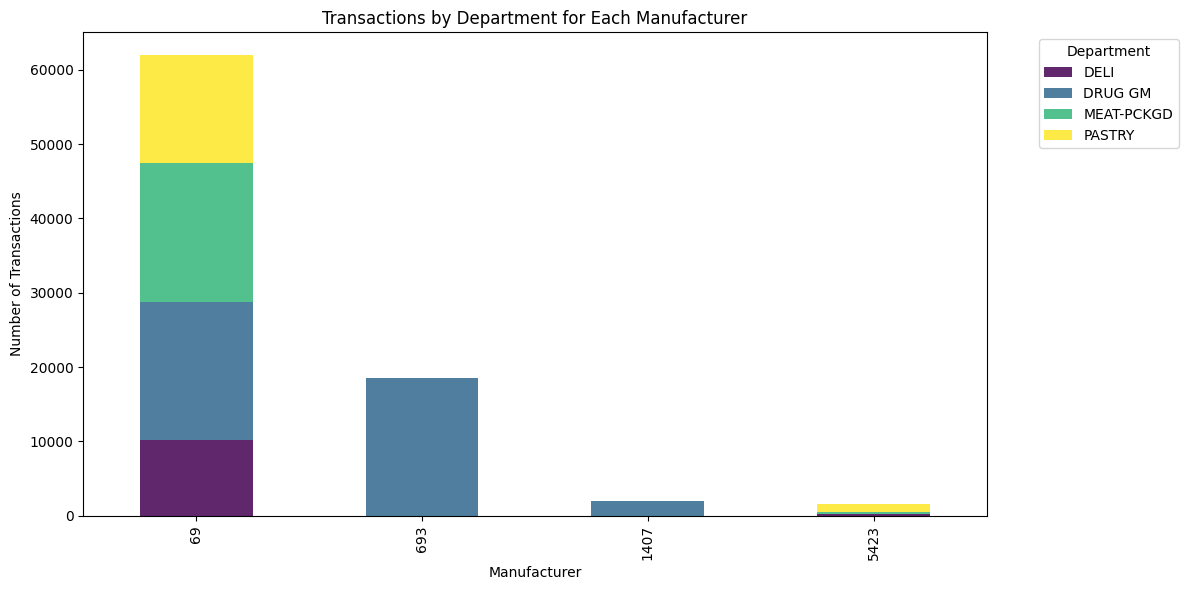


Total Transactions by Manufacturer:
   MANUFACTURER  TOTAL_TRANSACTIONS
0            69               54321
1           693               18568
2          1407                1983
3          5423                1548

Transactions by Department for Each Manufacturer:
   MANUFACTURER  DEPARTMENT  TOTAL_TRANSACTIONS
0            69        DELI               10139
1            69     DRUG GM               18570
2            69  MEAT-PCKGD               18748
3            69      PASTRY               14504
4           693     DRUG GM               18568
5          1407     DRUG GM                1983
6          5423        DELI                 153
7          5423     DRUG GM                   1
8          5423  MEAT-PCKGD                 334
9          5423      PASTRY                1080


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
product_data = pd.read_csv("product.csv")  # Replace with actual file path

# Define filtered manufacturers and departments
selected_manufacturers = [69, 5423, 1407, 693]
selected_departments = ["DELI", "MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter the product table for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"].isin(selected_departments))
]

# Step 2: Filter transaction data for the filtered products
transactions_for_products = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Descriptive Analysis
# A. Total Transactions by Manufacturer
transactions_by_manufacturer = transactions_for_products.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
).groupby("MANUFACTURER")["BASKET_ID"].nunique().reset_index()
transactions_by_manufacturer.columns = ["MANUFACTURER", "TOTAL_TRANSACTIONS"]

# B. Transactions by Department for Each Manufacturer
transactions_by_department = transactions_for_products.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID",
    how="inner"
).groupby(["MANUFACTURER", "DEPARTMENT"])["BASKET_ID"].nunique().reset_index()
transactions_by_department.columns = ["MANUFACTURER", "DEPARTMENT", "TOTAL_TRANSACTIONS"]

# Step 4: Visualizations
# A. Total Transactions by Manufacturer
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_manufacturer["MANUFACTURER"].astype(str),
        transactions_by_manufacturer["TOTAL_TRANSACTIONS"],
        color="skyblue")
plt.title("Total Transactions by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# B. Transactions by Department (Stacked Bar Chart)
transactions_pivot = transactions_by_department.pivot(index="MANUFACTURER",
                                                      columns="DEPARTMENT",
                                                      values="TOTAL_TRANSACTIONS").fillna(0)

transactions_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.85)
plt.title("Transactions by Department for Each Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Transactions")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Step 5: Save results (optional)
transactions_by_manufacturer.to_csv("transactions_by_manufacturer.csv", index=False)
transactions_by_department.to_csv("transactions_by_department.csv", index=False)

# Print Descriptive Results
print("\nTotal Transactions by Manufacturer:")
print(transactions_by_manufacturer)

print("\nTransactions by Department for Each Manufacturer:")
print(transactions_by_department)


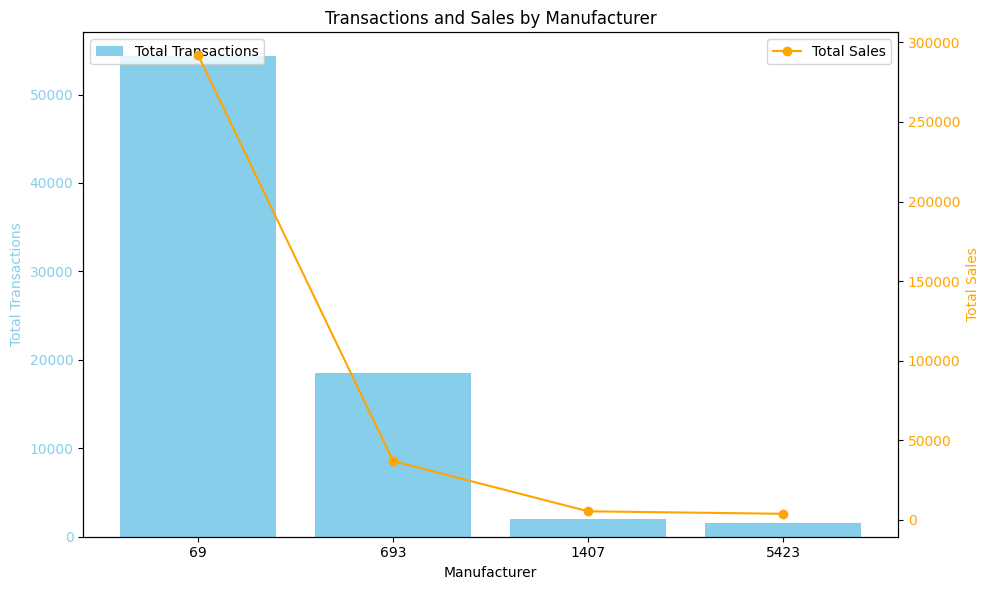

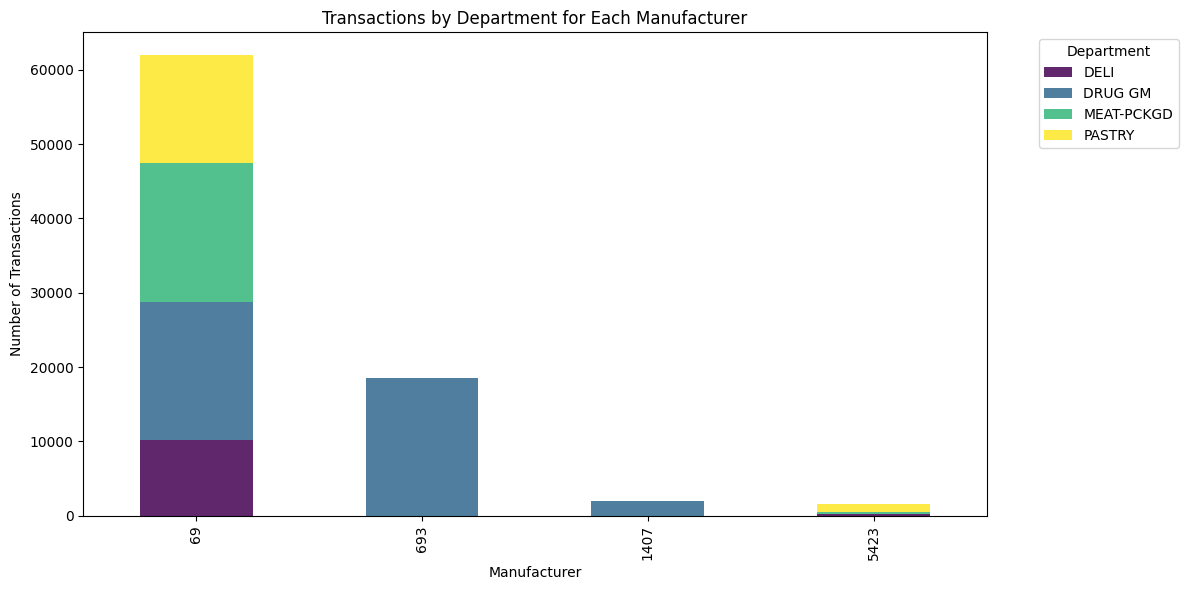


Total Transactions, Households, and Sales by Manufacturer:
   MANUFACTURER  TOTAL_TRANSACTIONS  TOTAL_HOUSEHOLDS  TOTAL_SALES
0            69               54321              2444    291926.96
1           693               18568              2088     36939.25
2          1407                1983               868      5395.25
3          5423                1548               632      3823.75

Transactions by Department for Each Manufacturer:
   MANUFACTURER  DEPARTMENT  TOTAL_TRANSACTIONS  TOTAL_HOUSEHOLDS  TOTAL_SALES
0            69        DELI               10139              1754     57867.03
1            69     DRUG GM               18570              2157     79937.50
2            69  MEAT-PCKGD               18748              2036     93376.89
3            69      PASTRY               14504              2027     60745.54
4           693     DRUG GM               18568              2088     36939.25
5          1407     DRUG GM                1983               868      5395.25
6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# # Load the datasets
# transaction_data = pd.read_csv("path_to_your_file/transaction_data.csv")  # Replace with actual file path
# product_data = pd.read_csv("path_to_your_file/product.csv")  # Replace with actual file path

# Rename 'househol_key' to 'HOUSEHOLD_KEY' if necessary
transaction_data.rename(columns={"household_key": "HOUSEHOLD_KEY"}, inplace=True)

# Define filtered manufacturers and departments
selected_manufacturers = [69, 5423, 1407, 693]
selected_departments = ["DELI", "MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter the product table for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"].isin(selected_departments))
]

# Step 2: Filter transaction data for the filtered products
transactions_for_products = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Descriptive Analysis
# A. Total Transactions by Manufacturer
transactions_by_manufacturer = transactions_for_products.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
).groupby("MANUFACTURER").agg(
    TOTAL_TRANSACTIONS=("BASKET_ID", "nunique"),
    TOTAL_HOUSEHOLDS=("HOUSEHOLD_KEY", "nunique"),
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

# B. Transactions by Department for Each Manufacturer
transactions_by_department = transactions_for_products.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID",
    how="inner"
).groupby(["MANUFACTURER", "DEPARTMENT"]).agg(
    TOTAL_TRANSACTIONS=("BASKET_ID", "nunique"),
    TOTAL_HOUSEHOLDS=("HOUSEHOLD_KEY", "nunique"),
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

# Step 4: Visualizations
# A. Total Transactions, Households, and Sales by Manufacturer
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(transactions_by_manufacturer["MANUFACTURER"].astype(str),
        transactions_by_manufacturer["TOTAL_TRANSACTIONS"],
        color="skyblue", label="Total Transactions")
ax1.set_xlabel("Manufacturer")
ax1.set_ylabel("Total Transactions", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(transactions_by_manufacturer["MANUFACTURER"].astype(str),
         transactions_by_manufacturer["TOTAL_SALES"],
         color="orange", marker="o", label="Total Sales")
ax2.set_ylabel("Total Sales", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")
ax2.legend(loc="upper right")

plt.title("Transactions and Sales by Manufacturer")
plt.tight_layout()
plt.show()

# B. Stacked Bar Chart: Transactions by Department
transactions_pivot = transactions_by_department.pivot(index="MANUFACTURER",
                                                      columns="DEPARTMENT",
                                                      values="TOTAL_TRANSACTIONS").fillna(0)

transactions_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.85)
plt.title("Transactions by Department for Each Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Transactions")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Optional: Save results (optional)
transactions_by_manufacturer.to_csv("transactions_by_manufacturer.csv", index=False)
transactions_by_department.to_csv("transactions_by_department.csv", index=False)

# Print Descriptive Results
print("\nTotal Transactions, Households, and Sales by Manufacturer:")
print(transactions_by_manufacturer)

print("\nTransactions by Department for Each Manufacturer:")
print(transactions_by_department)


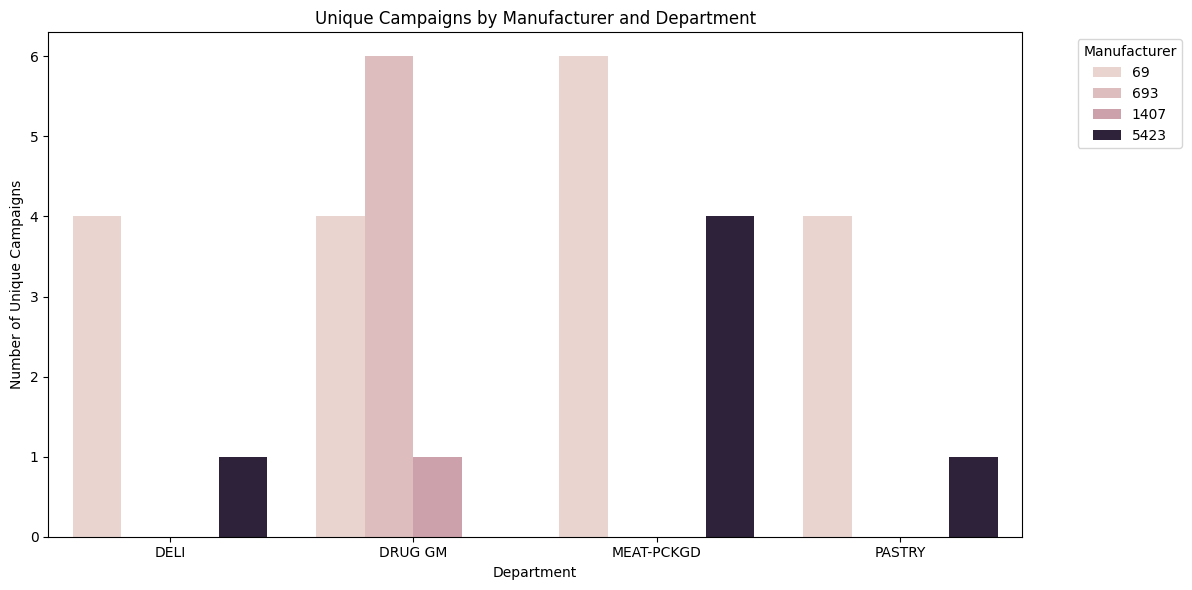

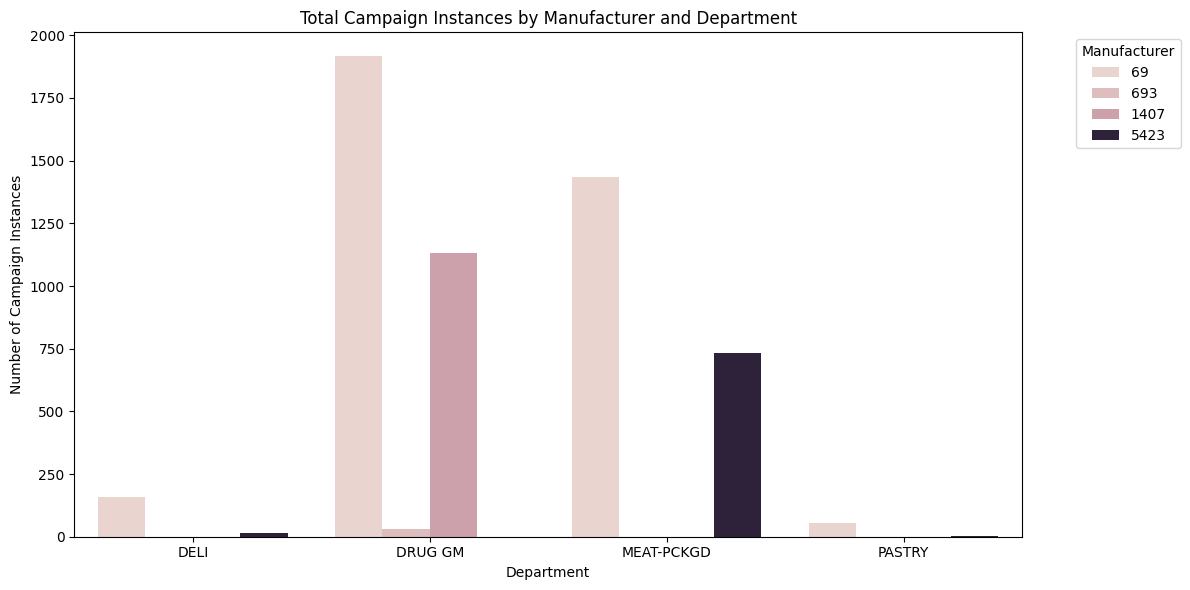

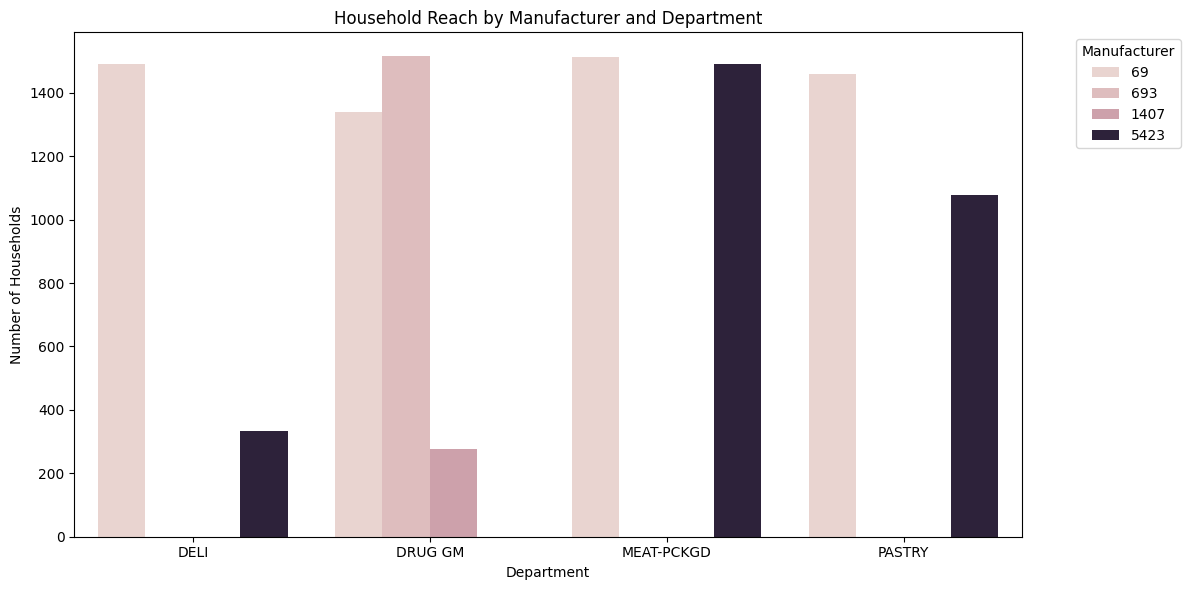

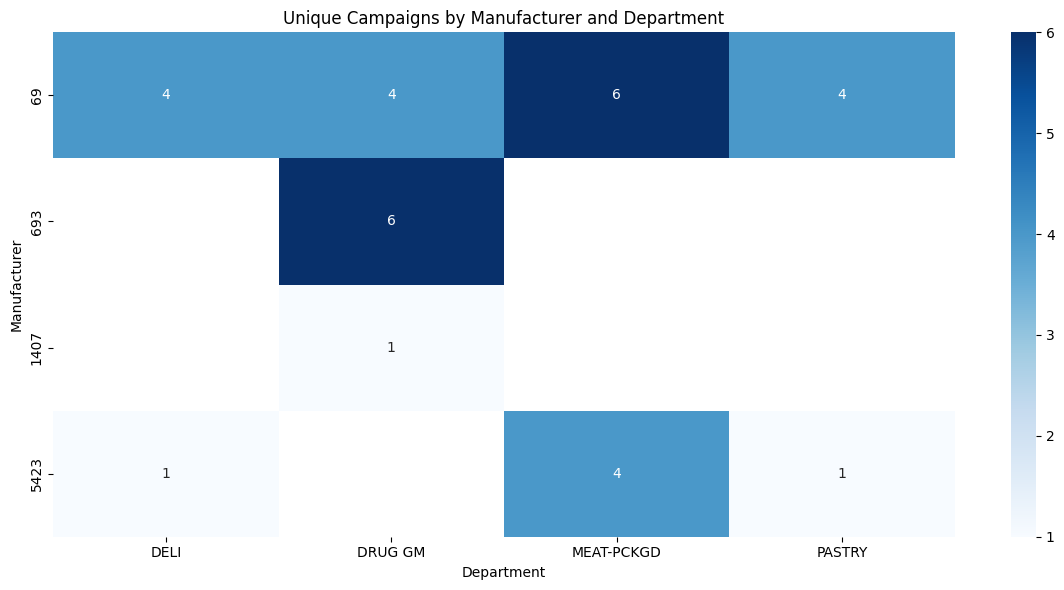

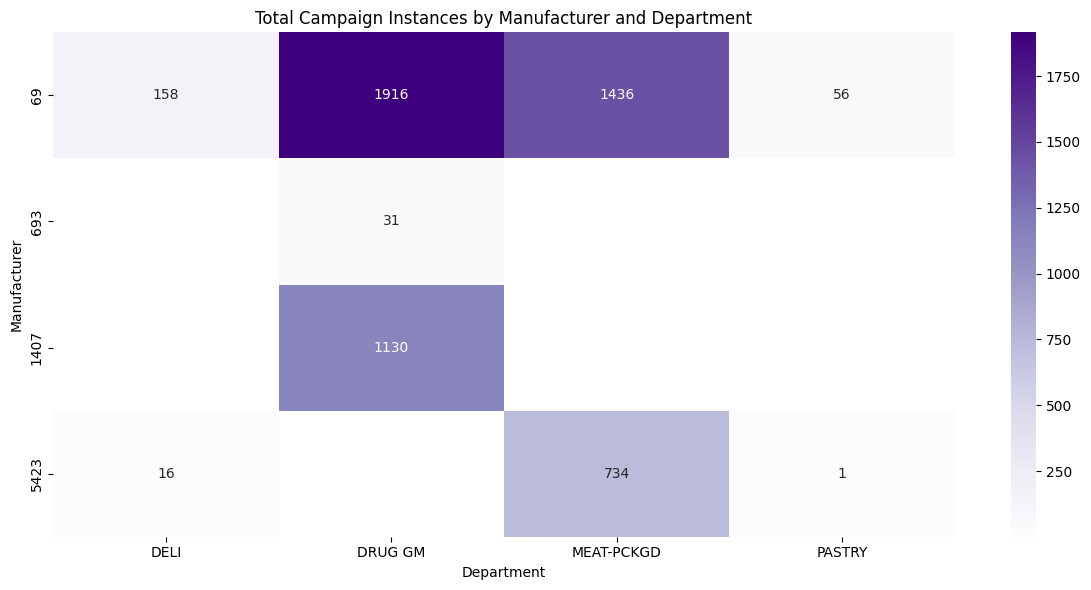

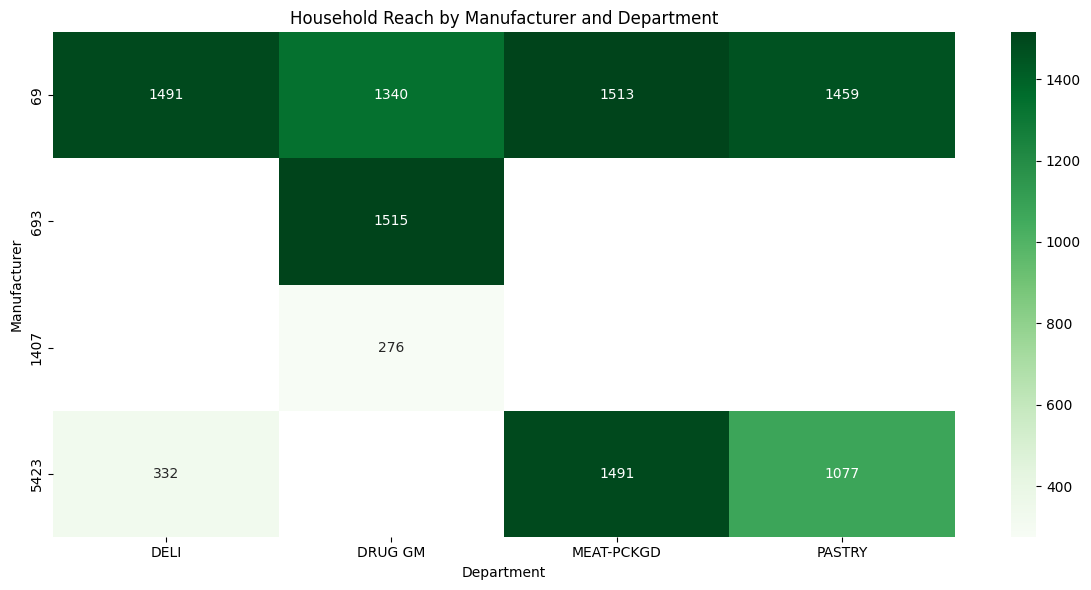


Campaign Analysis by Manufacturer and Department:
   MANUFACTURER  DEPARTMENT  TOTAL_CAMPAIGNS  CAMPAIGN_COUNT  TOTAL_HOUSEHOLDS
0            69        DELI                4             158              1491
1            69     DRUG GM                4            1916              1340
2            69  MEAT-PCKGD                6            1436              1513
3            69      PASTRY                4              56              1459
4           693     DRUG GM                6              31              1515
5          1407     DRUG GM                1            1130               276
6          5423        DELI                1              16               332
7          5423  MEAT-PCKGD                4             734              1491
8          5423      PASTRY                1               1              1077


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
campaign_table = pd.read_csv("campaign_table.csv")  # Replace with actual file path
campaign_table.columns = campaign_table.columns.str.upper()

campaign_desc = pd.read_csv("campaign_desc.csv")  # Replace with actual file path
campaign_desc.columns = campaign_desc.columns.str.upper()

coupon = pd.read_csv("coupon.csv")  # Replace with actual file path
coupon.columns = coupon.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

# Define filtered manufacturers and departments
selected_manufacturers = [69, 5423, 1407, 693]
selected_departments = ["DELI", "MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter product data for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"].isin(selected_departments))
]

# Step 2: Filter coupon data for the filtered products
filtered_coupons = coupon.merge(filtered_products, on="PRODUCT_ID", how="inner")

# Step 3: Merge coupon data with campaign descriptions
campaign_data = filtered_coupons.merge(campaign_desc, on="CAMPAIGN", how="inner")

# Step 4: Descriptive Analysis
# A. Total Campaigns by Manufacturer and Department (Unique and Non-Unique)
campaigns_by_manufacturer = (
    campaign_data.groupby(["MANUFACTURER", "DEPARTMENT"])
    .agg(
        TOTAL_CAMPAIGNS=("CAMPAIGN", "nunique"),  # Unique campaigns
        CAMPAIGN_COUNT=("CAMPAIGN", "count")  # Non-unique campaigns
    )
    .reset_index()
)

# B. Household Reach by Manufacturer and Department
campaigns_with_households = campaign_data.merge(campaign_table, on="CAMPAIGN", how="inner")
household_reach = (
    campaigns_with_households.groupby(["MANUFACTURER", "DEPARTMENT"])["HOUSEHOLD_KEY"]
    .nunique()
    .reset_index()
    .rename(columns={"HOUSEHOLD_KEY": "TOTAL_HOUSEHOLDS"})
)

# Merge campaign counts and household reach for combined results
campaign_analysis = campaigns_by_manufacturer.merge(
    household_reach, on=["MANUFACTURER", "DEPARTMENT"], how="left"
)

# Step 5: Visualizations
# A. Bar Chart: Unique Campaigns by Manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(data=campaigns_by_manufacturer, x="DEPARTMENT", y="TOTAL_CAMPAIGNS", hue="MANUFACTURER")
plt.title("Unique Campaigns by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Number of Unique Campaigns")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# B. Bar Chart: Non-Unique Campaigns by Manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(data=campaigns_by_manufacturer, x="DEPARTMENT", y="CAMPAIGN_COUNT", hue="MANUFACTURER")
plt.title("Total Campaign Instances by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Number of Campaign Instances")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# C. Bar Chart: Household Reach by Manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(data=household_reach, x="DEPARTMENT", y="TOTAL_HOUSEHOLDS", hue="MANUFACTURER")
plt.title("Household Reach by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Number of Households")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# D. Combined Heatmap: Unique Campaigns, Non-Unique Campaigns, and Household Reach
pivot_unique_campaigns = campaign_analysis.pivot(index="MANUFACTURER", columns="DEPARTMENT", values="TOTAL_CAMPAIGNS")
pivot_campaign_instances = campaign_analysis.pivot(index="MANUFACTURER", columns="DEPARTMENT", values="CAMPAIGN_COUNT")
pivot_households = campaign_analysis.pivot(index="MANUFACTURER", columns="DEPARTMENT", values="TOTAL_HOUSEHOLDS")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_unique_campaigns, annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Unique Campaigns by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_campaign_instances, annot=True, fmt=".0f", cmap="Purples", cbar=True)
plt.title("Total Campaign Instances by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_households, annot=True, fmt=".0f", cmap="Greens", cbar=True)
plt.title("Household Reach by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()

# Save results for further analysis
campaign_analysis.to_csv("campaign_analysis_by_manufacturer.csv", index=False)

# Print Descriptive Results
print("\nCampaign Analysis by Manufacturer and Department:")
print(campaign_analysis)


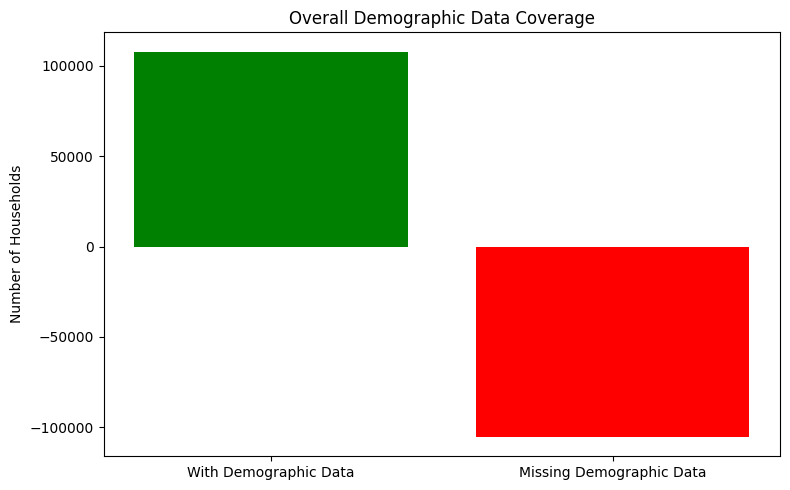

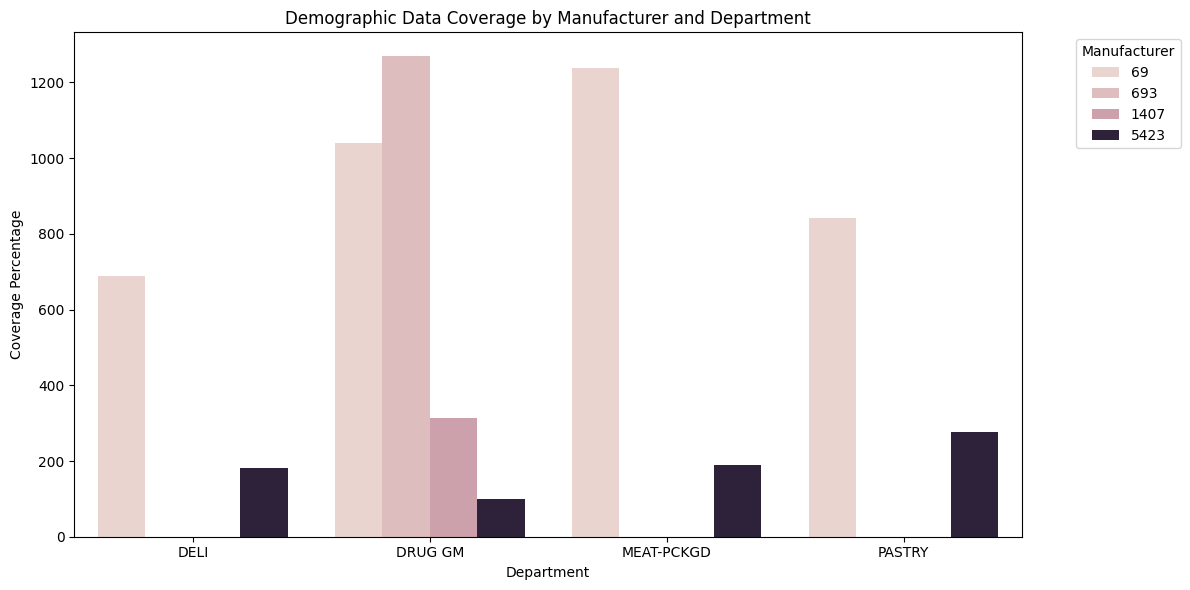

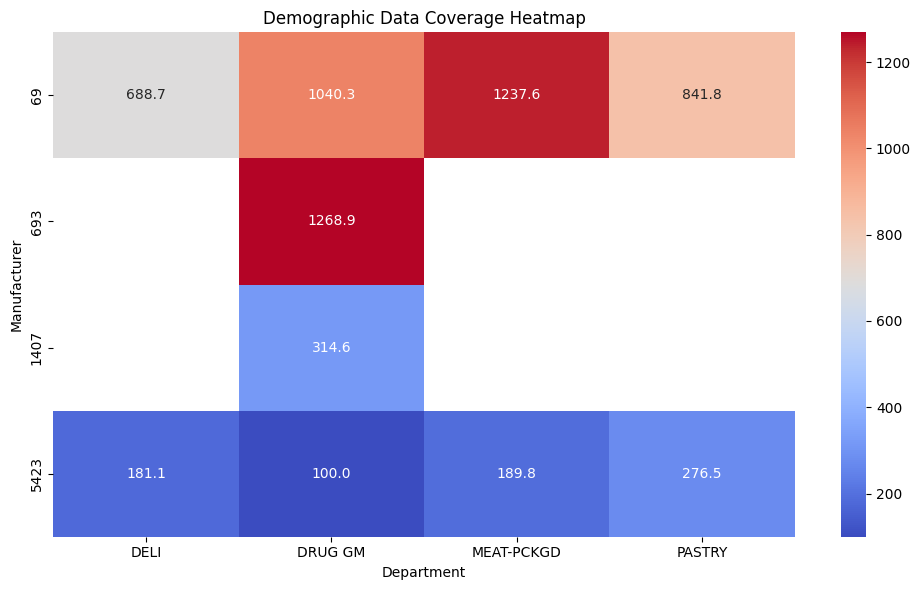


Overall Demographic Coverage: 4372.64%

Demographic Data Coverage by Manufacturer and Department:
   MANUFACTURER  DEPARTMENT  HOUSEHOLDS_WITH_DEMOGRAPHIC  TOTAL_HOUSEHOLDS  \
0            69        DELI                        12080              1754   
1            69     DRUG GM                        22439              2157   
2            69  MEAT-PCKGD                        25197              2036   
3            69      PASTRY                        17064              2027   
4           693     DRUG GM                        26495              2088   
5          1407     DRUG GM                         2731               868   
6          5423        DELI                          172                95   
7          5423     DRUG GM                            1                 1   
8          5423  MEAT-PCKGD                          389               205   
9          5423      PASTRY                         1305               472   

   COVERAGE_PERCENTAGE  
0           688.7

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

hh_demographic = pd.read_csv("hh_demographic.csv")  # Replace with actual file path
hh_demographic.columns = hh_demographic.columns.str.upper()

# Define filtered manufacturers and departments
selected_manufacturers = [69, 5423, 1407, 693]
selected_departments = ["DELI", "MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter product data for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"].isin(selected_departments))
]

# Step 2: Filter transaction data for the filtered products
filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Merge transaction data with demographic data
household_transactions = filtered_transactions.merge(
    hh_demographic, on="HOUSEHOLD_KEY", how="left"
)

# Step 4: Descriptive Analysis
# A. Overall Demographic Coverage
total_households = filtered_transactions["HOUSEHOLD_KEY"].nunique()
demographic_coverage = household_transactions["HOUSEHOLD_KEY"].notnull().sum()
coverage_percentage = (demographic_coverage / total_households) * 100

# B. Coverage by Department and Manufacturer
coverage_by_department = household_transactions.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID",
    how="left"
).groupby(["MANUFACTURER", "DEPARTMENT"])["HOUSEHOLD_KEY"].apply(
    lambda x: x.notnull().sum()
).reset_index()
coverage_by_department.columns = ["MANUFACTURER", "DEPARTMENT", "HOUSEHOLDS_WITH_DEMOGRAPHIC"]

# Total households by department and manufacturer
total_households_by_dept = filtered_transactions.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID",
    how="left"
).groupby(["MANUFACTURER", "DEPARTMENT"])["HOUSEHOLD_KEY"].nunique().reset_index()
total_households_by_dept.columns = ["MANUFACTURER", "DEPARTMENT", "TOTAL_HOUSEHOLDS"]

# Merge to calculate coverage percentage
coverage_analysis = coverage_by_department.merge(
    total_households_by_dept, on=["MANUFACTURER", "DEPARTMENT"], how="left"
)
coverage_analysis["COVERAGE_PERCENTAGE"] = (
    coverage_analysis["HOUSEHOLDS_WITH_DEMOGRAPHIC"] / coverage_analysis["TOTAL_HOUSEHOLDS"]
) * 100

# Step 5: Visualizations
# A. Overall Coverage
plt.figure(figsize=(8, 5))
plt.bar(["With Demographic Data", "Missing Demographic Data"],
        [demographic_coverage, total_households - demographic_coverage],
        color=["green", "red"])
plt.title("Overall Demographic Data Coverage")
plt.ylabel("Number of Households")
plt.tight_layout()
plt.show()

# B. Coverage by Manufacturer and Department (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=coverage_analysis, x="DEPARTMENT", y="COVERAGE_PERCENTAGE", hue="MANUFACTURER")
plt.title("Demographic Data Coverage by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Coverage Percentage")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# C. Heatmap: Household Coverage by Manufacturer and Department
pivot_coverage = coverage_analysis.pivot(index="MANUFACTURER", columns="DEPARTMENT", values="COVERAGE_PERCENTAGE")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_coverage, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Demographic Data Coverage Heatmap")
plt.xlabel("Department")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()

# Step 6: Save results (optional)
coverage_analysis.to_csv("demographic_coverage_analysis.csv", index=False)

# Print Descriptive Results
print(f"\nOverall Demographic Coverage: {coverage_percentage:.2f}%")
print("\nDemographic Data Coverage by Manufacturer and Department:")
print(coverage_analysis)


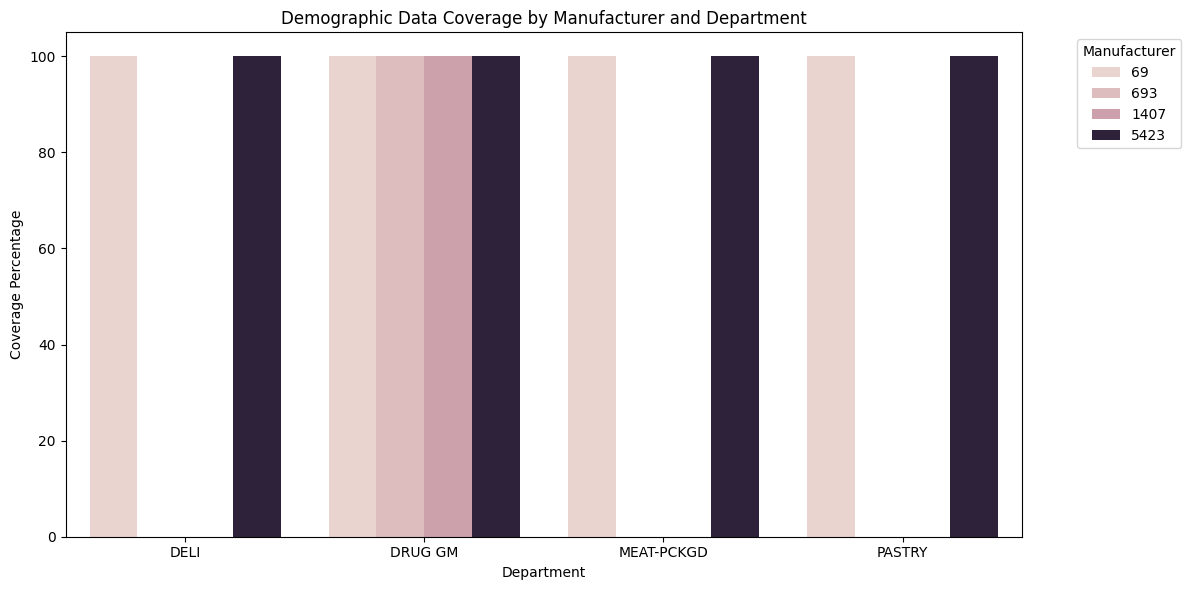

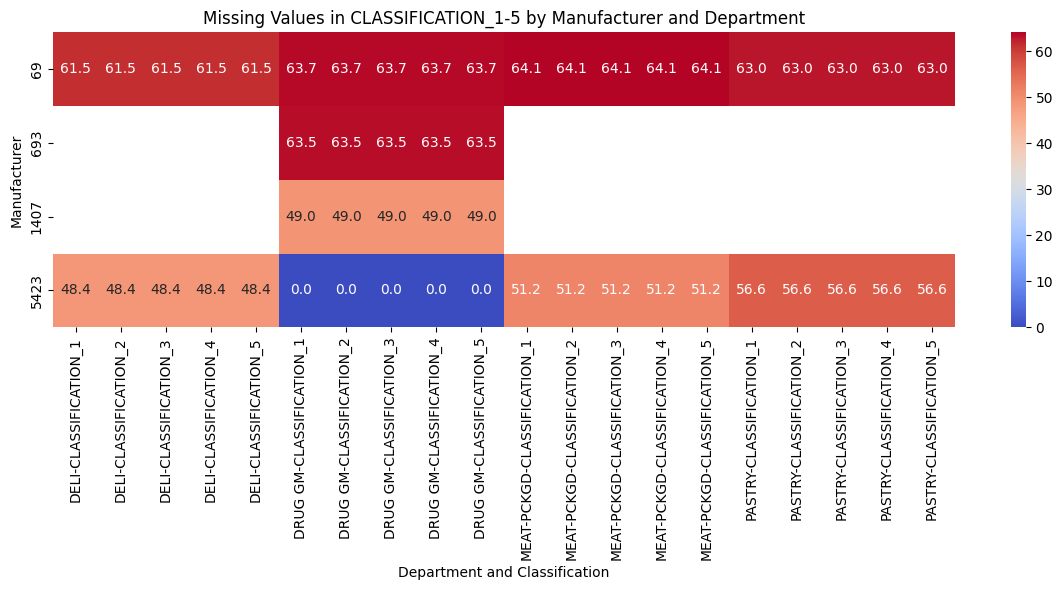

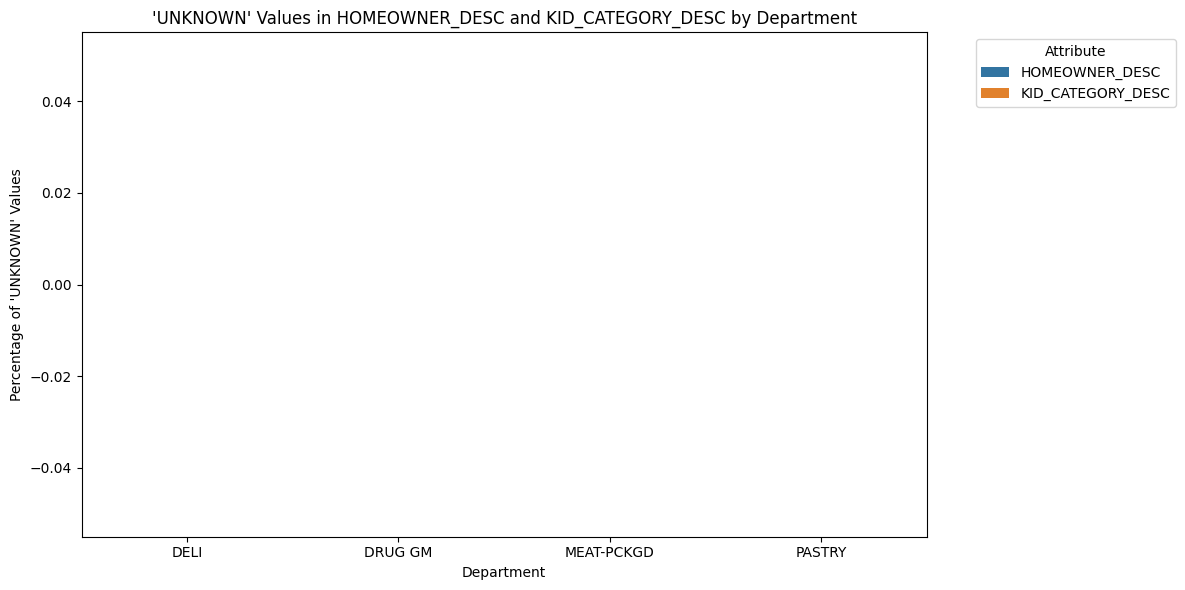


Demographic Data Availability Summary:
   MANUFACTURER  DEPARTMENT  HOUSEHOLDS_WITH_DEMOGRAPHIC  TOTAL_HOUSEHOLDS  \
0            69        DELI                         1754              1754   
1            69     DRUG GM                         2157              2157   
2            69  MEAT-PCKGD                         2036              2036   
3            69      PASTRY                         2027              2027   
4           693     DRUG GM                         2088              2088   
5          1407     DRUG GM                          868               868   
6          5423        DELI                           95                95   
7          5423     DRUG GM                            1                 1   
8          5423  MEAT-PCKGD                          205               205   
9          5423      PASTRY                          472               472   

   COVERAGE_PERCENTAGE  CLASSIFICATION_1  CLASSIFICATION_2  CLASSIFICATION_3  \
0                100.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

hh_demographic = pd.read_csv("hh_demographic.csv")  # Replace with actual file path
hh_demographic.columns = hh_demographic.columns.str.upper()

# Define filtered manufacturers and departments
selected_manufacturers = [69, 5423, 1407, 693]
selected_departments = ["DELI", "MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter product data for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"].isin(selected_departments))
]

# Step 2: Filter transaction data for the filtered products
filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Deduplicate households for each manufacturer and department
unique_households = filtered_transactions.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID", how="inner"
)[["HOUSEHOLD_KEY", "MANUFACTURER", "DEPARTMENT"]].drop_duplicates()

# Step 4: Merge with demographic data
household_demographics = unique_households.merge(
    hh_demographic, on="HOUSEHOLD_KEY", how="left"
)

# Step 5: Calculate Coverage and Completeness
# A. Overall Demographic Coverage
coverage_summary = household_demographics.groupby(["MANUFACTURER", "DEPARTMENT"])["HOUSEHOLD_KEY"].apply(
    lambda x: x.notnull().sum()
).reset_index()
coverage_summary.columns = ["MANUFACTURER", "DEPARTMENT", "HOUSEHOLDS_WITH_DEMOGRAPHIC"]

total_households = household_demographics.groupby(["MANUFACTURER", "DEPARTMENT"])["HOUSEHOLD_KEY"].nunique().reset_index()
total_households.columns = ["MANUFACTURER", "DEPARTMENT", "TOTAL_HOUSEHOLDS"]

coverage_analysis = coverage_summary.merge(total_households, on=["MANUFACTURER", "DEPARTMENT"])
coverage_analysis["COVERAGE_PERCENTAGE"] = (
    coverage_analysis["HOUSEHOLDS_WITH_DEMOGRAPHIC"] / coverage_analysis["TOTAL_HOUSEHOLDS"]
) * 100

# B. Missingness in `CLASSIFICATION_1-5`
classification_columns = ["CLASSIFICATION_1", "CLASSIFICATION_2", "CLASSIFICATION_3", "CLASSIFICATION_4", "CLASSIFICATION_5"]
missing_classifications = household_demographics.groupby(["MANUFACTURER", "DEPARTMENT"])[classification_columns].apply(
    lambda x: x.isnull().mean() * 100
).reset_index()

# C. "UNKNOWN" Values in `HOMEOWNER_DESC` and `KID_CATEGORY_DESC`
unknown_columns = ["HOMEOWNER_DESC", "KID_CATEGORY_DESC"]
unknown_values = household_demographics.groupby(["MANUFACTURER", "DEPARTMENT"])[unknown_columns].apply(
    lambda x: (x == "UNKNOWN").mean() * 100
).reset_index()

# Combine all metrics into a single summary
availability_summary = coverage_analysis.merge(
    missing_classifications, on=["MANUFACTURER", "DEPARTMENT"]
).merge(
    unknown_values, on=["MANUFACTURER", "DEPARTMENT"]
)

# Step 6: Visualizations
# A. Coverage Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=coverage_analysis, x="DEPARTMENT", y="COVERAGE_PERCENTAGE", hue="MANUFACTURER")
plt.title("Demographic Data Coverage by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Coverage Percentage")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# B. Missing Values in `CLASSIFICATION_1-5` (Heatmap)
missing_pivot = missing_classifications.melt(
    id_vars=["MANUFACTURER", "DEPARTMENT"], var_name="CLASSIFICATION", value_name="MISSING_PERCENTAGE"
)
plt.figure(figsize=(12, 6))
sns.heatmap(
    missing_pivot.pivot_table(index="MANUFACTURER", columns=["DEPARTMENT", "CLASSIFICATION"], values="MISSING_PERCENTAGE"),
    annot=True, fmt=".1f", cmap="coolwarm", cbar=True
)
plt.title("Missing Values in CLASSIFICATION_1-5 by Manufacturer and Department")
plt.xlabel("Department and Classification")
plt.ylabel("Manufacturer")
plt.tight_layout()
plt.show()

# C. "UNKNOWN" Values in `HOMEOWNER_DESC` and `KID_CATEGORY_DESC` (Bar Chart)
unknown_melt = unknown_values.melt(id_vars=["MANUFACTURER", "DEPARTMENT"], var_name="ATTRIBUTE", value_name="UNKNOWN_PERCENTAGE")
plt.figure(figsize=(12, 6))
sns.barplot(data=unknown_melt, x="DEPARTMENT", y="UNKNOWN_PERCENTAGE", hue="ATTRIBUTE")
plt.title("'UNKNOWN' Values in HOMEOWNER_DESC and KID_CATEGORY_DESC by Department")
plt.xlabel("Department")
plt.ylabel("Percentage of 'UNKNOWN' Values")
plt.legend(title="Attribute", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Save results to a CSV for further exploration
availability_summary.to_csv("availability_summary.csv", index=False)

# Print Descriptive Results
print("\nDemographic Data Availability Summary:")
print(availability_summary)


In [ ]:
import pandas as pd

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

# Define manufacturers and departments
selected_manufacturers = {69: ["MEAT-PCKGD", "PASTRY"], 5423: ["MEAT-PCKGD", "PASTRY"],
                          693: ["DRUG GM"], 1407: ["DRUG GM"]}
departments_for_analysis = ["MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter product data for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers.keys())) &
    (product_data["DEPARTMENT"].isin(departments_for_analysis))
]

# Step 2: Filter transaction data for the filtered products
filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Merge transaction data with product data to include manufacturer and department
merged_data = filtered_transactions.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID", how="inner"
)

# Step 4: Calculate Metrics
# A. Total Sales Value by Manufacturer and Department
sales_by_manufacturer = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"])["SALES_VALUE"].sum().reset_index()
sales_by_manufacturer.rename(columns={"SALES_VALUE": "TOTAL_SALES_VALUE"}, inplace=True)

# B. Number of Transactions by Manufacturer and Department
transactions_by_manufacturer = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"])["BASKET_ID"].nunique().reset_index()
transactions_by_manufacturer.rename(columns={"BASKET_ID": "TOTAL_TRANSACTIONS"}, inplace=True)

# C. Basket Composition (Average Products per Transaction)
basket_composition = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"]).agg(
    TOTAL_PRODUCTS=("QUANTITY", "sum"),
    TOTAL_TRANSACTIONS=("BASKET_ID", "nunique")
).reset_index()
basket_composition["AVERAGE_PRODUCTS_PER_TRANSACTION"] = basket_composition["TOTAL_PRODUCTS"] / basket_composition["TOTAL_TRANSACTIONS"]

# Step 4: Calculate Metrics
# A. Total Sales Value by Manufacturer and Department
sales_by_manufacturer = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"])["SALES_VALUE"].sum().reset_index()
sales_by_manufacturer.rename(columns={"SALES_VALUE": "TOTAL_SALES_VALUE"}, inplace=True)

# B. Number of Transactions by Manufacturer and Department
transactions_by_manufacturer = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"])["BASKET_ID"].nunique().reset_index()
transactions_by_manufacturer.rename(columns={"BASKET_ID": "TOTAL_TRANSACTIONS"}, inplace=True)

# C. Basket Composition (Average Products per Transaction)
basket_composition = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"]).agg(
    TOTAL_PRODUCTS=("QUANTITY", "sum"),
    TOTAL_TRANSACTIONS=("BASKET_ID", "nunique")
).reset_index()
basket_composition["AVERAGE_PRODUCTS_PER_TRANSACTION"] = basket_composition["TOTAL_PRODUCTS"] / basket_composition["TOTAL_TRANSACTIONS"]

# D. New Metrics
# Sales per Transaction
sales_by_manufacturer["SALES_PER_TRANSACTION"] = (
    sales_by_manufacturer["TOTAL_SALES_VALUE"] / transactions_by_manufacturer["TOTAL_TRANSACTIONS"]
)

# Sales per Product
sales_by_manufacturer["SALES_PER_PRODUCT"] = (
    sales_by_manufacturer["TOTAL_SALES_VALUE"] / basket_composition["TOTAL_PRODUCTS"]
)

# Percentage of Total Transactions
total_transactions_by_department = transactions_by_manufacturer.groupby("DEPARTMENT")["TOTAL_TRANSACTIONS"].sum().reset_index()
total_transactions_by_department.rename(columns={"TOTAL_TRANSACTIONS": "DEPARTMENT_TOTAL_TRANSACTIONS"}, inplace=True)

transaction_share = transactions_by_manufacturer.merge(total_transactions_by_department, on="DEPARTMENT")
transaction_share["PERCENTAGE_OF_TOTAL_TRANSACTIONS"] = (
    transaction_share["TOTAL_TRANSACTIONS"] / transaction_share["DEPARTMENT_TOTAL_TRANSACTIONS"] * 100
)

# Product Diversity
product_diversity = merged_data.groupby(["MANUFACTURER", "DEPARTMENT"])["PRODUCT_ID"].nunique().reset_index()
product_diversity.rename(columns={"PRODUCT_ID": "PRODUCT_DIVERSITY"}, inplace=True)

# Step 5: Combine Metrics
final_metrics = sales_by_manufacturer.merge(
    transactions_by_manufacturer, on=["MANUFACTURER", "DEPARTMENT"]
).merge(
    basket_composition[["MANUFACTURER", "DEPARTMENT", "AVERAGE_PRODUCTS_PER_TRANSACTION"]],
    on=["MANUFACTURER", "DEPARTMENT"]
).merge(
    transaction_share[["MANUFACTURER", "DEPARTMENT", "PERCENTAGE_OF_TOTAL_TRANSACTIONS"]],
    on=["MANUFACTURER", "DEPARTMENT"]
).merge(
    product_diversity, on=["MANUFACTURER", "DEPARTMENT"]
)

# Step 6: Save Results
final_metrics.to_csv("enhanced_transaction_metrics.csv", index=False)

# Print Results
print("\nEnhanced Transaction Metrics by Manufacturer and Department:")
print(final_metrics)



Enhanced Transaction Metrics by Manufacturer and Department:
   MANUFACTURER  DEPARTMENT  TOTAL_SALES_VALUE  SALES_PER_TRANSACTION  \
0            69     DRUG GM           79937.50               4.304658   
1            69  MEAT-PCKGD           93376.89               4.980632   
2            69      PASTRY           60745.54               4.188192   
3           693     DRUG GM           36939.25               1.989404   
4          1407     DRUG GM            5395.25               2.720751   
5          5423     DRUG GM               0.65               0.650000   
6          5423  MEAT-PCKGD             855.77               2.562186   
7          5423      PASTRY            2513.90               2.327685   

   SALES_PER_PRODUCT  TOTAL_TRANSACTIONS  AVERAGE_PRODUCTS_PER_TRANSACTION  \
0           3.034718               18570                          1.418471   
1           2.857747               18748                          1.742853   
2           3.148253               14504      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

coupon_data = pd.read_csv("coupon.csv")  # Replace with actual file path
coupon_data.columns = coupon_data.columns.str.upper()

coupon_redempt_data = pd.read_csv("coupon_redempt.csv")  # Replace with actual file path
coupon_redempt_data.columns = coupon_redempt_data.columns.str.upper()

campaign_desc_data = pd.read_csv("campaign_desc.csv")  # Replace with actual file path
campaign_desc_data.columns = campaign_desc_data.columns.str.upper()

campaign_table_data = pd.read_csv("campaign_table.csv")  # Replace with actual file path
campaign_table_data.columns = campaign_table_data.columns.str.upper()

# Define manufacturers and departments
selected_manufacturers = {69: ["MEAT-PCKGD", "PASTRY"], 5423: ["MEAT-PCKGD", "PASTRY"],
                          693: ["DRUG GM"], 1407: ["DRUG GM"]}
departments_for_analysis = ["MEAT-PCKGD", "PASTRY", "DRUG GM"]

# Step 1: Filter product data for selected manufacturers and departments
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers.keys())) &
    (product_data["DEPARTMENT"].isin(departments_for_analysis))
]

# Step 2: Merge coupon data with filtered products
filtered_coupons = coupon_data.merge(
    filtered_products, on="PRODUCT_ID", how="inner"
)

# Step 3: Merge coupon redemptions with filtered coupons and campaign table
coupon_redemptions = coupon_redempt_data.merge(
    filtered_coupons, on="COUPON_UPC", how="inner"
).merge(
    campaign_table_data, on=["HOUSEHOLD_KEY", "CAMPAIGN"], how="inner"
)

# Step 4: Merge with campaign descriptions
coupon_redemptions_with_desc = coupon_redemptions.merge(
    campaign_desc_data, on="CAMPAIGN", how="inner"
)

# Step 5: Merge transactions to calculate sales lift
campaign_transactions = transaction_data.merge(
    filtered_coupons, on="PRODUCT_ID", how="inner"
)

# Step 6: Calculate Metrics
# A. Redemption Rates
redemption_rates = coupon_redemptions.groupby(["MANUFACTURER", "DEPARTMENT"]).agg(
    TOTAL_COUPONS=("COUPON_UPC", "count"),
    REDEMPTIONS=("HOUSEHOLD_KEY", "count")
).reset_index()
redemption_rates["REDEMPTION_RATE"] = (redemption_rates["REDEMPTIONS"] / redemption_rates["TOTAL_COUPONS"]) * 100

# B. Sales Lift During Campaigns
sales_during_campaigns = campaign_transactions.groupby(["MANUFACTURER", "DEPARTMENT"]).agg(
    CAMPAIGN_SALES=("SALES_VALUE", "sum")
).reset_index()

# C. Household Reach
household_reach = coupon_redemptions.groupby(["MANUFACTURER", "DEPARTMENT"])["HOUSEHOLD_KEY"].nunique().reset_index()
household_reach.rename(columns={"HOUSEHOLD_KEY": "TOTAL_HOUSEHOLDS"}, inplace=True)

# Combine Metrics
campaign_metrics = redemption_rates.merge(
    sales_during_campaigns, on=["MANUFACTURER", "DEPARTMENT"], how="left"
).merge(
    household_reach, on=["MANUFACTURER", "DEPARTMENT"], how="left"
)

# Step 7: Descriptive Statistics
print("\nCampaign Metrics by Manufacturer and Department:")
print(campaign_metrics)

# Step 8: Visualizations
# A. Redemption Rates
plt.figure(figsize=(12, 6))
sns.barplot(data=redemption_rates, x="DEPARTMENT", y="REDEMPTION_RATE", hue="MANUFACTURER")
plt.title("Redemption Rates by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Redemption Rate (%)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# B. Sales Lift During Campaigns
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_during_campaigns, x="DEPARTMENT", y="CAMPAIGN_SALES", hue="MANUFACTURER")
plt.title("Sales During Campaigns by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Total Sales Value")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# C. Household Reach
plt.figure(figsize=(12, 6))
sns.barplot(data=household_reach, x="DEPARTMENT", y="TOTAL_HOUSEHOLDS", hue="MANUFACTURER")
plt.title("Household Reach by Manufacturer and Department")
plt.xlabel("Department")
plt.ylabel("Number of Households")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Save Results
campaign_metrics.to_csv("campaign_metrics.csv", index=False)


KeyError: 'CAMPAIGN'

<ipython-input-19-24d8bbd34427>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_manufacturer, x="MANUFACTURER", y="SALES_VALUE", palette="muted")


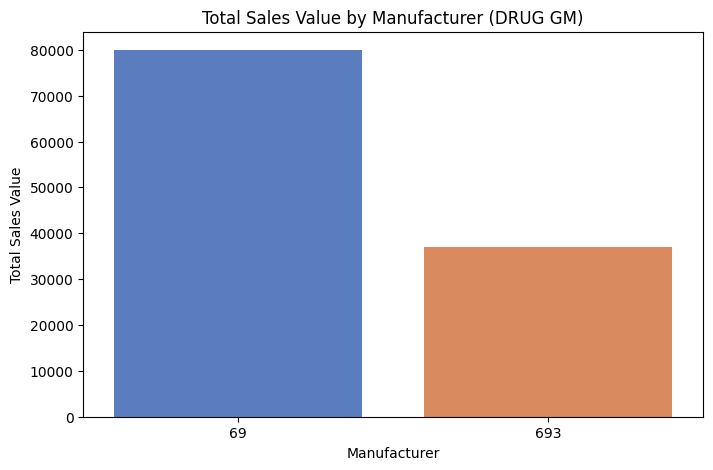

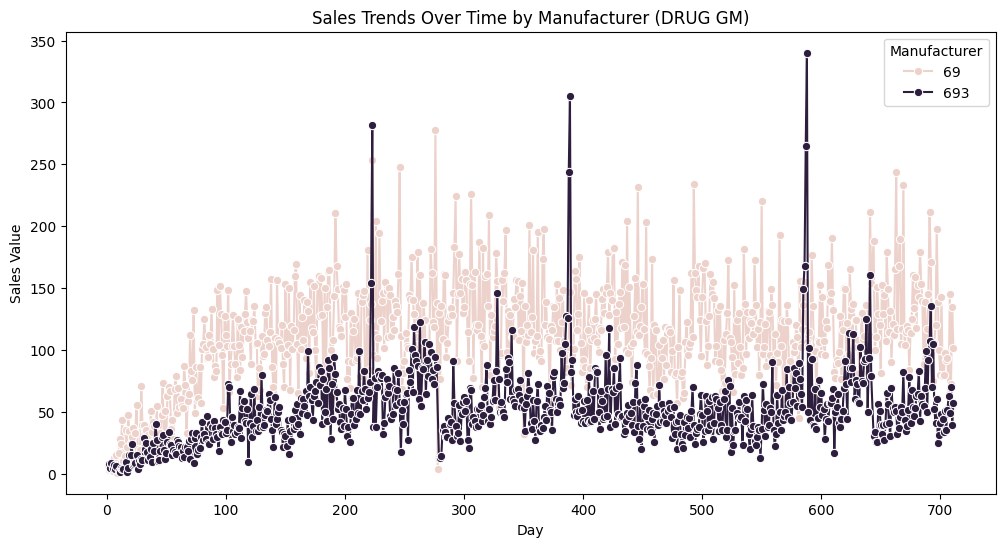

<ipython-input-19-24d8bbd34427>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transactions_by_manufacturer, x="MANUFACTURER", y="BASKET_ID", palette="muted")


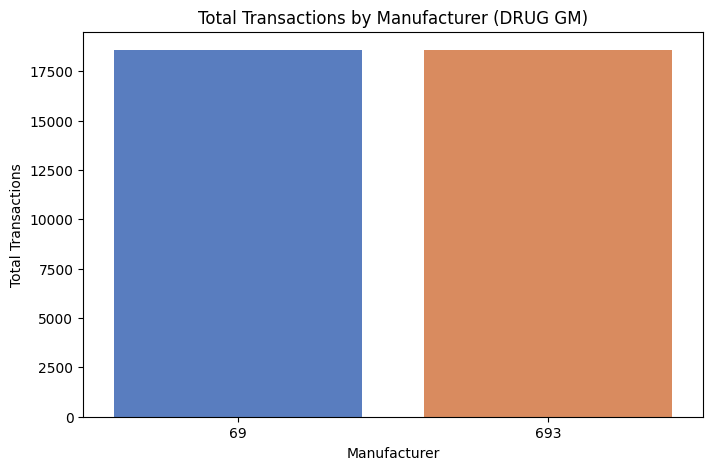

<ipython-input-19-24d8bbd34427>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=basket_composition, x="MANUFACTURER", y="AVERAGE_PRODUCTS_PER_TRANSACTION", palette="muted")


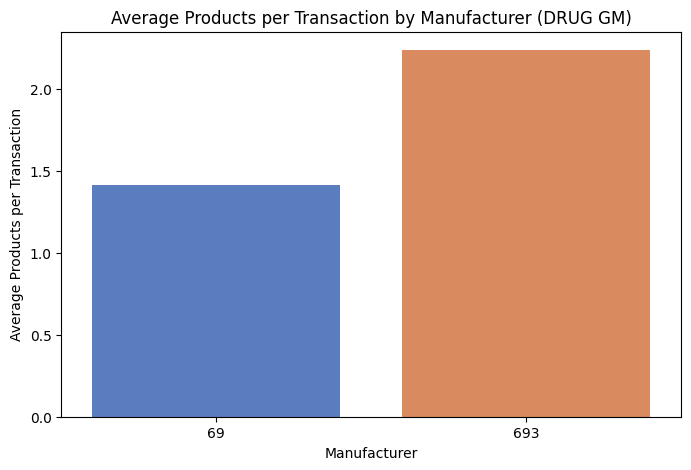

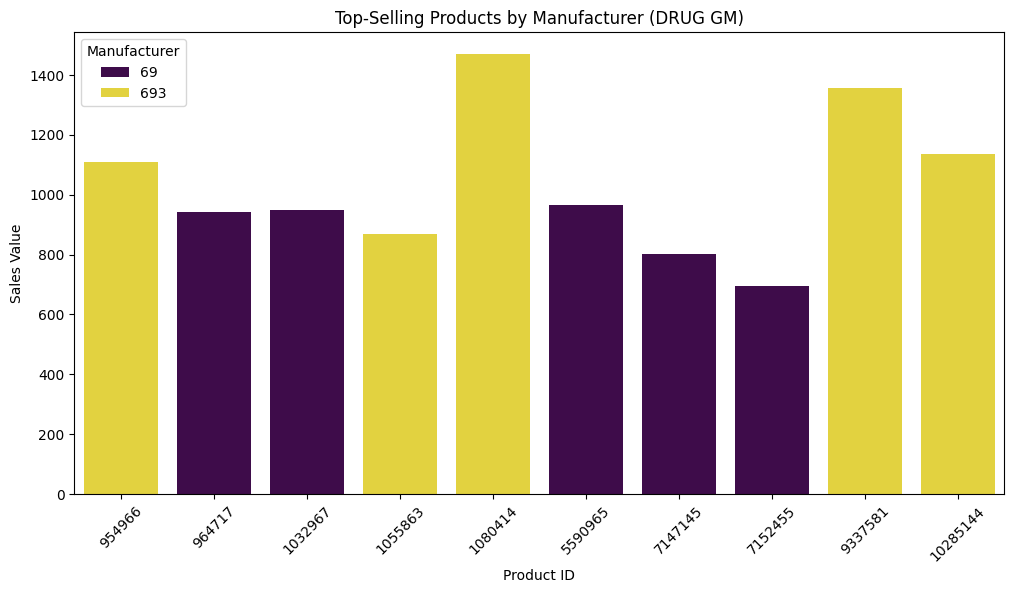

<ipython-input-19-24d8bbd34427>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=household_reach, x="MANUFACTURER", y="HOUSEHOLD_KEY", palette="muted")


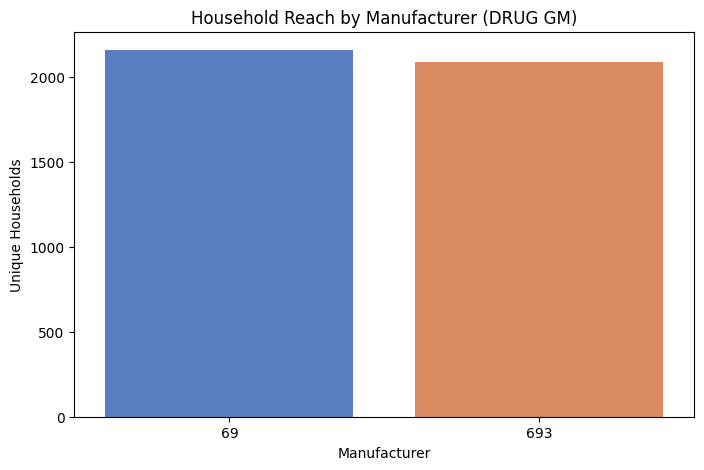

<ipython-input-19-24d8bbd34427>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_household, x="MANUFACTURER", y="SALES_PER_HOUSEHOLD", palette="muted")


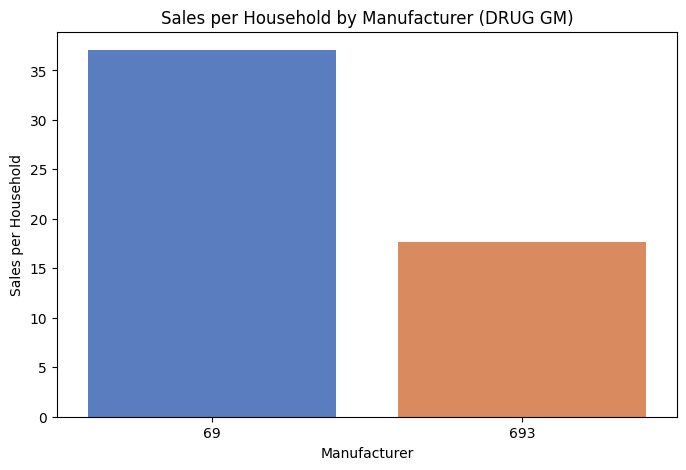

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

# Define manufacturers and department
selected_manufacturers = [69, 693]
selected_department = "DRUG GM"

# Filter products for selected manufacturers and department
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == selected_department)
]

# Filter transaction data
filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Merge transaction data with products
merged_transactions = filtered_transactions.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID", how="inner"
)

# Insights and Visualizations

# 1. Sales Performance
# A. Total Sales Value by Manufacturer
sales_by_manufacturer = merged_transactions.groupby("MANUFACTURER")["SALES_VALUE"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_manufacturer, x="MANUFACTURER", y="SALES_VALUE", palette="muted")
plt.title("Total Sales Value by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=0)
plt.show()

# B. Sales Trends Over Time
sales_trends = merged_transactions.groupby(["DAY", "MANUFACTURER"])["SALES_VALUE"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x="DAY", y="SALES_VALUE", hue="MANUFACTURER", marker="o")
plt.title("Sales Trends Over Time by Manufacturer (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Sales Value")
plt.legend(title="Manufacturer")
plt.show()

# 2. Customer Engagement
# A. Transaction Volume
transactions_by_manufacturer = merged_transactions.groupby("MANUFACTURER")["BASKET_ID"].nunique().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=transactions_by_manufacturer, x="MANUFACTURER", y="BASKET_ID", palette="muted")
plt.title("Total Transactions by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Total Transactions")
plt.xticks(rotation=0)
plt.show()

# B. Basket Composition (Average Products per Transaction)
basket_composition = merged_transactions.groupby("MANUFACTURER").agg(
    TOTAL_PRODUCTS=("QUANTITY", "sum"),
    TOTAL_TRANSACTIONS=("BASKET_ID", "nunique")
).reset_index()
basket_composition["AVERAGE_PRODUCTS_PER_TRANSACTION"] = basket_composition["TOTAL_PRODUCTS"] / basket_composition["TOTAL_TRANSACTIONS"]

plt.figure(figsize=(8, 5))
sns.barplot(data=basket_composition, x="MANUFACTURER", y="AVERAGE_PRODUCTS_PER_TRANSACTION", palette="muted")
plt.title("Average Products per Transaction by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Average Products per Transaction")
plt.xticks(rotation=0)
plt.show()

# 3. Product-Level Insights
# A. Top-Selling Products
top_selling_products = merged_transactions.groupby(["PRODUCT_ID", "MANUFACTURER"])["SALES_VALUE"].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by="SALES_VALUE", ascending=False).groupby("MANUFACTURER").head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_selling_products, x="PRODUCT_ID", y="SALES_VALUE", hue="MANUFACTURER", dodge=False, palette="viridis")
plt.title("Top-Selling Products by Manufacturer (DRUG GM)")
plt.xlabel("Product ID")
plt.ylabel("Sales Value")
plt.xticks(rotation=45)
plt.legend(title="Manufacturer")
plt.show()

# 4. Household Behavior
# A. Household Reach
household_reach = merged_transactions.groupby("MANUFACTURER")["HOUSEHOLD_KEY"].nunique().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=household_reach, x="MANUFACTURER", y="HOUSEHOLD_KEY", palette="muted")
plt.title("Household Reach by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Unique Households")
plt.xticks(rotation=0)
plt.show()

# B. Sales per Household
sales_per_household = merged_transactions.groupby("MANUFACTURER").agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TOTAL_HOUSEHOLDS=("HOUSEHOLD_KEY", "nunique")
).reset_index()
sales_per_household["SALES_PER_HOUSEHOLD"] = sales_per_household["TOTAL_SALES"] / sales_per_household["TOTAL_HOUSEHOLDS"]

plt.figure(figsize=(8, 5))
sns.barplot(data=sales_per_household, x="MANUFACTURER", y="SALES_PER_HOUSEHOLD", palette="muted")
plt.title("Sales per Household by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Sales per Household")
plt.xticks(rotation=0)
plt.show()


<ipython-input-6-7b8e3166c50a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_by_manufacturer, x="MANUFACTURER", y="SALES_VALUE", palette="Reds")


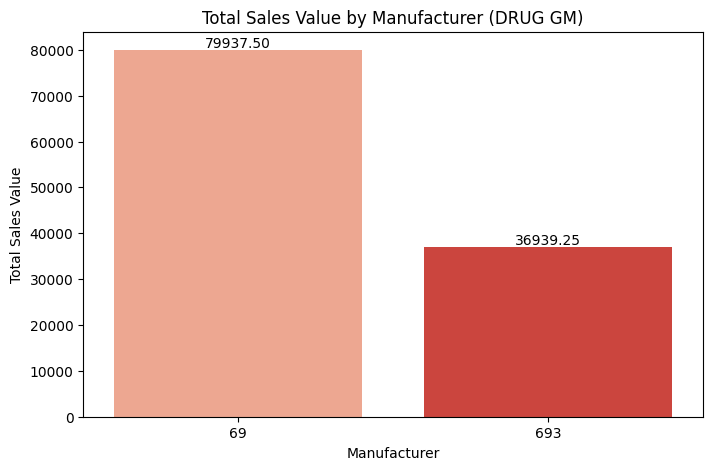

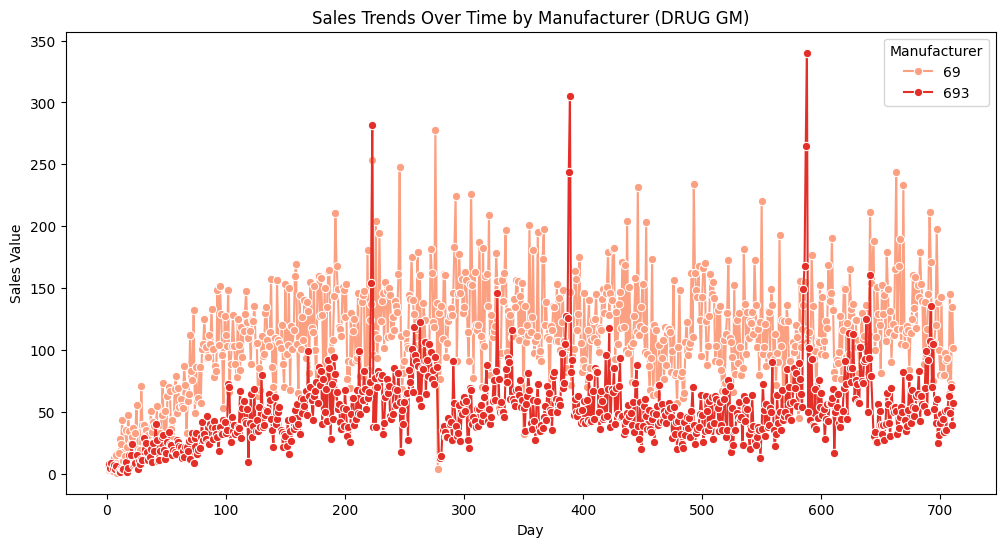

<ipython-input-6-7b8e3166c50a>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=transactions_by_manufacturer, x="MANUFACTURER", y="BASKET_ID", palette="Reds")


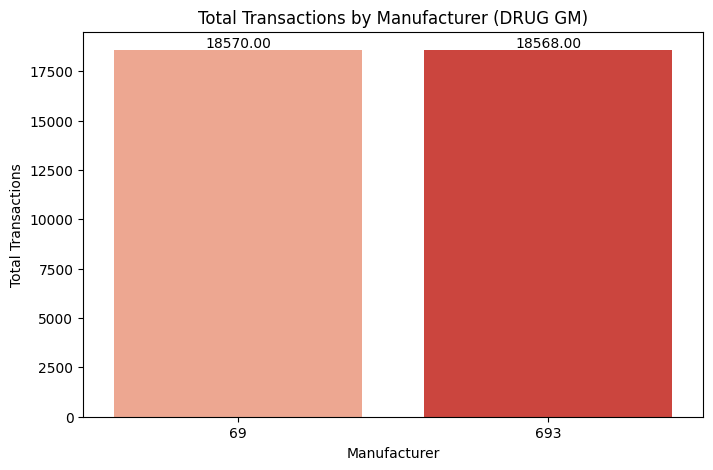

<ipython-input-6-7b8e3166c50a>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=basket_composition, x="MANUFACTURER", y="AVERAGE_PRODUCTS_PER_TRANSACTION", palette="Reds")


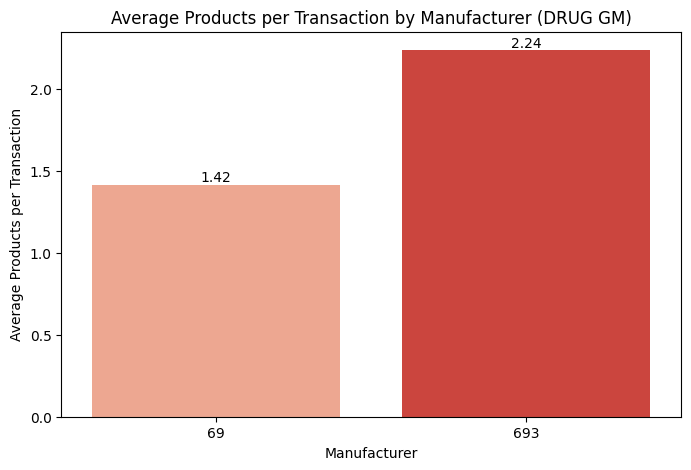

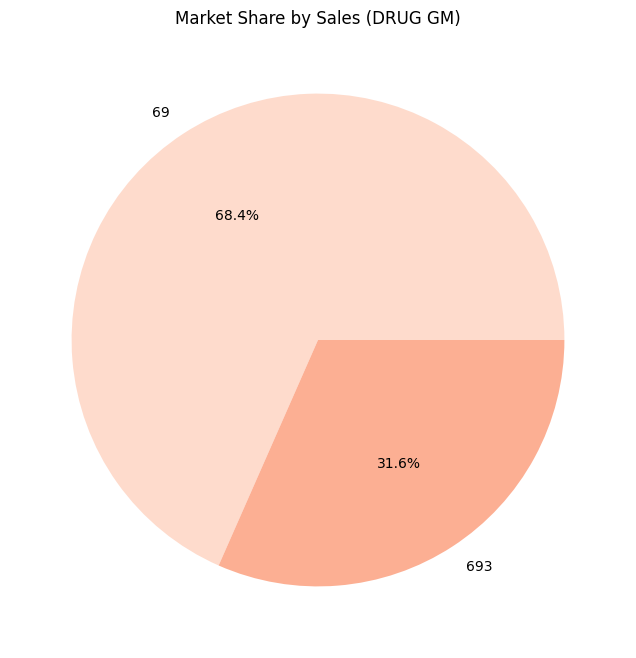

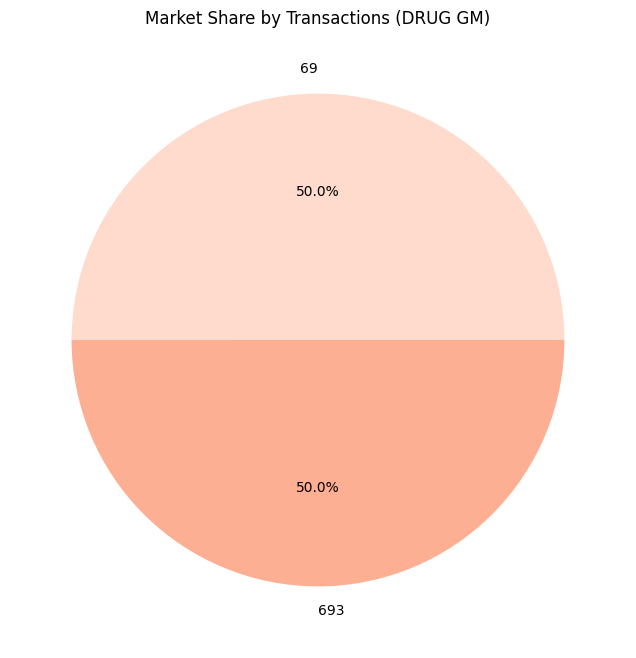

<ipython-input-6-7b8e3166c50a>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=household_reach, x="MANUFACTURER", y="HOUSEHOLD_KEY", palette="Reds")


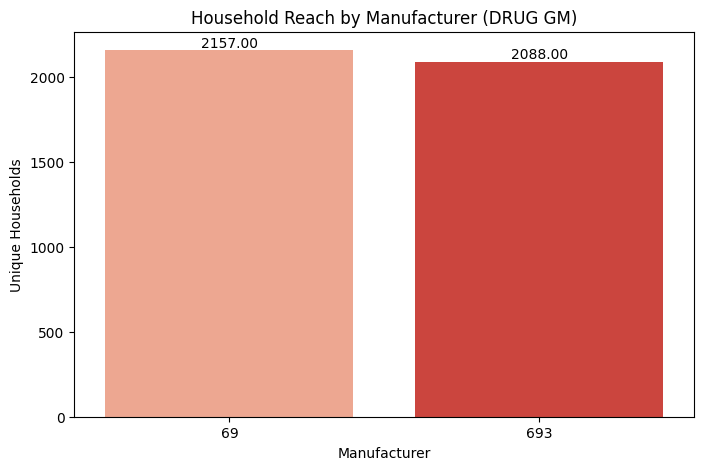

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

# Define manufacturers and department
selected_manufacturers = [69, 693]
selected_department = "DRUG GM"

# Filter products for selected manufacturers and department
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == selected_department)
]

# Filter transaction data
filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Merge transaction data with products
merged_transactions = filtered_transactions.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER", "DEPARTMENT"]],
    on="PRODUCT_ID", how="inner"
)

# Function to add labels to bars
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height():.2f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10)

# 1. Sales Performance
# A. Total Sales Value by Manufacturer
sales_by_manufacturer = merged_transactions.groupby("MANUFACTURER")["SALES_VALUE"].sum().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=sales_by_manufacturer, x="MANUFACTURER", y="SALES_VALUE", palette="Reds")
add_labels(ax)
plt.title("Total Sales Value by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=0)
plt.show()

# B. Sales Trends Over Time
sales_trends = merged_transactions.groupby(["DAY", "MANUFACTURER"])["SALES_VALUE"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x="DAY", y="SALES_VALUE", hue="MANUFACTURER", marker="o",   palette=sns.color_palette("Reds", n_colors=2))
plt.title("Sales Trends Over Time by Manufacturer (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Sales Value")
plt.legend(title="Manufacturer")
plt.show()

# 2. Customer Engagement
# A. Transaction Volume
transactions_by_manufacturer = merged_transactions.groupby("MANUFACTURER")["BASKET_ID"].nunique().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=transactions_by_manufacturer, x="MANUFACTURER", y="BASKET_ID", palette="Reds")
add_labels(ax)
plt.title("Total Transactions by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Total Transactions")
plt.xticks(rotation=0)
plt.show()

# B. Basket Composition (Average Products per Transaction)
basket_composition = merged_transactions.groupby("MANUFACTURER").agg(
    TOTAL_PRODUCTS=("QUANTITY", "sum"),
    TOTAL_TRANSACTIONS=("BASKET_ID", "nunique")
).reset_index()
basket_composition["AVERAGE_PRODUCTS_PER_TRANSACTION"] = basket_composition["TOTAL_PRODUCTS"] / basket_composition["TOTAL_TRANSACTIONS"]

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=basket_composition, x="MANUFACTURER", y="AVERAGE_PRODUCTS_PER_TRANSACTION", palette="Reds")
add_labels(ax)
plt.title("Average Products per Transaction by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Average Products per Transaction")
plt.xticks(rotation=0)
plt.show()

# 3. Market Share (Pie Charts)
# A. Market Share by Sales
sales_market_share = sales_by_manufacturer.set_index("MANUFACTURER")["SALES_VALUE"]
plt.figure(figsize=(8, 8))
plt.pie(sales_market_share, labels=sales_market_share.index, autopct='%1.1f%%', colors=sns.color_palette("Reds"))
plt.title("Market Share by Sales (DRUG GM)")
plt.show()

# B. Market Share by Transactions
transactions_market_share = transactions_by_manufacturer.set_index("MANUFACTURER")["BASKET_ID"]
plt.figure(figsize=(8, 8))
plt.pie(transactions_market_share, labels=transactions_market_share.index, autopct='%1.1f%%', colors=sns.color_palette("Reds"))
plt.title("Market Share by Transactions (DRUG GM)")
plt.show()

# 4. Household Reach
household_reach = merged_transactions.groupby("MANUFACTURER")["HOUSEHOLD_KEY"].nunique().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=household_reach, x="MANUFACTURER", y="HOUSEHOLD_KEY", palette="Reds")
add_labels(ax)
plt.title("Household Reach by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Unique Households")
plt.xticks(rotation=0)
plt.show()


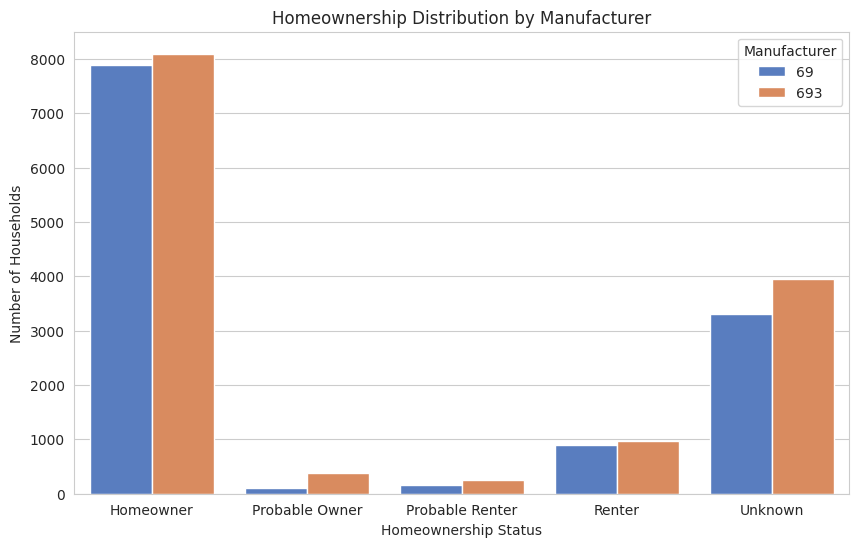

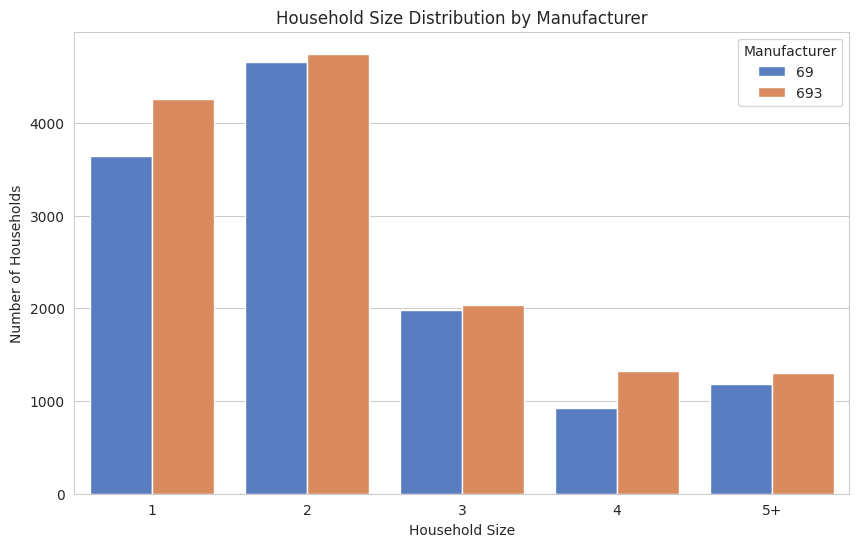

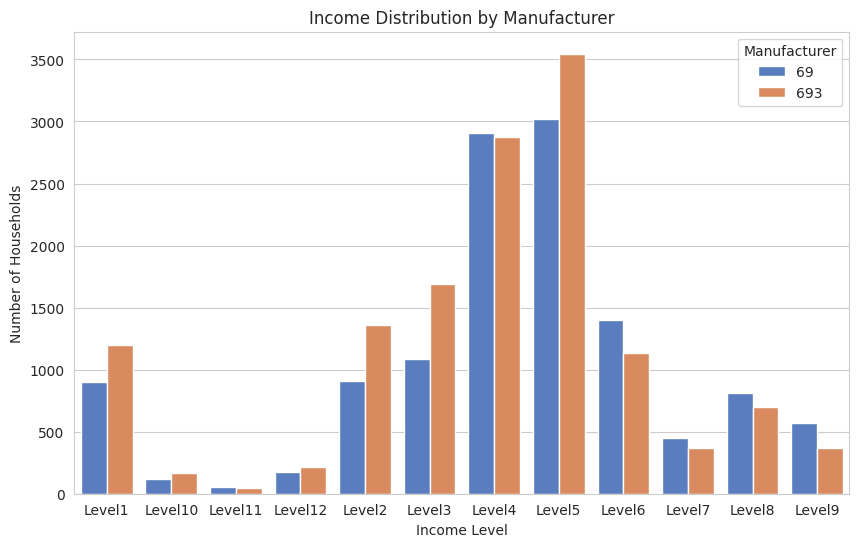

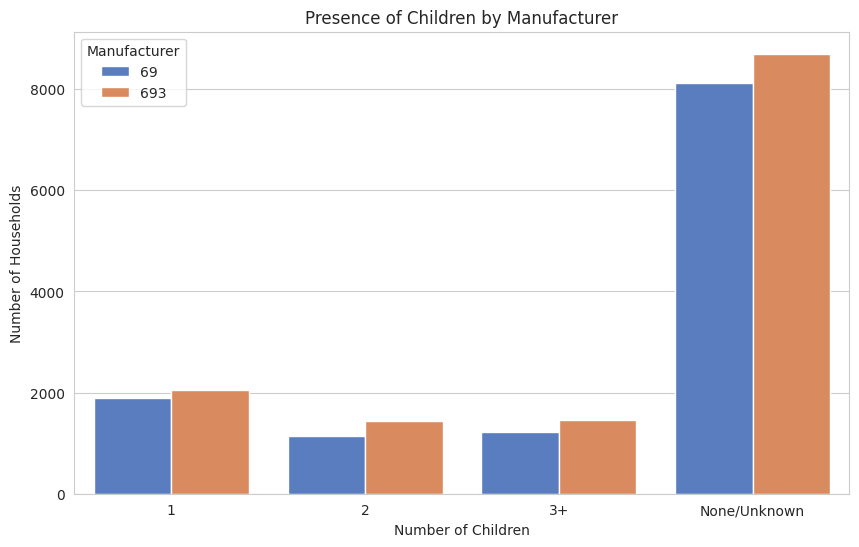

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load demographic data
hh_demographic = pd.read_csv("hh_demographic.csv")  # Replace with actual file path
hh_demographic.columns = hh_demographic.columns.str.upper()

# Transaction data and manufacturer filtering for linkage
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

# Define manufacturers for analysis
selected_manufacturers = [69, 693]
selected_department = "DRUG GM"

# Step 1: Filter products and transactions for selected manufacturers
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == selected_department)
]

filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Merge transactions with demographics
merged_data = filtered_transactions.merge(
    hh_demographic, on="HOUSEHOLD_KEY", how="inner"
).merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]], on="PRODUCT_ID", how="inner"
)

# Step 2: Descriptive Statistics
# A. Homeownership Distribution
homeownership_dist = merged_data.groupby(["MANUFACTURER", "HOMEOWNER_DESC"]).size().reset_index(name="COUNT")

# B. Household Size Distribution
household_size_dist = merged_data.groupby(["MANUFACTURER", "CLASSIFICATION_4"]).size().reset_index(name="COUNT")

# C. Income Distribution
income_dist = merged_data.groupby(["MANUFACTURER", "CLASSIFICATION_3"]).size().reset_index(name="COUNT")

# D. Presence of Children
children_dist = merged_data.groupby(["MANUFACTURER", "KID_CATEGORY_DESC"]).size().reset_index(name="COUNT")

# Step 3: Visualizations
sns.set_style("whitegrid")

# A. Homeownership Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=homeownership_dist, x="HOMEOWNER_DESC", y="COUNT", hue="MANUFACTURER", palette="muted")
plt.title("Homeownership Distribution by Manufacturer")
plt.xlabel("Homeownership Status")
plt.ylabel("Number of Households")
plt.legend(title="Manufacturer")
plt.show()

# B. Household Size Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=household_size_dist, x="CLASSIFICATION_4", y="COUNT", hue="MANUFACTURER", palette="muted")
plt.title("Household Size Distribution by Manufacturer")
plt.xlabel("Household Size")
plt.ylabel("Number of Households")
plt.legend(title="Manufacturer")
plt.show()

# C. Income Distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=income_dist, x="CLASSIFICATION_3", y="COUNT", hue="MANUFACTURER", palette="muted")
plt.title("Income Distribution by Manufacturer")
plt.xlabel("Income Level")
plt.ylabel("Number of Households")
plt.legend(title="Manufacturer")
plt.show()

# D. Presence of Children
plt.figure(figsize=(10, 6))
sns.barplot(data=children_dist, x="KID_CATEGORY_DESC", y="COUNT", hue="MANUFACTURER", palette="muted")
plt.title("Presence of Children by Manufacturer")
plt.xlabel("Number of Children")
plt.ylabel("Number of Households")
plt.legend(title="Manufacturer")
plt.show()

# Save Results for Analysis
homeownership_dist.to_csv("homeownership_distribution.csv", index=False)
household_size_dist.to_csv("household_size_distribution.csv", index=False)
income_dist.to_csv("income_distribution.csv", index=False)
children_dist.to_csv("children_distribution.csv", index=False)


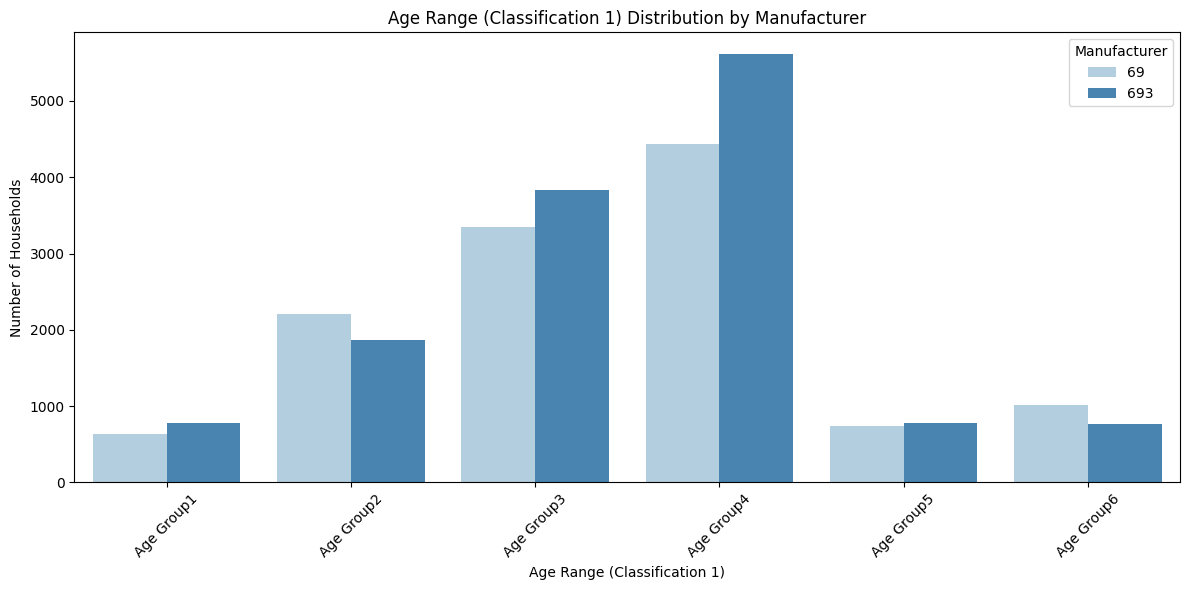

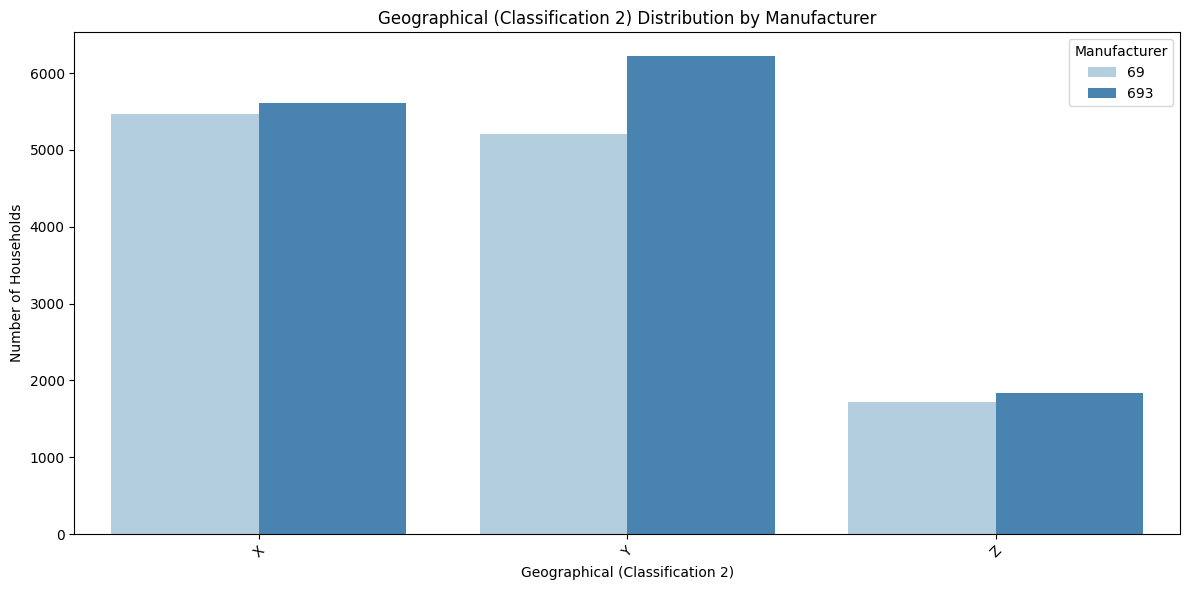

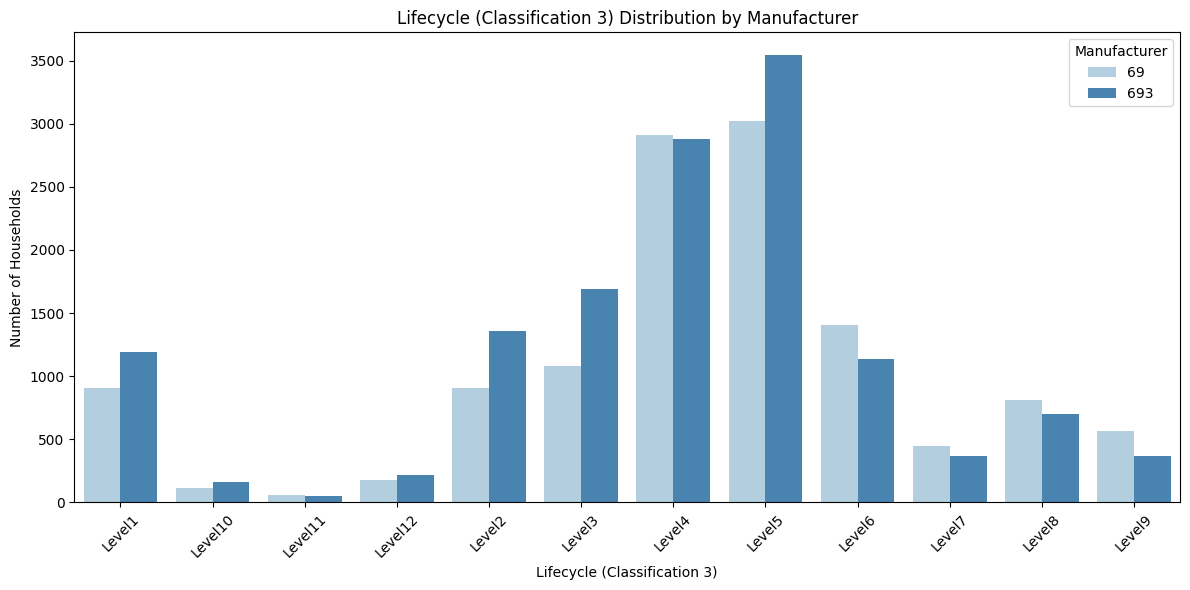

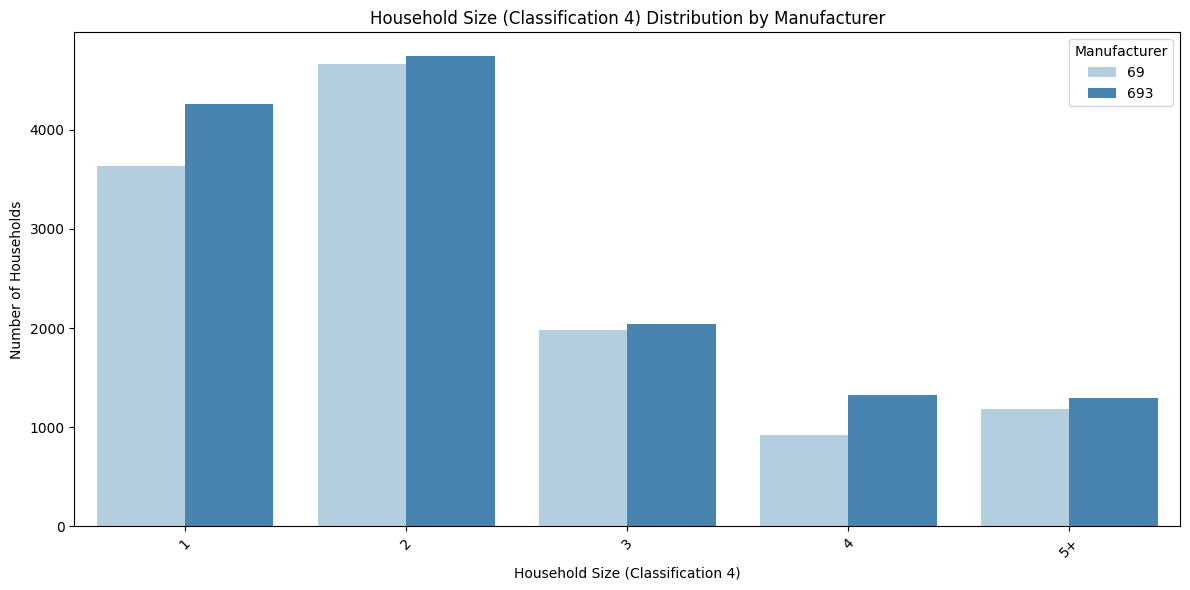

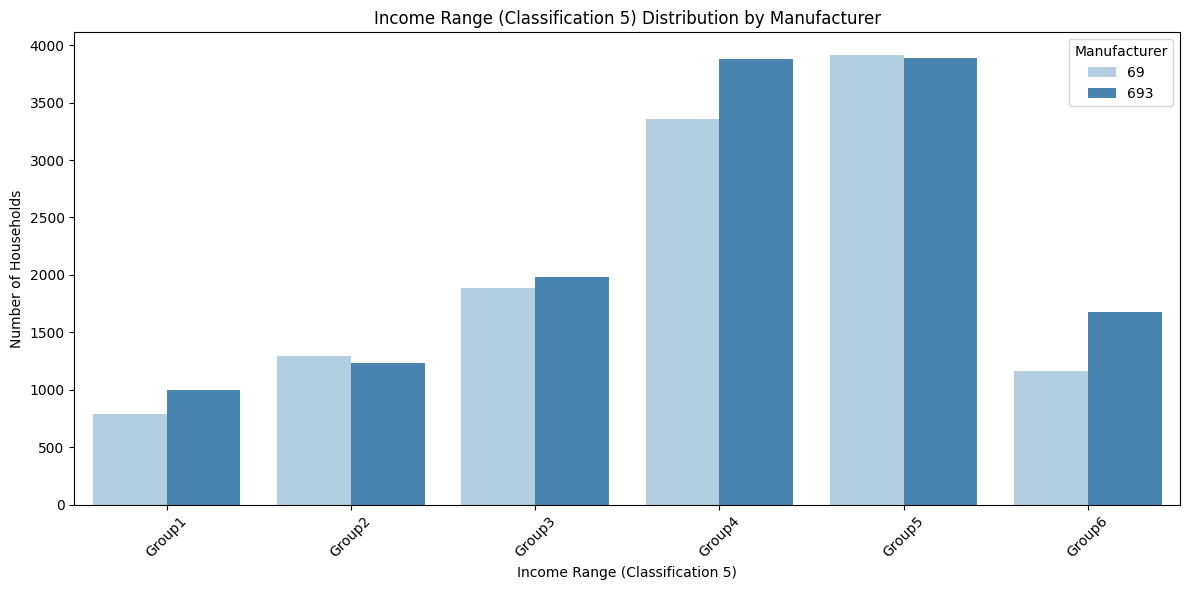

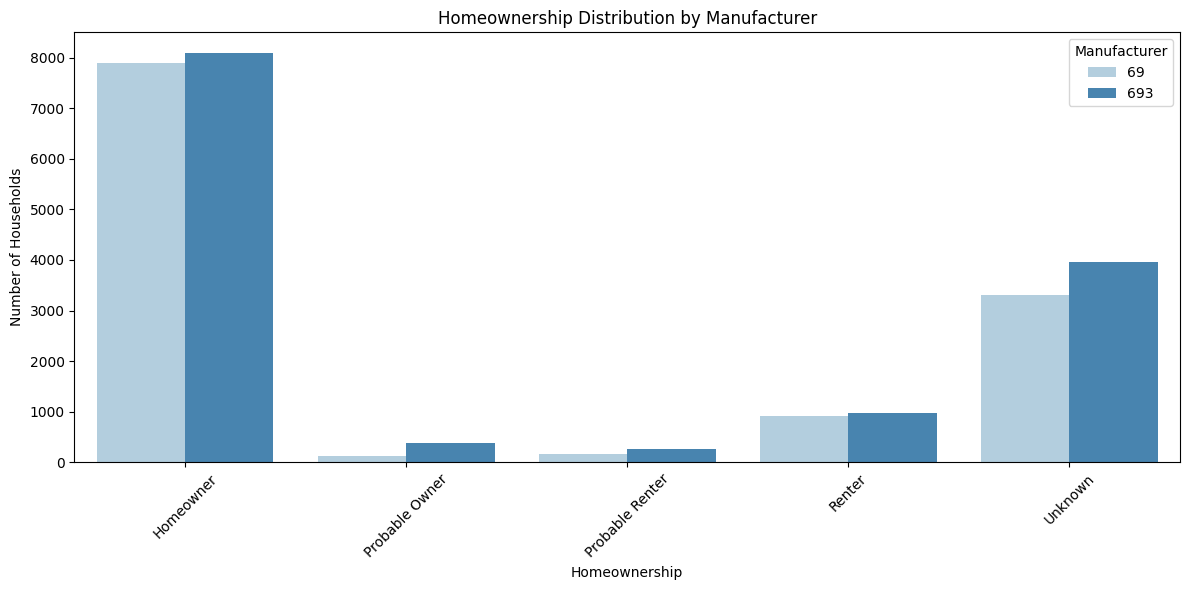

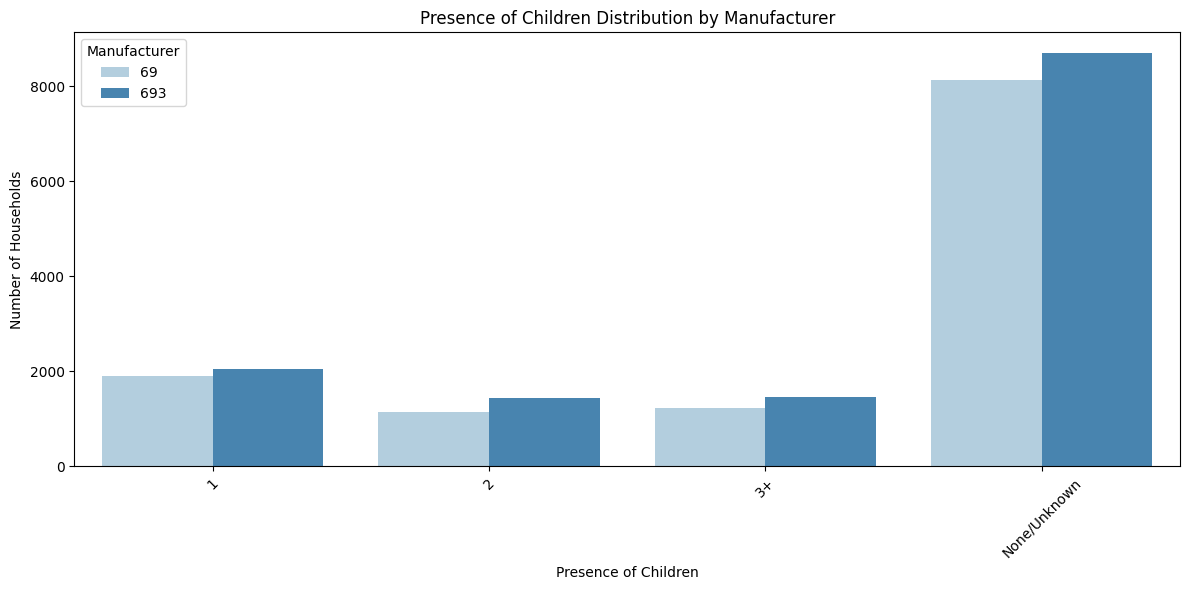

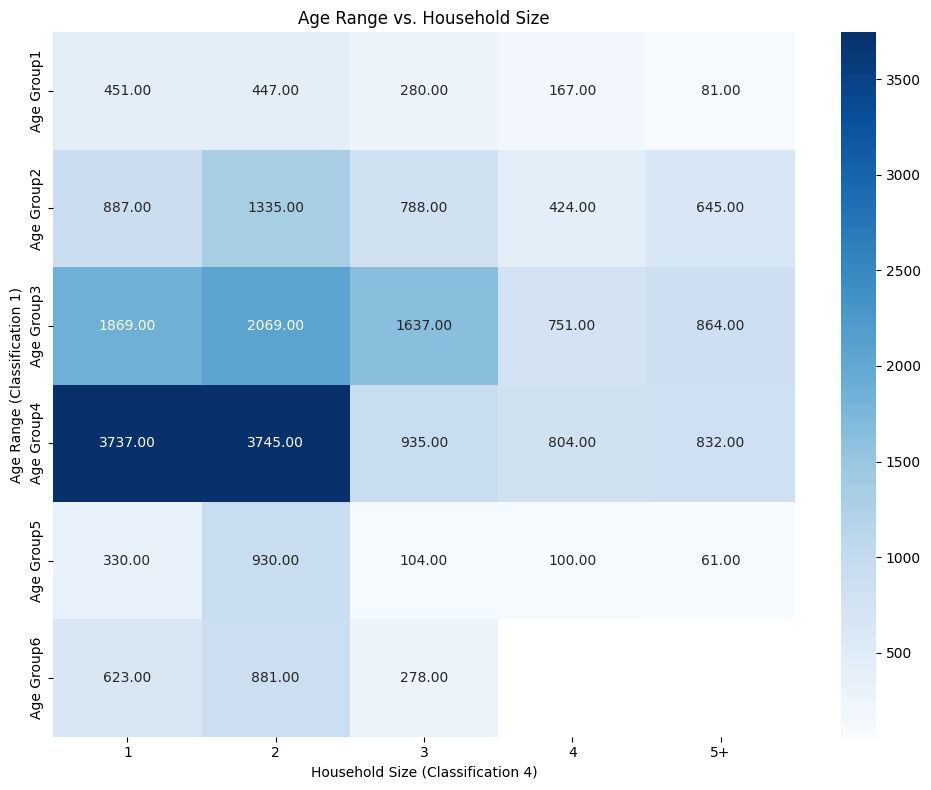

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load demographic data
hh_demographic = pd.read_csv("hh_demographic.csv")  # Replace with actual file path
hh_demographic.columns = hh_demographic.columns.str.upper()

# Load transaction and product data
transaction_data = pd.read_csv("transaction_data.csv")  # Replace with actual file path
transaction_data.columns = transaction_data.columns.str.upper()

product_data = pd.read_csv("product.csv")  # Replace with actual file path
product_data.columns = product_data.columns.str.upper()

# Define manufacturers for analysis
selected_manufacturers = [69, 693]
selected_department = "DRUG GM"

# Step 1: Filter products and transactions for selected manufacturers
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == selected_department)
]

filtered_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Merge transactions with demographics
merged_data = filtered_transactions.merge(
    hh_demographic, on="HOUSEHOLD_KEY", how="inner"
).merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]], on="PRODUCT_ID", how="inner"
)

# Step 2: Descriptive Statistics for All Metrics
metrics = {
    "Age Range (Classification 1)": "CLASSIFICATION_1",
    "Geographical (Classification 2)": "CLASSIFICATION_2",
    "Lifecycle (Classification 3)": "CLASSIFICATION_3",
    "Household Size (Classification 4)": "CLASSIFICATION_4",
    "Income Range (Classification 5)": "CLASSIFICATION_5",
    "Homeownership": "HOMEOWNER_DESC",
    "Presence of Children": "KID_CATEGORY_DESC"
}

# Loop through metrics to generate grouped data and visualizations
for metric_name, column_name in metrics.items():
    # Group data by manufacturer and demographic metric
    grouped_data = merged_data.groupby(["MANUFACTURER", column_name]).size().reset_index(name="COUNT")

    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(data=grouped_data, x=column_name, y="COUNT", hue="MANUFACTURER",  palette=sns.color_palette("Blues", n_colors=2) )
    plt.title(f"{metric_name} Distribution by Manufacturer")
    plt.xlabel(metric_name)
    plt.ylabel("Number of Households")
    plt.legend(title="Manufacturer")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save grouped data for reference
    grouped_data.to_csv(f"{metric_name.replace(' ', '_').lower()}_distribution.csv", index=False)

# Step 3: Combined Analysis (Optional)
# Example: Cross-tabulation between Age Range (Classification 1) and Household Size (Classification 4)
cross_tab = pd.crosstab(
    index=merged_data["CLASSIFICATION_1"],
    columns=merged_data["CLASSIFICATION_4"],
    values=merged_data["HOUSEHOLD_KEY"],
    aggfunc="count"
)

# Heatmap for combined analysis
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="Blues")
plt.title("Age Range vs. Household Size")
plt.xlabel("Household Size (Classification 4)")
plt.ylabel("Age Range (Classification 1)")
plt.tight_layout()
plt.show()


<ipython-input-20-2d919727899d>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=redemption_rates, x="MANUFACTURER", y="REDEMPTION_RATE", palette="Greens")


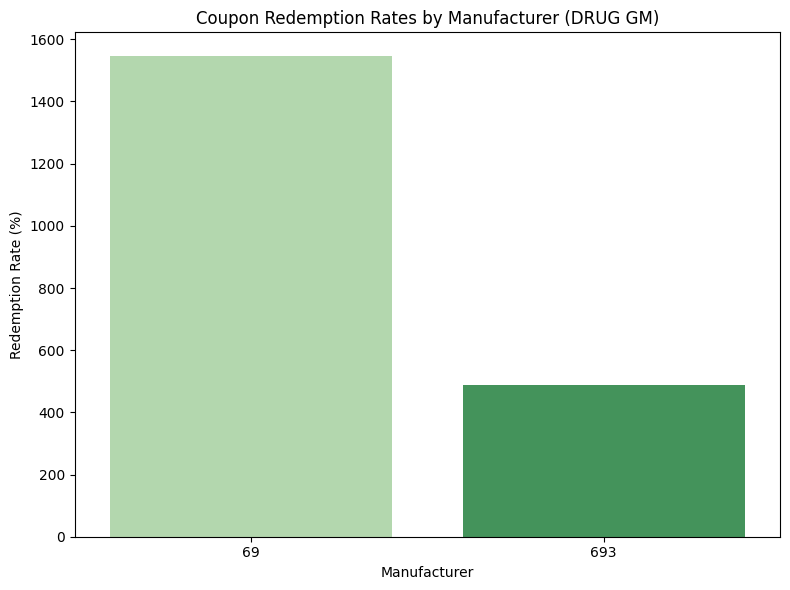

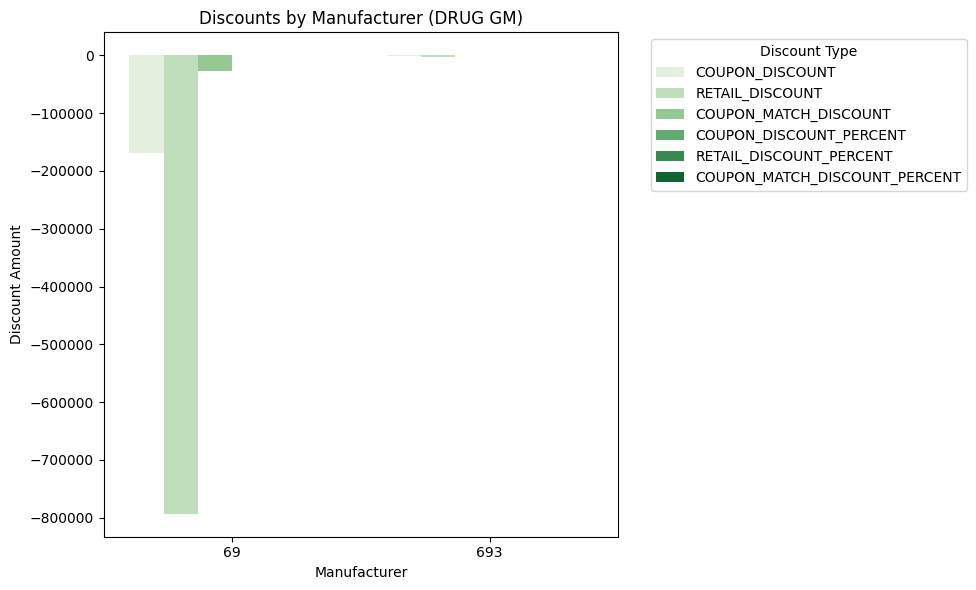

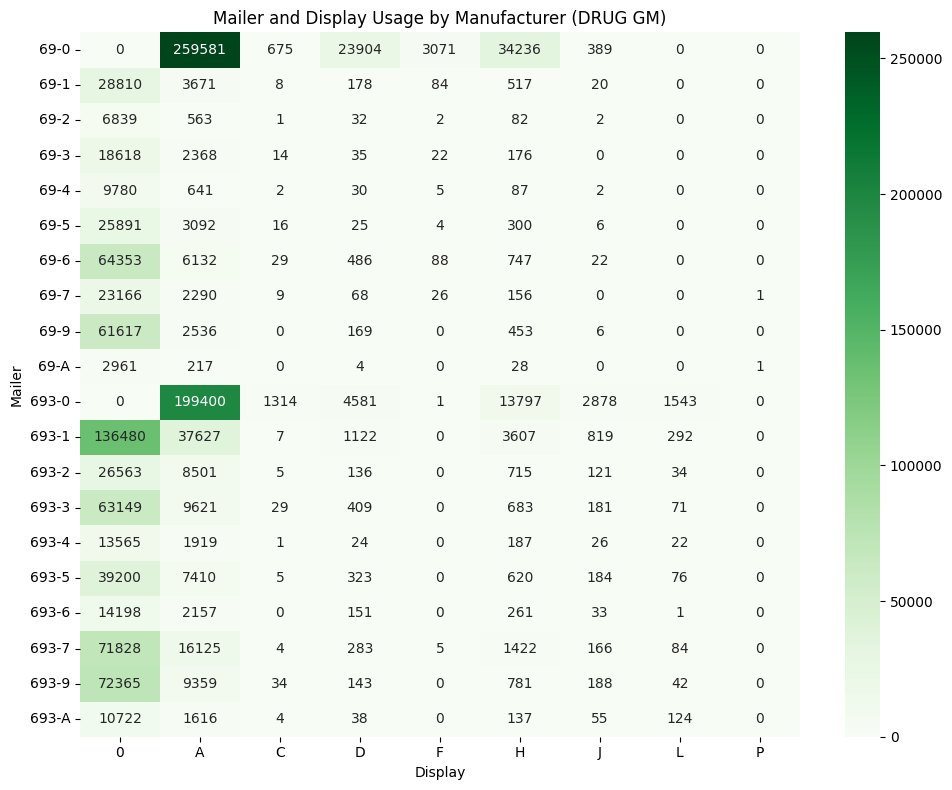

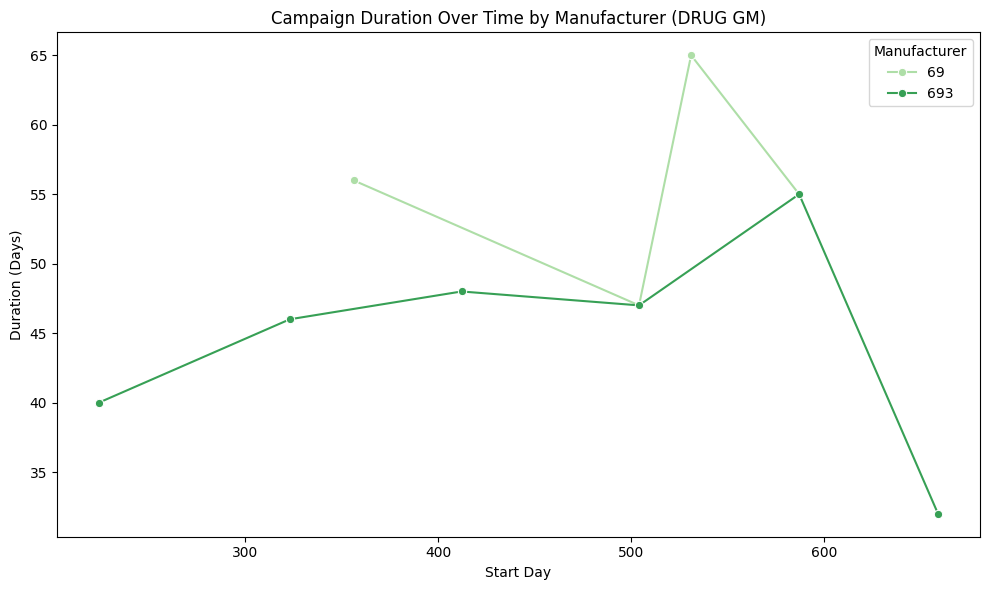


Redemption Rates:
   MANUFACTURER  TOTAL_COUPONS_REDEEMED  TOTAL_COUPONS_ISSUED  REDEMPTION_RATE
0            69                   29605                  1916      1545.146138
1           693                     151                    31       487.096774

Discount Analysis:
   MANUFACTURER  COUPON_DISCOUNT  RETAIL_DISCOUNT  COUPON_MATCH_DISCOUNT  \
0            69       -168929.95       -793156.15              -27160.20   
1           693          -818.71         -3739.00                -125.01   

   COUPON_DISCOUNT_PERCENT  RETAIL_DISCOUNT_PERCENT  \
0                99.517693                99.530804   
1                 0.482307                 0.469196   

   COUPON_MATCH_DISCOUNT_PERCENT  
0                       99.54184  
1                        0.45816  

Mailer and Display Usage:
    MANUFACTURER DISPLAY  DISPLAY_COUNT
0             69       0         321856
1             69       1          33288
2             69       2           7521
3             69       3          212

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
campaign_table = pd.read_csv("campaign_table.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")
coupon_data = pd.read_csv("coupon.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [campaign_table, campaign_desc, coupon_data, coupon_redempt_data, causal_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Filter product data for DRUG GM department
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Filter coupon data for DRUG GM products
filtered_coupons = coupon_data.merge(filtered_products, on="PRODUCT_ID", how="inner")

# Filter coupon redemption data for DRUG GM products
coupon_redemptions = coupon_redempt_data.merge(filtered_coupons, on="COUPON_UPC", how="inner")

# Filter causal data for DRUG GM products
filtered_causal = causal_data.merge(filtered_products, on="PRODUCT_ID", how="inner")

# Merge campaign data with coupon data
campaign_coupons = filtered_coupons.merge(campaign_desc, on="CAMPAIGN", how="inner")

# Merge coupon redemption data with transaction data to include discounts
coupon_redemptions_with_discounts = coupon_redemptions.merge(
    transaction_data[["HOUSEHOLD_KEY", "DAY", "COUPON_MATCH_DISC", "RETAIL_DISC", "COUPON_DISC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="inner"
)

# --- Analysis ---

# 1. Redemption Rates
redemption_rates = coupon_redemptions.groupby("MANUFACTURER").agg(
    TOTAL_COUPONS_REDEEMED=("COUPON_UPC", "count")
).reset_index()
total_coupons = filtered_coupons.groupby("MANUFACTURER").agg(
    TOTAL_COUPONS_ISSUED=("COUPON_UPC", "count")
).reset_index()
redemption_rates = redemption_rates.merge(total_coupons, on="MANUFACTURER", how="left")
redemption_rates["REDEMPTION_RATE"] = (
    redemption_rates["TOTAL_COUPONS_REDEEMED"] / redemption_rates["TOTAL_COUPONS_ISSUED"] * 100
)

# 2. Discount Analysis
discounts = coupon_redemptions_with_discounts.groupby("MANUFACTURER").agg(
    COUPON_DISCOUNT=("COUPON_DISC", "sum"),
    RETAIL_DISCOUNT=("RETAIL_DISC", "sum"),
    COUPON_MATCH_DISCOUNT=("COUPON_MATCH_DISC", "sum")
).reset_index()

# Add percentage contributions of each discount type
discounts["COUPON_DISCOUNT_PERCENT"] = (discounts["COUPON_DISCOUNT"] / discounts["COUPON_DISCOUNT"].sum()) * 100
discounts["RETAIL_DISCOUNT_PERCENT"] = (discounts["RETAIL_DISCOUNT"] / discounts["RETAIL_DISCOUNT"].sum()) * 100
discounts["COUPON_MATCH_DISCOUNT_PERCENT"] = (
    discounts["COUPON_MATCH_DISCOUNT"] / discounts["COUPON_MATCH_DISCOUNT"].sum()
) * 100

# 3. Causal Data Analysis (Mailer and Display)
causal_analysis = filtered_causal.groupby(["MANUFACTURER", "DISPLAY"]).size().reset_index(name="DISPLAY_COUNT")
causal_mailer_analysis = filtered_causal.groupby(["MANUFACTURER", "MAILER"]).size().reset_index(name="MAILER_COUNT")

# --- Visualizations ---

# Bar Chart: Redemption Rates
plt.figure(figsize=(8, 6))
sns.barplot(data=redemption_rates, x="MANUFACTURER", y="REDEMPTION_RATE", palette="Greens")
plt.title("Coupon Redemption Rates by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Redemption Rate (%)")
plt.xticks(ticks=[0, 1], labels=["69", "693"])
plt.tight_layout()
plt.show()

# Stacked Bar Chart: Discounts
discounts_melted = discounts.melt(id_vars=["MANUFACTURER"], var_name="DISCOUNT_TYPE", value_name="DISCOUNT_AMOUNT")
plt.figure(figsize=(10, 6))
sns.barplot(data=discounts_melted, x="MANUFACTURER", y="DISCOUNT_AMOUNT", hue="DISCOUNT_TYPE", palette="Greens")
plt.title("Discounts by Manufacturer (DRUG GM)")
plt.xlabel("Manufacturer")
plt.ylabel("Discount Amount")
plt.xticks(ticks=[0, 1], labels=["69", "693"])
plt.legend(title="Discount Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Heatmap: Mailer and Display Usage
causal_pivot = filtered_causal.groupby(["MANUFACTURER", "DISPLAY", "MAILER"]).size().unstack(fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(causal_pivot, annot=True, fmt="d", cmap="Greens")
plt.title("Mailer and Display Usage by Manufacturer (DRUG GM)")
plt.xlabel("Display")
plt.ylabel("Mailer")
plt.tight_layout()
plt.show()

# Line Plot: Campaign Duration
campaign_timing = campaign_coupons.groupby(["MANUFACTURER", "START_DAY", "END_DAY"]).size().reset_index(name="TOTAL_CAMPAIGNS")
campaign_timing["DURATION"] = campaign_timing["END_DAY"] - campaign_timing["START_DAY"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=campaign_timing, x="START_DAY", y="DURATION", hue="MANUFACTURER", palette=sns.color_palette("Greens", n_colors=2), marker="o")
plt.title("Campaign Duration Over Time by Manufacturer (DRUG GM)")
plt.xlabel("Start Day")
plt.ylabel("Duration (Days)")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# --- Descriptive Outputs ---
print("\nRedemption Rates:")
print(redemption_rates)

print("\nDiscount Analysis:")
print(discounts)

print("\nMailer and Display Usage:")
print(causal_analysis)
print(causal_mailer_analysis)


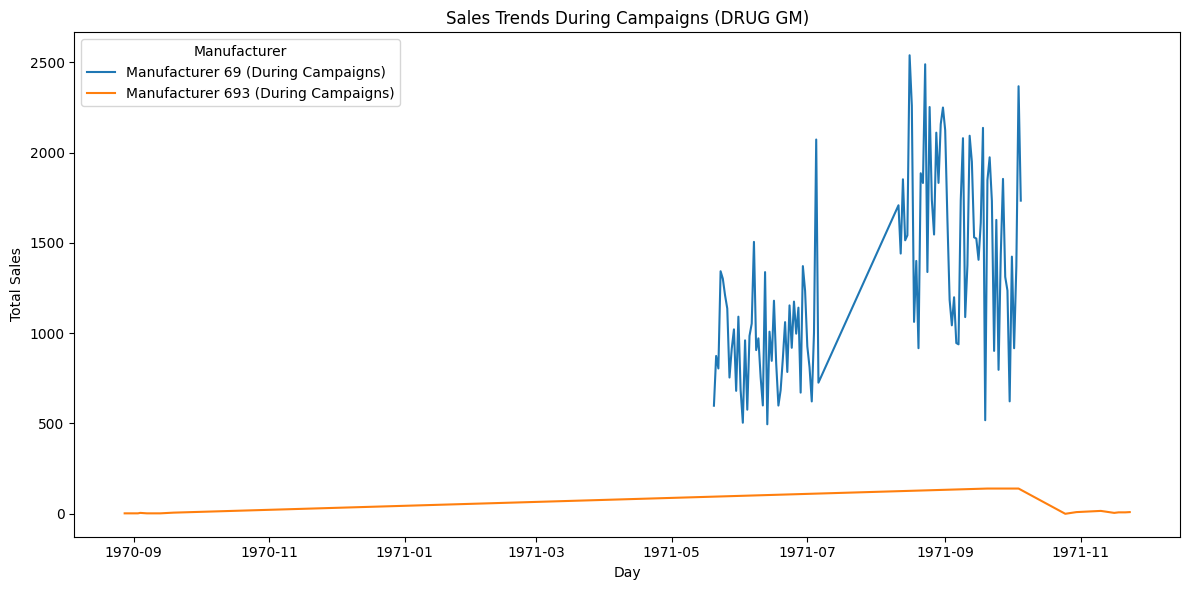

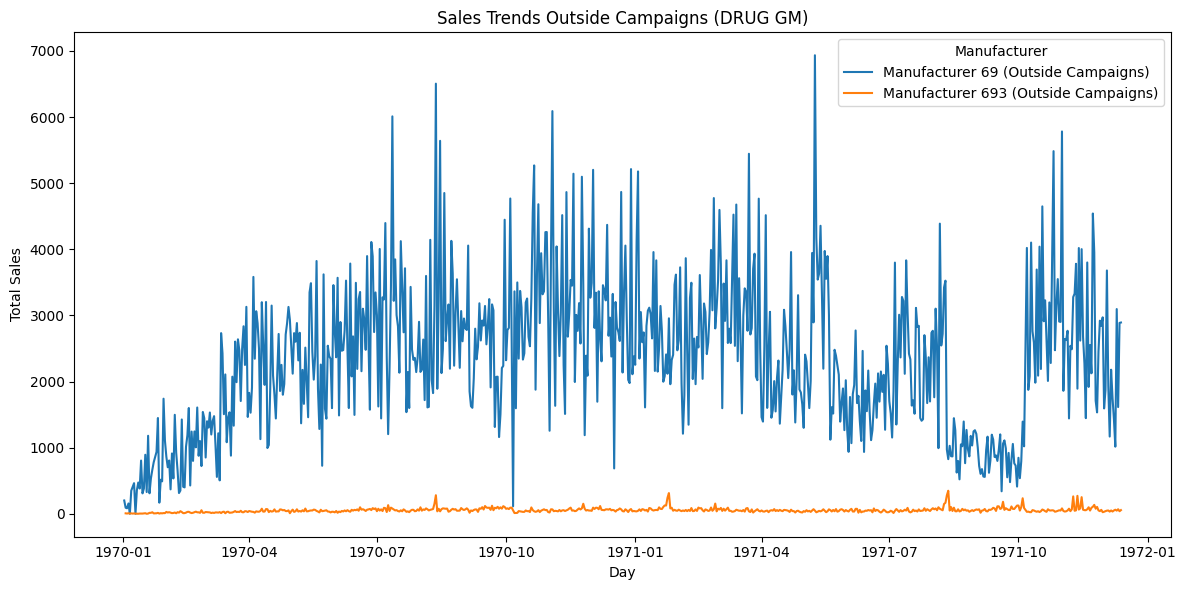

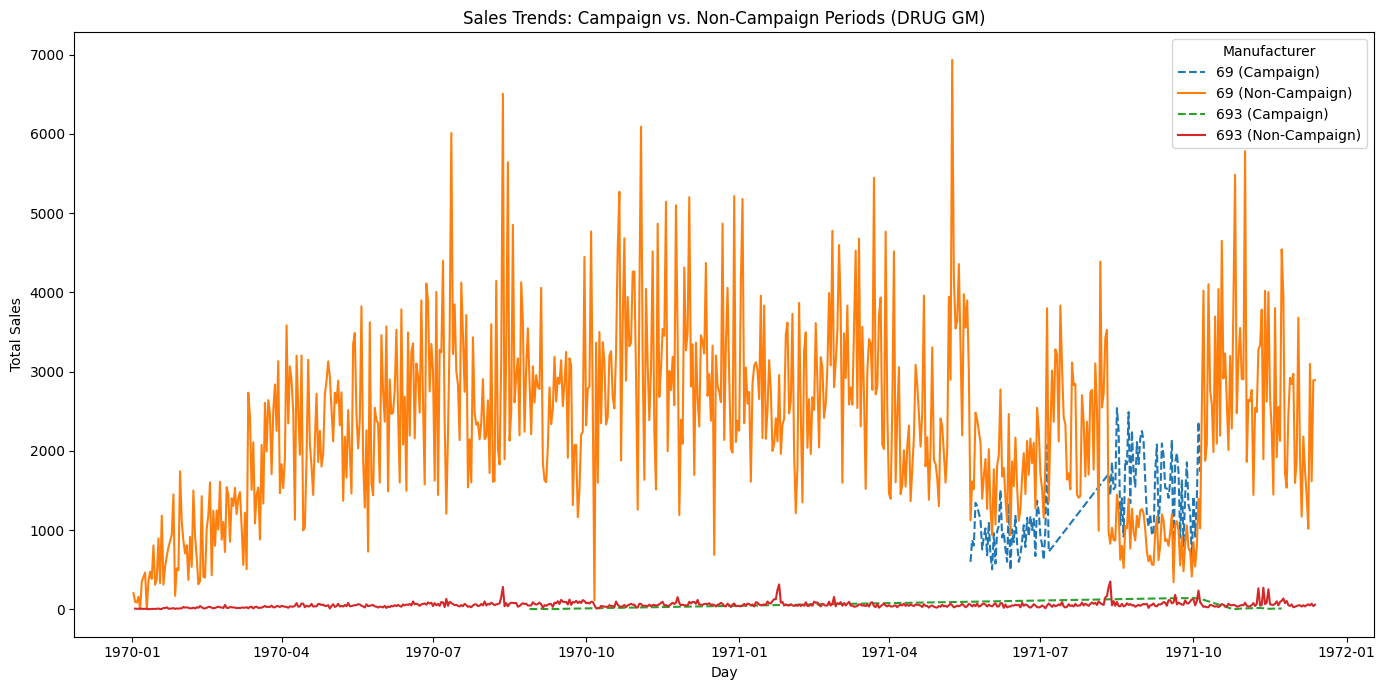

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
campaign_desc = pd.read_csv("campaign_desc.csv")
coupon_data = pd.read_csv("coupon.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [campaign_desc, coupon_data, coupon_redempt_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter product data for DRUG GM department and selected manufacturers
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Step 2: Merge coupon data with product data
filtered_coupons = coupon_data.merge(filtered_products, on="PRODUCT_ID", how="inner")

# Step 3: Merge coupon redemption data with filtered coupons
coupon_redemptions = coupon_redempt_data.merge(filtered_coupons, on="COUPON_UPC", how="inner")

# Drop duplicate campaign columns and rename
coupon_redemptions = coupon_redemptions.drop(
    columns=["CAMPAIGN_y"]
).rename(columns={"CAMPAIGN_x": "CAMPAIGN"})

# Step 4: Merge campaign descriptions with coupon redemptions
campaign_redemptions = coupon_redemptions.merge(campaign_desc, on="CAMPAIGN", how="inner")

# Step 5: Merge transaction data with filtered products
transactions_with_products = transaction_data.merge(filtered_products, on="PRODUCT_ID", how="inner")

# Convert DAY columns to datetime for proper time analysis
campaign_redemptions["START_DAY"] = pd.to_datetime(campaign_redemptions["START_DAY"], unit="D", origin="1970-01-01")
campaign_redemptions["END_DAY"] = pd.to_datetime(campaign_redemptions["END_DAY"], unit="D", origin="1970-01-01")
transactions_with_products["DAY"] = pd.to_datetime(transactions_with_products["DAY"], unit="D", origin="1970-01-01")

# --- Analysis ---
transactions_with_campaigns = transactions_with_products.merge(
    campaign_redemptions[["CAMPAIGN", "START_DAY", "END_DAY", "MANUFACTURER", "PRODUCT_ID"]],
    how="left",
    on=["PRODUCT_ID"]
).merge(filtered_products[['PRODUCT_ID', 'MANUFACTURER']], on='PRODUCT_ID', how='left', suffixes=('', '_y'))

# Prioritize 'MANUFACTURER' from filtered_products if available
transactions_with_campaigns['MANUFACTURER'] = transactions_with_campaigns['MANUFACTURER'].fillna(transactions_with_campaigns['MANUFACTURER_y'])
transactions_with_campaigns = transactions_with_campaigns.drop(columns=['MANUFACTURER_y'])


# Mark transactions as during or outside campaigns
transactions_with_campaigns["IN_CAMPAIGN"] = (
    (transactions_with_campaigns["DAY"] >= transactions_with_campaigns["START_DAY"]) &
    (transactions_with_campaigns["DAY"] <= transactions_with_campaigns["END_DAY"])
)

# Aggregate sales by day and manufacturer during campaigns
sales_during_campaigns = transactions_with_campaigns[transactions_with_campaigns["IN_CAMPAIGN"]].groupby(
    ["DAY", "MANUFACTURER"]
).agg(TOTAL_SALES=("SALES_VALUE", "sum")).reset_index()

# Aggregate sales by day and manufacturer outside campaigns
sales_outside_campaigns = transactions_with_campaigns[~transactions_with_campaigns["IN_CAMPAIGN"]].groupby(
    ["DAY", "MANUFACTURER"]
).agg(TOTAL_SALES=("SALES_VALUE", "sum")).reset_index()

# --- Visualizations ---

# Line Plot: Sales During Campaigns
plt.figure(figsize=(12, 6))
for manu in selected_manufacturers:
    manu_data = sales_during_campaigns[sales_during_campaigns["MANUFACTURER"] == manu]
    plt.plot(manu_data["DAY"], manu_data["TOTAL_SALES"], label=f"Manufacturer {manu} (During Campaigns)")

plt.title("Sales Trends During Campaigns (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# Line Plot: Sales Outside Campaigns
plt.figure(figsize=(12, 6))
for manu in selected_manufacturers:
    manu_data = sales_outside_campaigns[sales_outside_campaigns["MANUFACTURER"] == manu]
    plt.plot(manu_data["DAY"], manu_data["TOTAL_SALES"], label=f"Manufacturer {manu} (Outside Campaigns)")

plt.title("Sales Trends Outside Campaigns (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# Combined: Campaign and Non-Campaign Sales
plt.figure(figsize=(14, 7))
for manu in selected_manufacturers:
    manu_campaign = sales_during_campaigns[sales_during_campaigns["MANUFACTURER"] == manu]
    manu_non_campaign = sales_outside_campaigns[sales_outside_campaigns["MANUFACTURER"] == manu]
    plt.plot(manu_campaign["DAY"], manu_campaign["TOTAL_SALES"], label=f"{manu} (Campaign)", linestyle="--")
    plt.plot(manu_non_campaign["DAY"], manu_non_campaign["TOTAL_SALES"], label=f"{manu} (Non-Campaign)")

plt.title("Sales Trends: Campaign vs. Non-Campaign Periods (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()


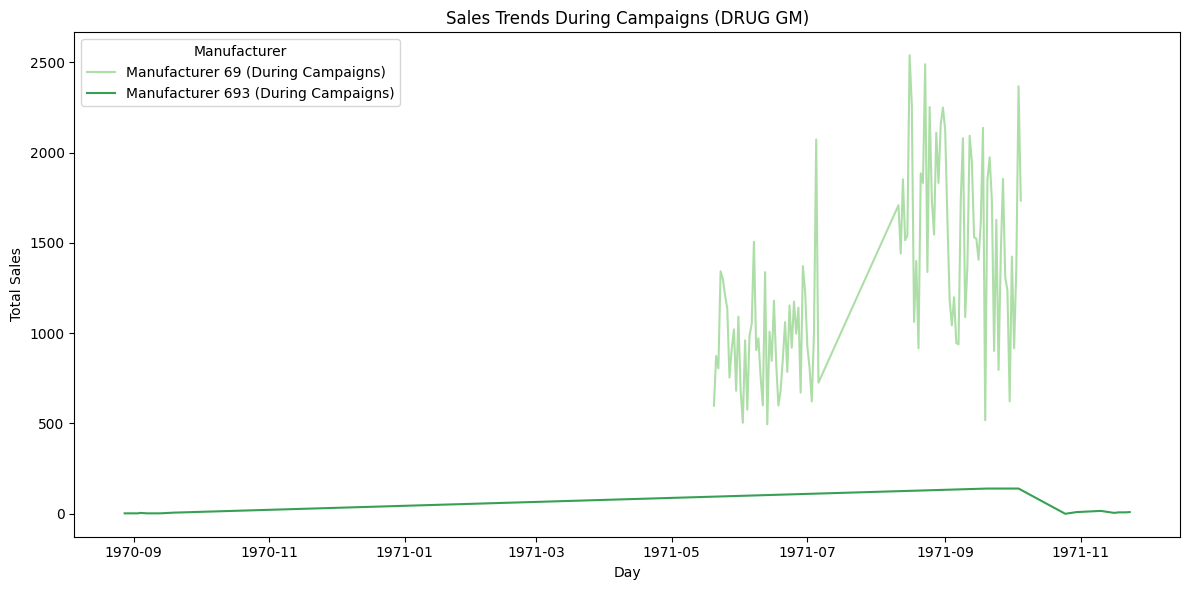

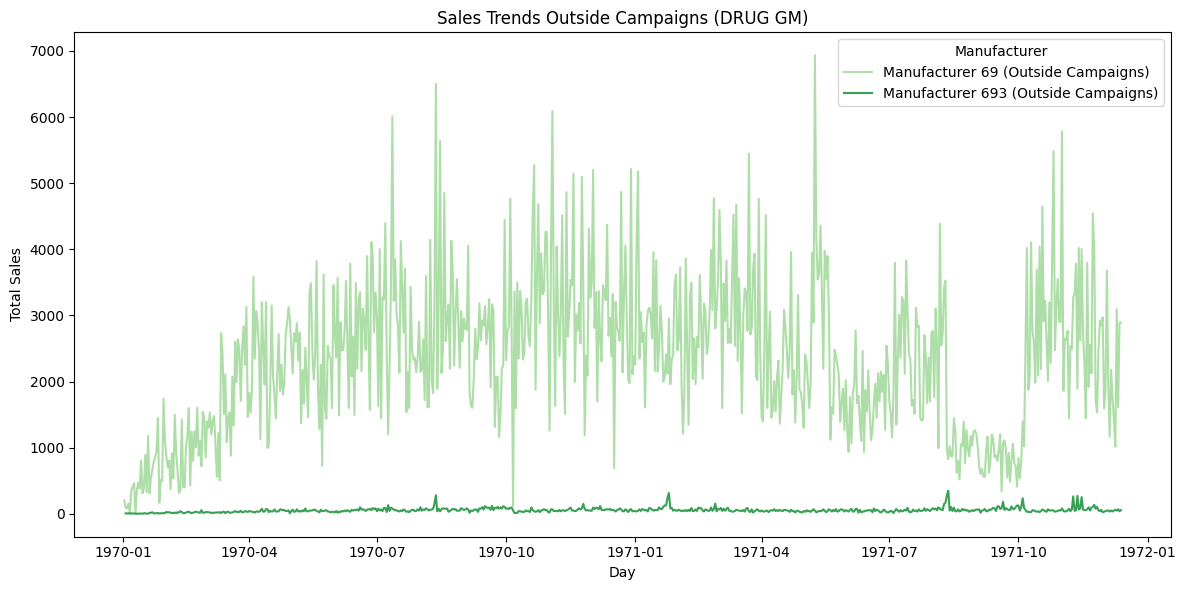

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use green color palette
green_palette = sns.color_palette("Greens", len(selected_manufacturers))

# Line Plot: Sales During Campaigns
plt.figure(figsize=(12, 6))
for i, manu in enumerate(selected_manufacturers):
    manu_data = sales_during_campaigns[sales_during_campaigns["MANUFACTURER"] == manu]
    plt.plot(manu_data["DAY"], manu_data["TOTAL_SALES"], label=f"Manufacturer {manu} (During Campaigns)", color=green_palette[i])

plt.title("Sales Trends During Campaigns (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# Line Plot: Sales Outside Campaigns
plt.figure(figsize=(12, 6))
for i, manu in enumerate(selected_manufacturers):
    manu_data = sales_outside_campaigns[sales_outside_campaigns["MANUFACTURER"] == manu]
    plt.plot(manu_data["DAY"], manu_data["TOTAL_SALES"], label=f"Manufacturer {manu} (Outside Campaigns)", color=green_palette[i])

plt.title("Sales Trends Outside Campaigns (DRUG GM)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()



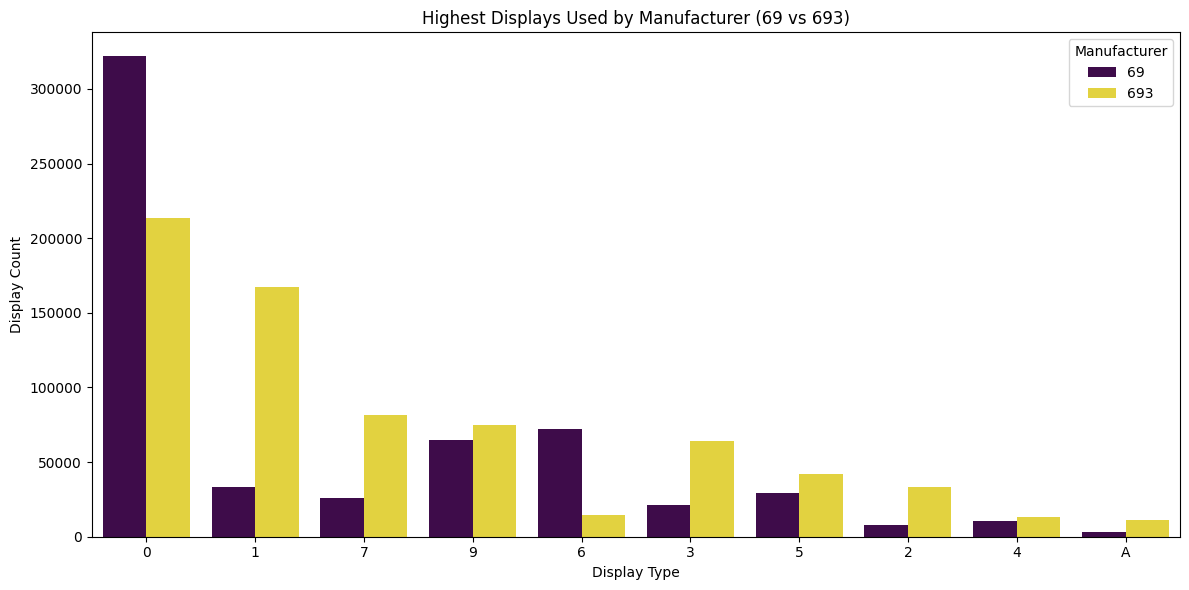

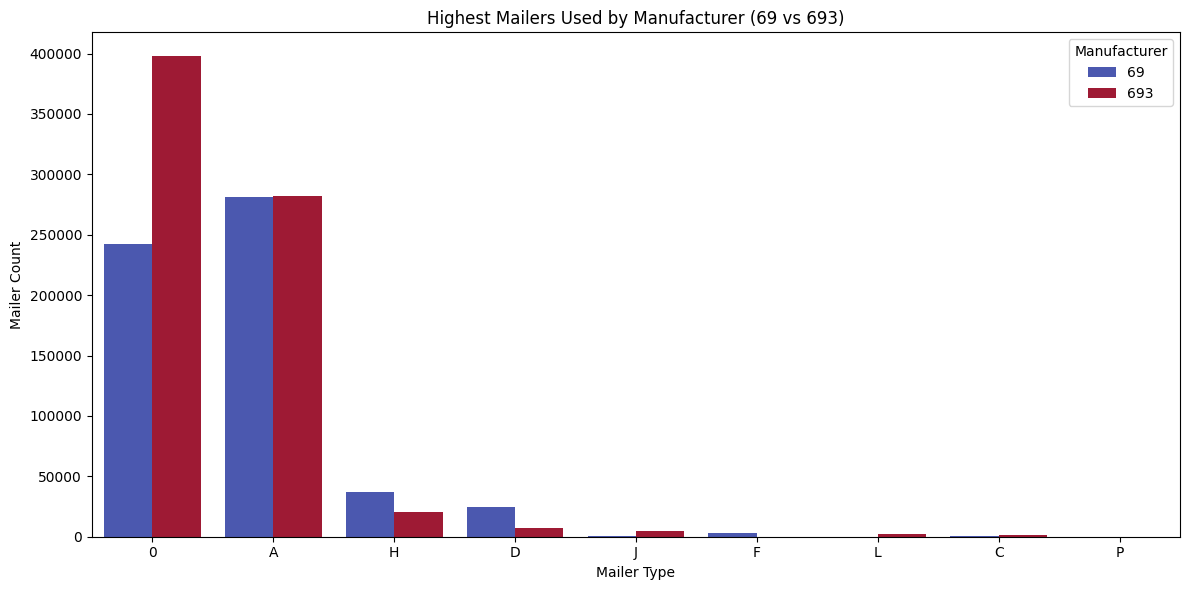


Display Analysis:
    MANUFACTURER DISPLAY  DISPLAY_COUNT
0             69       0         321856
10           693       0         213244
11           693       1         167148
17           693       7          81466
18           693       9          74567
6             69       6          71857
8             69       9          64781
13           693       3          64428
15           693       5          41724
12           693       2          33397
1             69       1          33288
5             69       5          29334
7             69       7          25716
3             69       3          21233
16           693       6          14639
14           693       4          13504
19           693       A          11080
4             69       4          10547
2             69       2           7521
9             69       A           3211

Mailer Analysis:
    MANUFACTURER MAILER  MAILER_COUNT
8            693      0        397690
9            693      A        282094
1        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
causal_data = pd.read_csv("causal_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [causal_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter product data for DRUG GM department and selected manufacturers
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Step 2: Merge causal data with filtered products
filtered_causal = causal_data.merge(filtered_products, on="PRODUCT_ID", how="inner")

# Step 3: Analyze displays used by manufacturers
display_analysis = filtered_causal.groupby(["MANUFACTURER", "DISPLAY"]).size().reset_index(name="DISPLAY_COUNT")

# Step 4: Analyze mailers used by manufacturers
mailer_analysis = filtered_causal.groupby(["MANUFACTURER", "MAILER"]).size().reset_index(name="MAILER_COUNT")

# --- Visualizations ---

# Bar Plot: Highest Displays Used
plt.figure(figsize=(12, 6))
sns.barplot(
    data=display_analysis.sort_values("DISPLAY_COUNT", ascending=False),
    x="DISPLAY", y="DISPLAY_COUNT", hue="MANUFACTURER", palette="viridis"
)
plt.title("Highest Displays Used by Manufacturer (69 vs 693)")
plt.xlabel("Display Type")
plt.ylabel("Display Count")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# Bar Plot: Highest Mailers Used
plt.figure(figsize=(12, 6))
sns.barplot(
    data=mailer_analysis.sort_values("MAILER_COUNT", ascending=False),
    x="MAILER", y="MAILER_COUNT", hue="MANUFACTURER", palette="coolwarm"
)
plt.title("Highest Mailers Used by Manufacturer (69 vs 693)")
plt.xlabel("Mailer Type")
plt.ylabel("Mailer Count")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# --- Descriptive Outputs ---
print("\nDisplay Analysis:")
print(display_analysis.sort_values("DISPLAY_COUNT", ascending=False))

print("\nMailer Analysis:")
print(mailer_analysis.sort_values("MAILER_COUNT", ascending=False))


In [ ]:
import pandas as pd

# Load datasets
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [causal_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter product data for DRUG GM department and selected manufacturers
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Step 2: Filter transaction data for filtered products
transactions_filtered = transaction_data[transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])]

# Step 3: Filter causal data for filtered products
causal_filtered = causal_data[causal_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])]

In [ ]:
# Save filtered datasets as CSV files
filtered_products.to_csv("filtered_products.csv", index=False)
transactions_filtered.to_csv("transactions_filtered.csv", index=False)
causal_filtered.to_csv("causal_filtered.csv", index=False)

print("Filtered datasets have been saved:")
print("- filtered_products.csv")
print("- transactions_filtered.csv")
print("- causal_filtered.csv")


Filtered datasets have been saved:
- filtered_products.csv
- transactions_filtered.csv
- causal_filtered.csv


In [ ]:
import pandas as pd

# Define paths for filtered CSVs
transactions_file = "transactions_filtered.csv"
causal_file = "causal_filtered.csv"
output_file = "transactions_with_causal.csv"

# Create an empty DataFrame to store the merged results
merged_results = pd.DataFrame()

# Process `causal_filtered` in memory (assumes it's relatively small)
causal_filtered = pd.read_csv(causal_file)

# Process `transactions_filtered` in chunks
chunksize = 1000  # Adjust this value based on your system's capacity
for chunk in pd.read_csv(transactions_file, chunksize=chunksize):
    # Merge each chunk with the `causal_filtered` data
    chunk_merged = chunk.merge(
        causal_filtered[["PRODUCT_ID", "DISPLAY", "MAILER"]],
        on="PRODUCT_ID",
        how="inner"
    )
    # Append the merged chunk to the results
    merged_results = pd.concat([merged_results, chunk_merged], ignore_index=True)

# Save the final merged DataFrame to a CSV file
merged_results.to_csv(output_file, index=False)

print(f"Merged dataset saved as '{output_file}'")


In [ ]:
# Step 4: Merge filtered transaction and causal data
transactions_with_causal = transactions_filtered.merge(
    causal_filtered[["PRODUCT_ID", "DISPLAY", "MAILER"]],
    on="PRODUCT_ID",
    how="inner"
)


NameError: name 'transactions_filtered' is not defined

In [ ]:
# Step 5: Merge manufacturer data for analysis
transactions_with_causal = transactions_with_causal.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

In [ ]:





# Calculate sales contribution by display type
sales_by_display = transactions_with_causal.groupby(["MANUFACTURER", "DISPLAY"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

sales_by_display["CONTRIBUTION"] = sales_by_display.groupby("MANUFACTURER")["TOTAL_SALES"].transform(
    lambda x: (x / x.sum()) * 100
)

# Calculate sales contribution by mailer type
sales_by_mailer = transactions_with_causal.groupby(["MANUFACTURER", "MAILER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

sales_by_mailer["CONTRIBUTION"] = sales_by_mailer.groupby("MANUFACTURER")["TOTAL_SALES"].transform(
    lambda x: (x / x.sum()) * 100
)

# Save results to CSV or print
sales_by_display.to_csv("filtered_sales_by_display.csv", index=False)
sales_by_mailer.to_csv("filtered_sales_by_mailer.csv", index=False)

# Display the results
print("Sales Contribution by Display Type:")
print(sales_by_display)

print("\nSales Contribution by Mailer Type:")
print(sales_by_mailer)


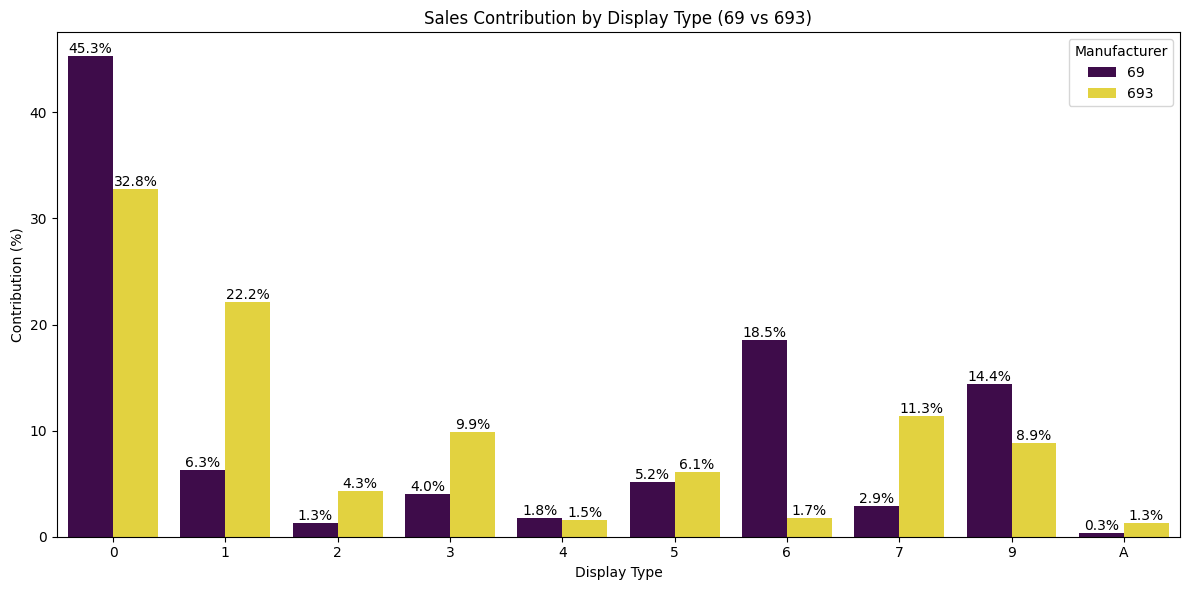

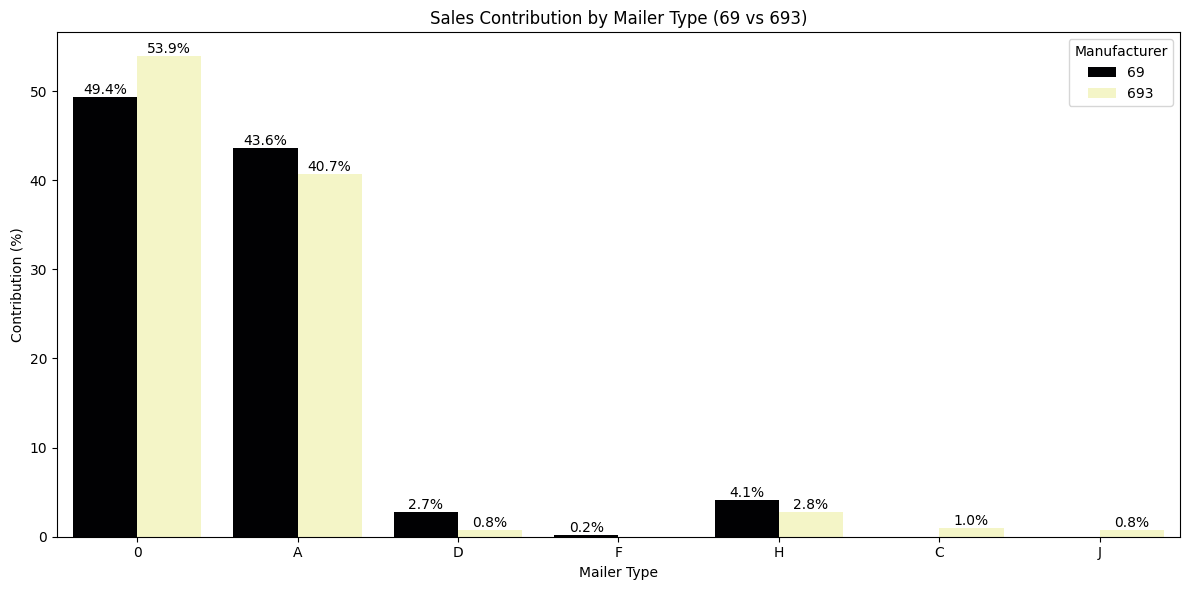

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Previous code up to saving results is included here...

# --- Visualizations with Data Labels ---

# Visualization 1: Sales Contribution by Display Type
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=sales_by_display,
    x="DISPLAY",
    y="CONTRIBUTION",
    hue="MANUFACTURER",
    palette="viridis"
)
plt.title("Sales Contribution by Display Type (69 vs 693)")
plt.xlabel("Display Type")
plt.ylabel("Contribution (%)")
plt.legend(title="Manufacturer")
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

plt.savefig("sales_contribution_by_display.png")
plt.show()

# Visualization 2: Sales Contribution by Mailer Type
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=sales_by_mailer,
    x="MAILER",
    y="CONTRIBUTION",
    hue="MANUFACTURER",
    palette="magma"
)
plt.title("Sales Contribution by Mailer Type (69 vs 693)")
plt.xlabel("Mailer Type")
plt.ylabel("Contribution (%)")
plt.legend(title="Manufacturer")
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10)

plt.savefig("sales_contribution_by_mailer.png")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Combine sales data with display and mailer data
merged_data = transactions_with_causal.copy()

# One-hot encode DISPLAY and MAILER types
merged_data = pd.get_dummies(merged_data, columns=["DISPLAY", "MAILER"], drop_first=True)

# Filter for Manufacturer 69
manufacturer_69_data = merged_data[merged_data["MANUFACTURER"] == 69]

# Define features and target
X = manufacturer_69_data.drop(columns=["SALES_VALUE", "MANUFACTURER", "PRODUCT_ID"])
y = manufacturer_69_data["SALES_VALUE"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# --- Simulate Future Sales ---
# Adjust DISPLAY_1 and DISPLAY_7 contributions to match 693
X_simulated = X_test.copy()
X_simulated["DISPLAY_1"] = manufacturer_69_data["DISPLAY_1"].mean() * 1.5  # Increase contribution by 50%
X_simulated["DISPLAY_7"] = manufacturer_69_data["DISPLAY_7"].mean() * 2    # Double the contribution

# Predict hypothetical sales
y_simulated = rf_model.predict(X_simulated)

print("\nAverage Predicted Sales (Original):", np.mean(y_test))
print("Average Predicted Sales (Simulated):", np.mean(y_simulated))
print("Sales Increase:", np.mean(y_simulated) - np.mean(y_test))


KeyError: "None of [Index(['DISPLAY', 'MAILER'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd

# Load datasets
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [causal_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter product data for DRUG GM department and selected manufacturers
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Step 2: Filter transaction data for filtered products
transactions_filtered = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Filter causal data for filtered products
causal_filtered = causal_data[
    causal_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 4: Merge filtered transaction and causal data using PRODUCT_ID, STORE_ID, and WEEK_NO
transactions_with_causal = transactions_filtered.merge(
    causal_filtered[["PRODUCT_ID", "STORE_ID", "WEEK_NO", "DISPLAY", "MAILER"]],
    on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"],
    how="inner"
)

# Step 5: Merge manufacturer data for analysis
transactions_with_causal = transactions_with_causal.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Calculate sales contribution by display type
sales_by_display = transactions_with_causal.groupby(["MANUFACTURER", "DISPLAY"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

sales_by_display["CONTRIBUTION"] = sales_by_display.groupby("MANUFACTURER")["TOTAL_SALES"].transform(
    lambda x: (x / x.sum()) * 100
)

# Calculate sales contribution by mailer type
sales_by_mailer = transactions_with_causal.groupby(["MANUFACTURER", "MAILER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

sales_by_mailer["CONTRIBUTION"] = sales_by_mailer.groupby("MANUFACTURER")["TOTAL_SALES"].transform(
    lambda x: (x / x.sum()) * 100
)

# Save results to CSV or print
sales_by_display.to_csv("filtered_sales_by_display.csv", index=False)
sales_by_mailer.to_csv("filtered_sales_by_mailer.csv", index=False)

# Display the results
print("Sales Contribution by Display Type:")
print(sales_by_display)

print("\nSales Contribution by Mailer Type:")
print(sales_by_mailer)


Sales Contribution by Display Type:
    MANUFACTURER DISPLAY  TOTAL_SALES  CONTRIBUTION
0             69       0      4029.24     52.115338
1             69       1       764.72      9.891106
2             69       2       100.84      1.304293
3             69       3       373.25      4.827722
4             69       4       179.78      2.325326
5             69       5       440.14      5.692896
6             69       6       832.36     10.765981
7             69       7       310.90      4.021269
8             69       9       676.72      8.752889
9             69       A        23.44      0.303180
10           693       0      3703.79     25.195885
11           693       1      4185.61     28.473576
12           693       2       966.85      6.577220
13           693       3      1128.48      7.676745
14           693       4       299.41      2.036805
15           693       5       964.69      6.562526
16           693       6       245.24      1.668302
17           693       7    

In [ ]:
import pandas as pd

# Load datasets
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [causal_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter product data for DRUG GM department and selected manufacturers
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Step 2: Filter transaction data for filtered products
transactions_filtered = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Filter causal data for filtered products
causal_filtered = causal_data[
    causal_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 4: Merge filtered transaction and causal data using PRODUCT_ID, STORE_ID, and WEEK_NO
transactions_with_causal = transactions_filtered.merge(
    causal_filtered[["PRODUCT_ID", "STORE_ID", "WEEK_NO", "DISPLAY", "MAILER"]],
    on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"],
    how="inner"
)

# Step 5: Merge manufacturer data for analysis
transactions_with_causal = transactions_with_causal.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Calculate sales contribution by display type
sales_by_display = transactions_with_causal.groupby(["MANUFACTURER", "DISPLAY"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

sales_by_display["CONTRIBUTION"] = sales_by_display.groupby("MANUFACTURER")["TOTAL_SALES"].transform(
    lambda x: (x / x.sum()) * 100
)

# Calculate sales contribution by mailer type
sales_by_mailer = transactions_with_causal.groupby(["MANUFACTURER", "MAILER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

sales_by_mailer["CONTRIBUTION"] = sales_by_mailer.groupby("MANUFACTURER")["TOTAL_SALES"].transform(
    lambda x: (x / x.sum()) * 100
)

# Save results to CSV or print
sales_by_display.to_csv("filtered_sales_by_display.csv", index=False)
sales_by_mailer.to_csv("filtered_sales_by_mailer.csv", index=False)

# Display the results
print("Sales Contribution by Display Type:")
print(sales_by_display)

print("\nSales Contribution by Mailer Type:")
print(sales_by_mailer)


Sales Contribution by Display Type:
    MANUFACTURER DISPLAY  TOTAL_SALES  CONTRIBUTION
0             69       0      4029.24     52.115338
1             69       1       764.72      9.891106
2             69       2       100.84      1.304293
3             69       3       373.25      4.827722
4             69       4       179.78      2.325326
5             69       5       440.14      5.692896
6             69       6       832.36     10.765981
7             69       7       310.90      4.021269
8             69       9       676.72      8.752889
9             69       A        23.44      0.303180
10           693       0      3703.79     25.195885
11           693       1      4185.61     28.473576
12           693       2       966.85      6.577220
13           693       3      1128.48      7.676745
14           693       4       299.41      2.036805
15           693       5       964.69      6.562526
16           693       6       245.24      1.668302
17           693       7    

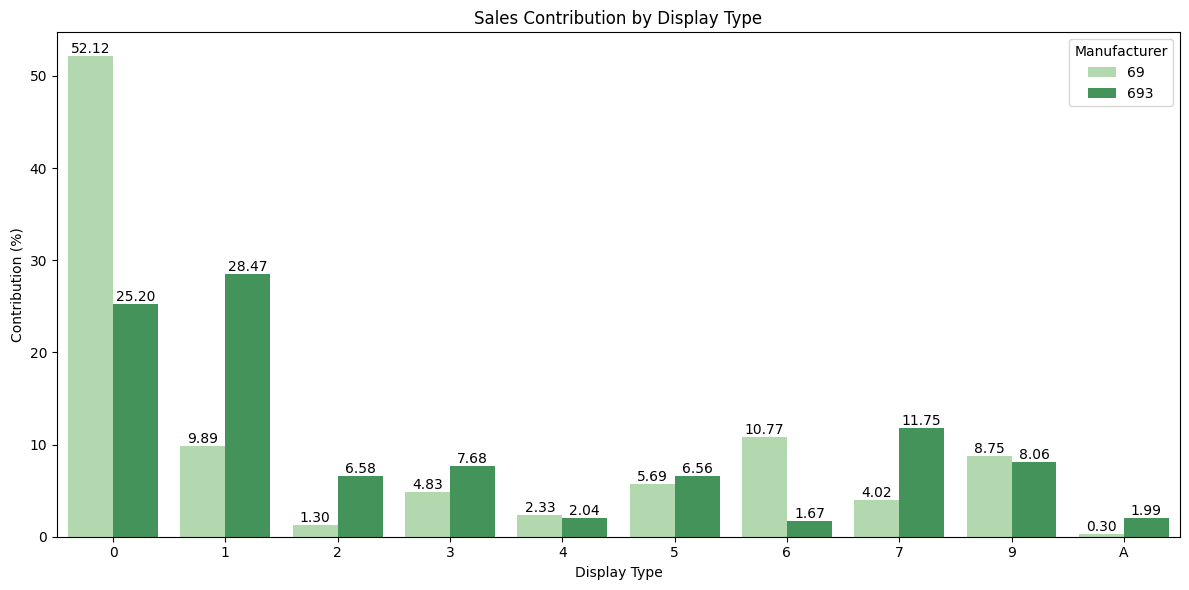

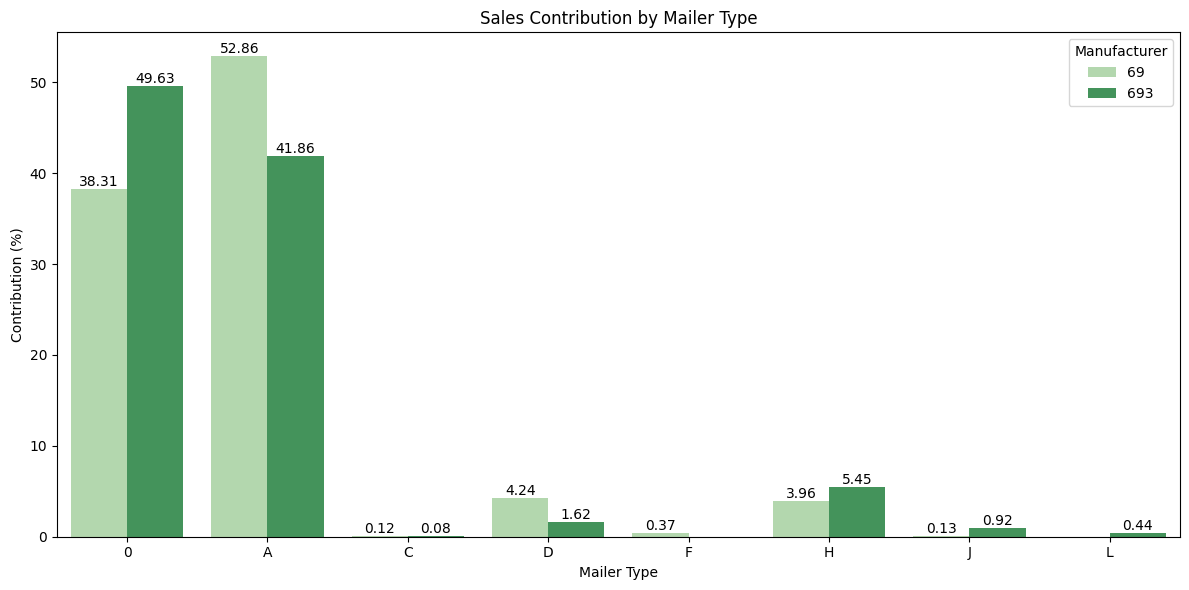

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved results
sales_by_display = pd.read_csv("filtered_sales_by_display.csv")
sales_by_mailer = pd.read_csv("filtered_sales_by_mailer.csv")

# --- Visualization for Sales Contribution by Display Type ---

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_display,
    x="DISPLAY",
    y="CONTRIBUTION",
    hue="MANUFACTURER",
    palette=sns.color_palette("Greens", n_colors=2)
)

plt.title("Sales Contribution by Display Type")
plt.xlabel("Display Type")
plt.ylabel("Contribution (%)")
plt.legend(title="Manufacturer", loc="upper right")
plt.tight_layout()

# Add data labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.2f", label_type="edge")

plt.show()

# --- Visualization for Sales Contribution by Mailer Type ---

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_mailer,
    x="MAILER",
    y="CONTRIBUTION",
    hue="MANUFACTURER",
    palette=sns.color_palette("Greens", n_colors=2)
)

plt.title("Sales Contribution by Mailer Type")
plt.xlabel("Mailer Type")
plt.ylabel("Contribution (%)")
plt.legend(title="Manufacturer", loc="upper right")
plt.tight_layout()

# Add data labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.2f", label_type="edge")

plt.show()


Mean Squared Error: 2.889371957660408
R-squared: 0.2068746754975721

Feature Importance:
        Feature  Coefficient
3      MAILER_H     0.219931
4      MAILER_A     0.149774
5  LAGGED_SALES     0.086537
7       WEEK_NO     0.001146
6  MANUFACTURER    -0.003663
2     DISPLAY_7    -0.181971
0     DISPLAY_1    -0.231177
1     DISPLAY_6    -0.318424


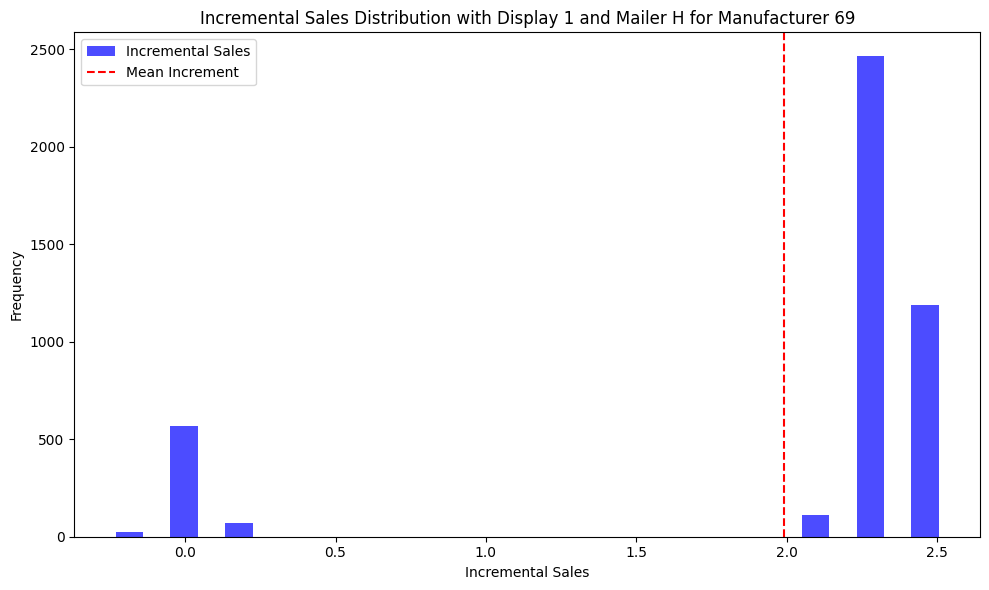

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [causal_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter product data for DRUG GM department and selected manufacturers
selected_manufacturers = [69, 693]
filtered_products = product_data[
    (product_data["MANUFACTURER"].isin(selected_manufacturers)) &
    (product_data["DEPARTMENT"] == "DRUG GM")
]

# Step 2: Filter transaction data for filtered products
transactions_filtered = transaction_data[
    transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 3: Filter causal data for filtered products
causal_filtered = causal_data[
    causal_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])
]

# Step 4: Merge filtered transaction and causal data using PRODUCT_ID, STORE_ID, and WEEK_NO
transactions_with_causal = transactions_filtered.merge(
    causal_filtered[["PRODUCT_ID", "STORE_ID", "WEEK_NO", "DISPLAY", "MAILER"]],
    on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"],
    how="inner"
)

# Step 5: Merge manufacturer data for analysis
transactions_with_causal = transactions_with_causal.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Ensure no missing values for regression
transactions_with_causal = transactions_with_causal.dropna()

# Step 6: Create dummy variables for DISPLAY and MAILER types
transactions_with_causal = pd.get_dummies(
    transactions_with_causal,
    columns=["DISPLAY", "MAILER"],
    prefix=["DISPLAY", "MAILER"]
)

# Step 7: Define features and target variable
# Features: Display type, Mailer type, Lagged Sales, and Manufacturer
transactions_with_causal["LAGGED_SALES"] = transactions_with_causal.groupby("STORE_ID")["SALES_VALUE"].shift(1).fillna(0)

features = [
    "DISPLAY_1", "DISPLAY_6", "DISPLAY_7", "MAILER_H", "MAILER_A",
    "LAGGED_SALES", "MANUFACTURER", "WEEK_NO"
]
target = "SALES_VALUE"

# Filter only valid rows for regression
transactions_with_causal = transactions_with_causal.dropna(subset=features)

X = transactions_with_causal[features]
y = transactions_with_causal[target]

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 9: Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:")
print(coefficients)

# Step 11: Simulate the impact of adopting Display Type 1 and Mailer H for Manufacturer 69
X_test_simulation = X_test.copy()
X_test_simulation["DISPLAY_1"] = 1
X_test_simulation["MAILER_H"] = 1
X_test_simulation["MANUFACTURER"] = 69

# Predict incremental sales
y_pred_simulation = model.predict(X_test_simulation)
incremental_sales = y_pred_simulation - y_pred

# Save results to CSV
simulation_results = pd.DataFrame({
    "Actual Sales": y_test,
    "Predicted Sales": y_pred,
    "Predicted Sales with Simulation": y_pred_simulation,
    "Incremental Sales": incremental_sales
})
simulation_results.to_csv("incremental_sales_simulation.csv", index=False)

# Step 12: Visualize incremental sales
plt.figure(figsize=(10, 6))
plt.hist(incremental_sales, bins=30, alpha=0.7, color="blue", label="Incremental Sales")
plt.axvline(np.mean(incremental_sales), color="red", linestyle="--", label="Mean Increment")
plt.title("Incremental Sales Distribution with Display 1 and Mailer H for Manufacturer 69")
plt.xlabel("Incremental Sales")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Mean Squared Error: 92.01
R-squared: 0.76

Feature Importance:
      Feature  Importance
4   DISPLAY_5    0.102709
14   MAILER_J    0.101427
7   DISPLAY_9    0.089773
1   DISPLAY_2    0.088068
2   DISPLAY_3    0.086844
8   DISPLAY_A    0.082403
3   DISPLAY_4    0.067794
11   MAILER_D    0.067375
9    MAILER_A    0.065977
6   DISPLAY_7    0.063075
5   DISPLAY_6    0.060121
10   MAILER_C    0.045086
12   MAILER_F    0.043510
0   DISPLAY_1    0.035838
13   MAILER_H    0.000000
15   MAILER_L    0.000000


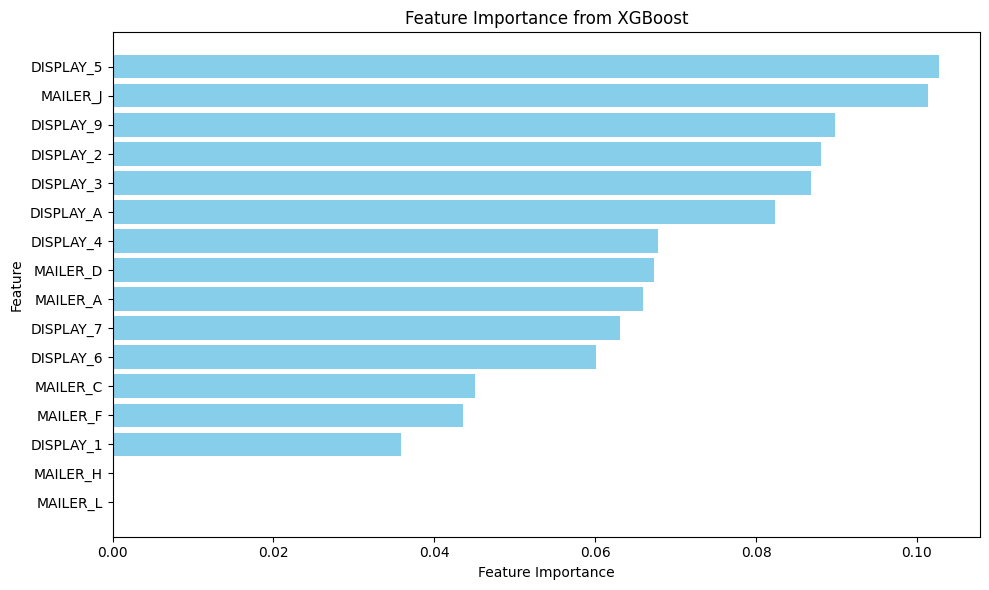

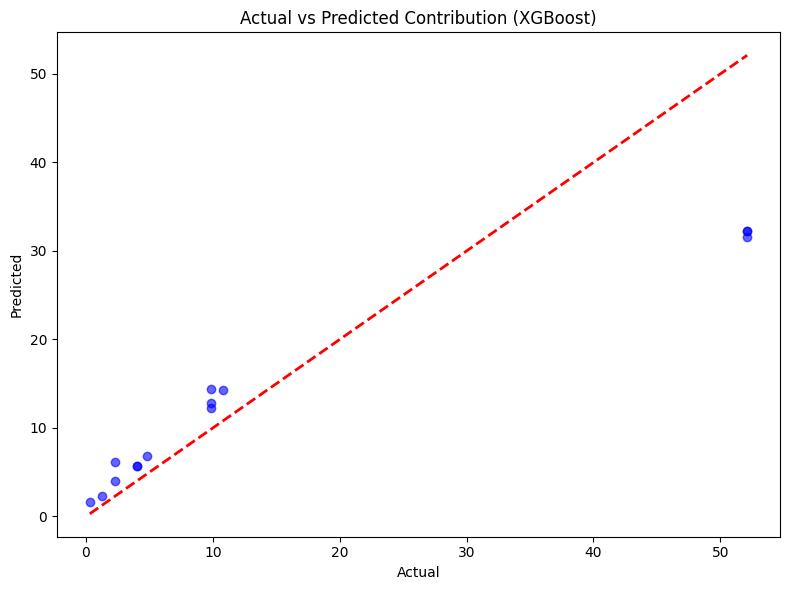

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Load processed datasets
sales_by_display = pd.read_csv("filtered_sales_by_display.csv")
sales_by_mailer = pd.read_csv("filtered_sales_by_mailer.csv")

# Combine datasets to create features
# Merge on Manufacturer to align sales by display and mailer
combined_sales = sales_by_display.merge(
    sales_by_mailer,
    on="MANUFACTURER",
    suffixes=("_DISPLAY", "_MAILER")
)

# Drop unnecessary columns
combined_sales = combined_sales.drop(columns=["TOTAL_SALES_DISPLAY", "TOTAL_SALES_MAILER"])

# One-hot encode display and mailer types
combined_sales = pd.get_dummies(combined_sales, columns=["DISPLAY", "MAILER"], drop_first=True)

# Separate Manufacturer 69 data for training
data_69 = combined_sales[combined_sales["MANUFACTURER"] == 69]

# Features and target
X = data_69.drop(columns=["CONTRIBUTION_DISPLAY", "CONTRIBUTION_MAILER", "MANUFACTURER"])
y = data_69["CONTRIBUTION_DISPLAY"]  # Assuming we're predicting the contribution from displays

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importance = xgb_regressor.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importance}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Contribution (XGBoost)")
plt.tight_layout()
plt.show()


Mean Squared Error: 11.459888403595473
R-squared: 0.0443554399644408


<ipython-input-10-a6474ddd864a>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x="Importance", y="Feature", palette="Blues_r")


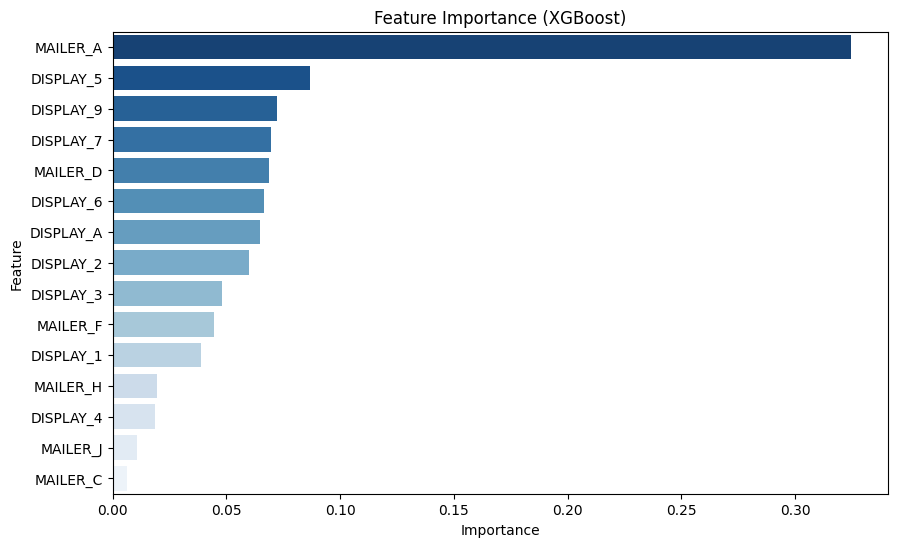

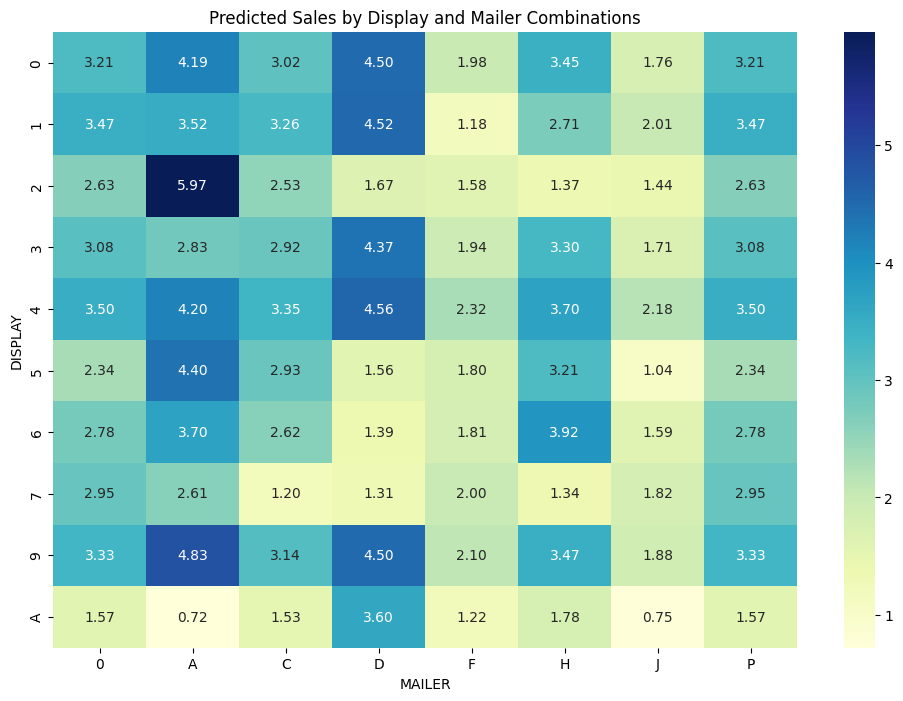

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
causal_data = pd.read_csv("causal_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names
for df in [causal_data, transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Filter data for Manufacturer 69
filtered_products = product_data[(product_data["MANUFACTURER"] == 69) & (product_data["DEPARTMENT"] == "DRUG GM")]
transactions_filtered = transaction_data[transaction_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])]
causal_filtered = causal_data[causal_data["PRODUCT_ID"].isin(filtered_products["PRODUCT_ID"])]

# Merge transaction and causal data
transactions_with_causal = transactions_filtered.merge(
    causal_filtered[["PRODUCT_ID", "STORE_ID", "WEEK_NO", "DISPLAY", "MAILER"]],
    on=["PRODUCT_ID", "STORE_ID", "WEEK_NO"],
    how="inner"
)

# Merge manufacturer data
transactions_with_causal = transactions_with_causal.merge(
    filtered_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Encode categorical variables
transactions_with_causal = pd.get_dummies(transactions_with_causal, columns=["DISPLAY", "MAILER"], drop_first=True)

# Feature engineering
transactions_with_causal["LAGGED_SALES"] = transactions_with_causal.groupby("STORE_ID")["SALES_VALUE"].shift(1).fillna(0)
# Select features and target (excluding RETAIL_DISC and WEEK_NO)
features = [col for col in transactions_with_causal.columns if col not in ["SALES_VALUE", "PRODUCT_ID", "STORE_ID", "MANUFACTURER", "RETAIL_DISC", "WEEK_NO", "QUANTITY", "DAY", "TRANS_TIME", "BASKET_ID", "LAGGED_SALES", "HOUSEHOLD_KEY", "COUPON_DISC", "COUPON_MATCH_DISC"]]
X = transactions_with_causal[features]
y = transactions_with_causal["SALES_VALUE"]



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x="Importance", y="Feature", palette="Blues_r")
plt.title("Feature Importance (XGBoost)")
plt.show()

# Predict for all combinations of display and mailer types
unique_displays = causal_filtered["DISPLAY"].unique()
unique_mailers = causal_filtered["MAILER"].unique()
combinations = pd.DataFrame([(d, m) for d in unique_displays for m in unique_mailers], columns=["DISPLAY", "MAILER"])

# Encode combinations, ensuring the same columns as in training data
comb_dummies = pd.get_dummies(combinations, columns=["DISPLAY", "MAILER"], drop_first=True)

# Ensure comb_dummies has the same features as the training data
# 1. Reindex comb_dummies to have the same columns as X_train
comb_dummies = comb_dummies.reindex(columns=X_train.columns, fill_value=0)

# Predict sales for combinations
predicted_sales = model.predict(comb_dummies)
combinations["PREDICTED_SALES"] = predicted_sales

# Visualize results
plt.figure(figsize=(12, 8))
sns.heatmap(combinations.pivot(index="DISPLAY", columns="MAILER", values="PREDICTED_SALES"), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Predicted Sales by Display and Mailer Combinations")
plt.show()


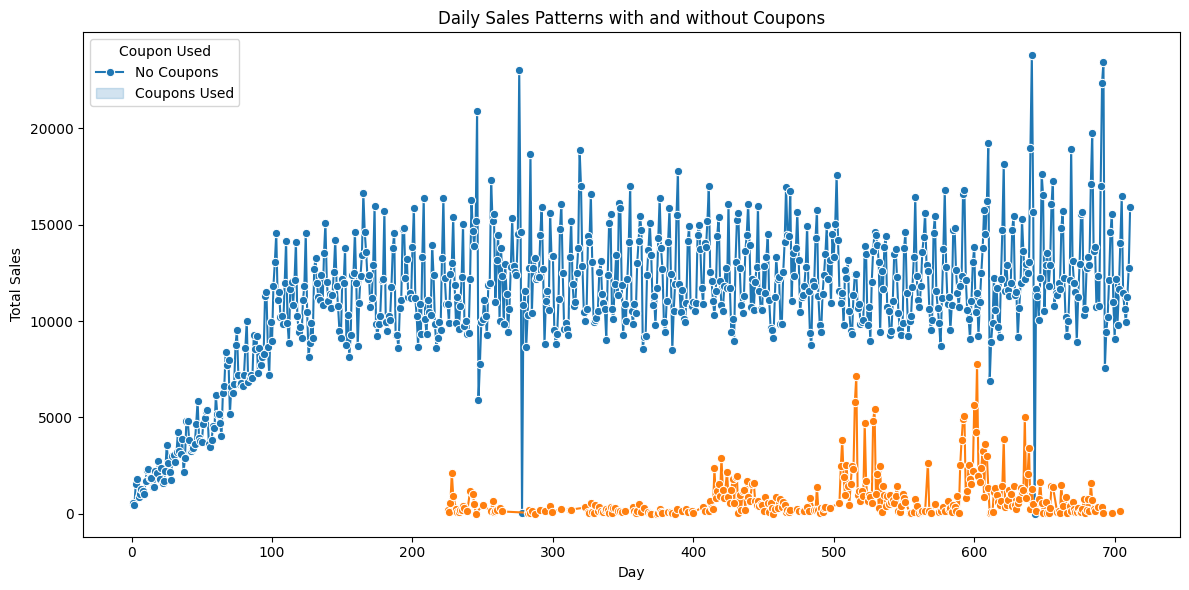

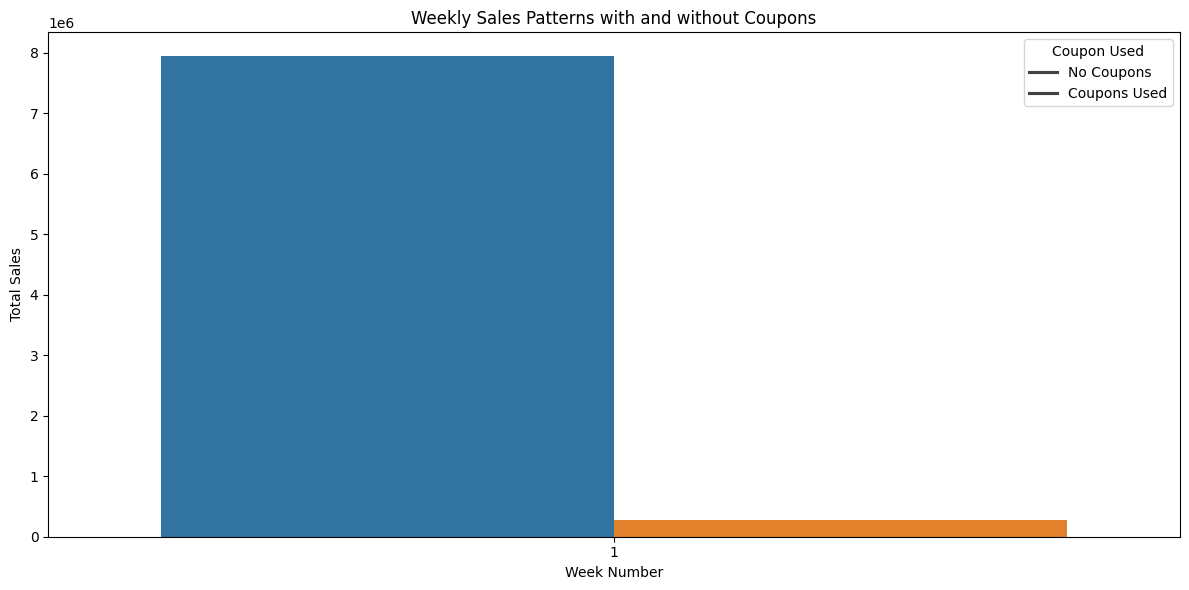

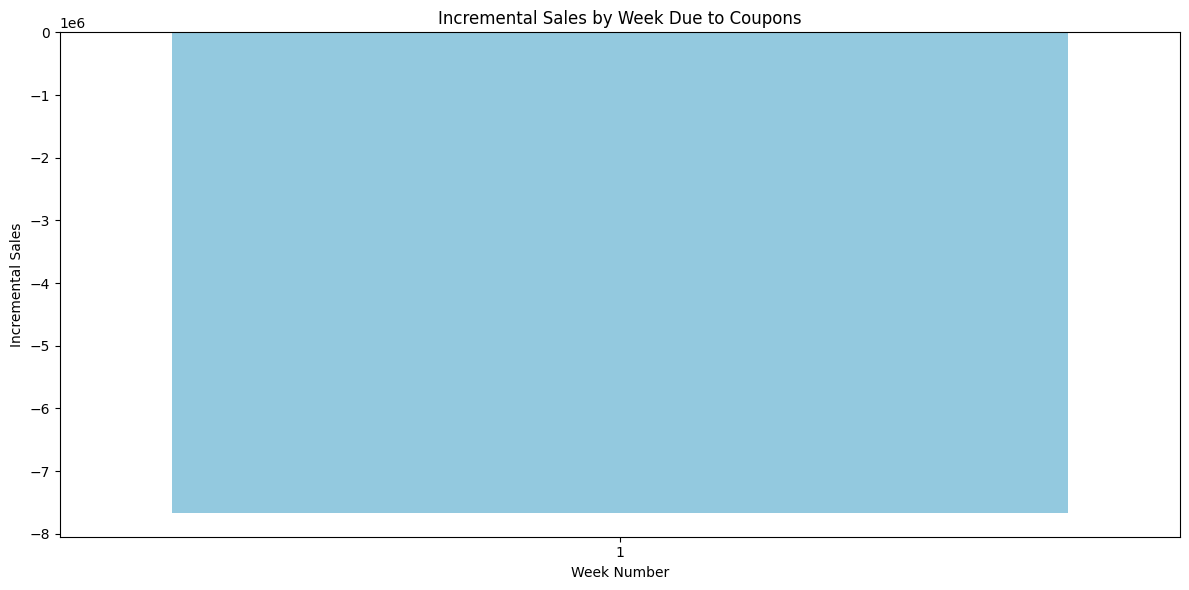

Top Weeks for Coupon Usage (Incremental Sales):
WEEK_NO
1   -7663912.29
Name: INCREMENTAL_SALES, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, campaign_desc]:
    df.columns = df.columns.str.upper()

# Merge transaction data with coupon redemption data
transactions_with_coupons = transaction_data.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

# Add a flag for transactions with coupons
transactions_with_coupons["COUPON_USED"] = transactions_with_coupons["COUPON_UPC"].notna()

# Aggregate sales by day and whether coupons were used
daily_sales = transactions_with_coupons.groupby(["DAY", "COUPON_USED"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    COUPON_COUNT=("COUPON_USED", "sum")  # Count of transactions with coupons
).reset_index()

# Analyze weekly sales patterns
transactions_with_coupons["WEEK_NO"] = pd.to_datetime(transactions_with_coupons["DAY"]).dt.isocalendar().week
weekly_sales = transactions_with_coupons.groupby(["WEEK_NO", "COUPON_USED"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    COUPON_COUNT=("COUPON_USED", "sum")
).reset_index()

# Visualize daily sales patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x="DAY", y="TOTAL_SALES", hue="COUPON_USED", marker="o")
plt.title("Daily Sales Patterns with and without Coupons")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Coupon Used", labels=["No Coupons", "Coupons Used"])
plt.tight_layout()
plt.show()

# Visualize weekly sales patterns
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x="WEEK_NO", y="TOTAL_SALES", hue="COUPON_USED")
plt.title("Weekly Sales Patterns with and without Coupons")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.legend(title="Coupon Used", labels=["No Coupons", "Coupons Used"])
plt.tight_layout()
plt.show()

# Analyze the incremental sales due to coupons
incremental_sales = weekly_sales.pivot(index="WEEK_NO", columns="COUPON_USED", values="TOTAL_SALES")
incremental_sales["INCREMENTAL_SALES"] = incremental_sales[True] - incremental_sales[False]

# Visualize incremental sales
plt.figure(figsize=(12, 6))
sns.barplot(x=incremental_sales.index, y=incremental_sales["INCREMENTAL_SALES"], color="skyblue")
plt.title("Incremental Sales by Week Due to Coupons")
plt.xlabel("Week Number")
plt.ylabel("Incremental Sales")
plt.tight_layout()
plt.show()

# Recommendations for optimal coupon timing
# Identify weeks with highest incremental sales
top_weeks = incremental_sales["INCREMENTAL_SALES"].nlargest(5)
print("Top Weeks for Coupon Usage (Incremental Sales):")
print(top_weeks)


In [ ]:
print(transactions_with_coupons['WEEK_NO'].unique())


<IntegerArray>
[1]
Length: 1, dtype: UInt32


In [ ]:
print(causal_filtered['WEEK_NO'].unique())
print(transactions_filtered['WEEK_NO'].unique())


[ 43  71  78  13  61  63  95  97  26  44  98   9  14  23  28  64  66  67
  68  75  76  83  84  86  88  89  91  93 101  24  25  27  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  45  70  65  15  16  17  19  20
  22  21  62  77  80  81  69  72  73  74  79  96  10  11  18  12  82  46
  85  87  47  48  57  58  59 100  49  50  99  92  51  52  53  54  55  90
  94  60  56]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  35  34  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102]


In [ ]:
import pandas as pd

# Assuming transactions_with_coupons is already created from your provided code
# Filter transactions without coupons
transactions_without_coupons = transactions_with_coupons[transactions_with_coupons["COUPON_USED"] == False]

# Save the result to a CSV (optional)
transactions_without_coupons.to_csv("transactions_without_coupons.csv", index=False)

# Display some rows to verify
print("Transactions Without Coupons:")
print(transactions_without_coupons.head())


Transactions Without Coupons:
   HOUSEHOLD_KEY    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  \
0       364        -0.60        1631        1          0.0                0.0   
1       364         0.00        1631        1          0.0                0.0   
2       364        -0.30        1631        1          0.0                0.0   
3       364         0.00        1631        1          0.0                0.0   
4       364        -0.39        1631        1          0.0                0.0   

   COUPON_UPC  COUPON_USED  
0         NaN  

In [ ]:
print("Total sales (with coupons):", transactions_with_coupons['SALES_VALUE'].sum())
print("Total sales (without coupons):", transactions_without_coupons['SALES_VALUE'].sum())


print("Days in dataset (coupons):", transactions_with_coupons['DAY'].nunique())
print("Days in dataset (no coupons):", transactions_without_coupons['DAY'].nunique())


Total sales (with coupons): 8209801.209999999
Total sales (without coupons): 7936856.750000003
Days in dataset (coupons): 711
Days in dataset (no coupons): 711


<ipython-input-13-d63693eb701a>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_coupons, x="COUPON_UPC", y="TOTAL_SALES", palette="viridis")


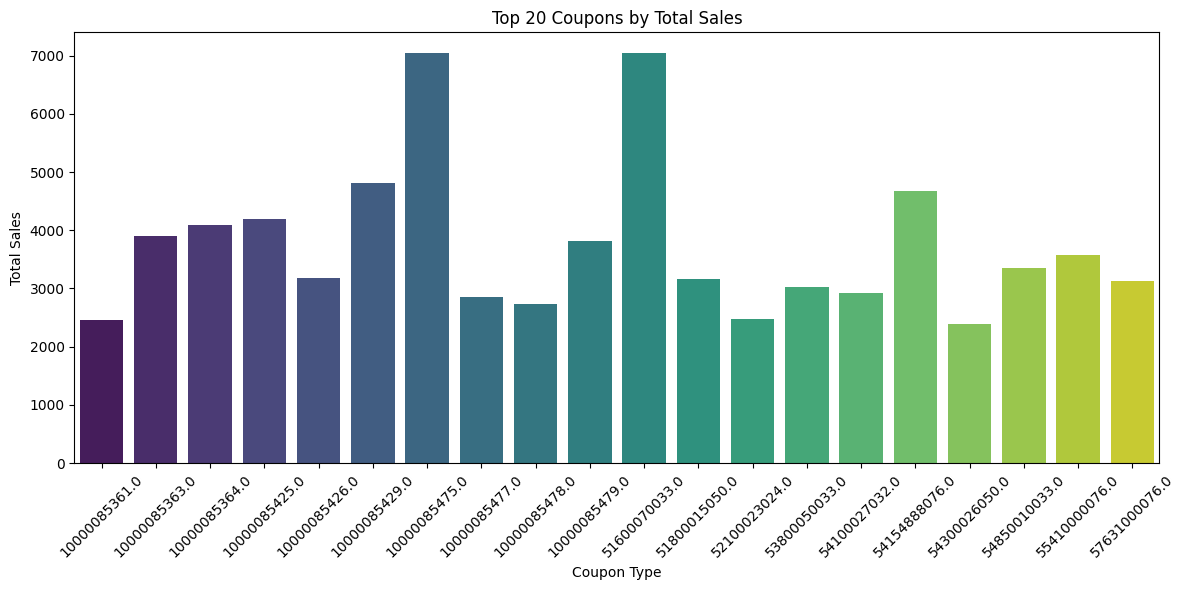

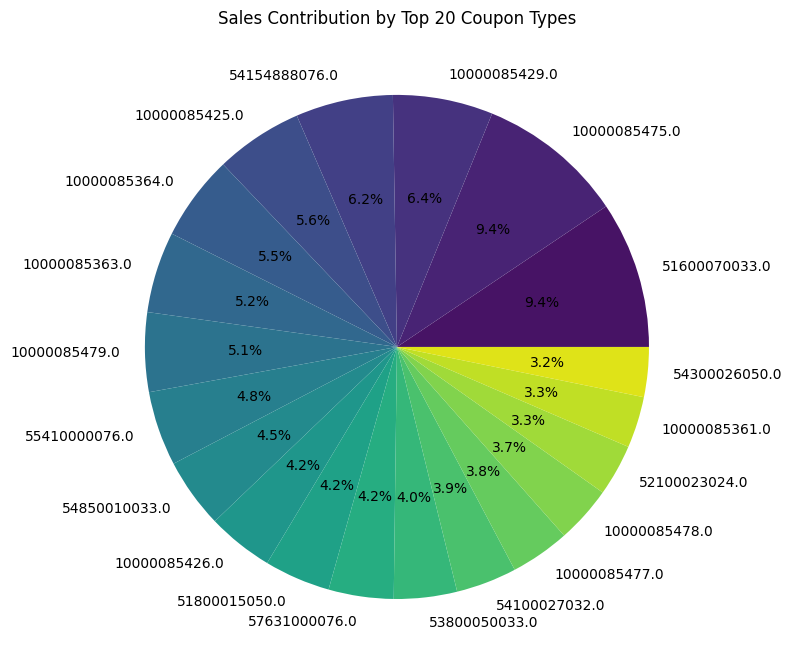

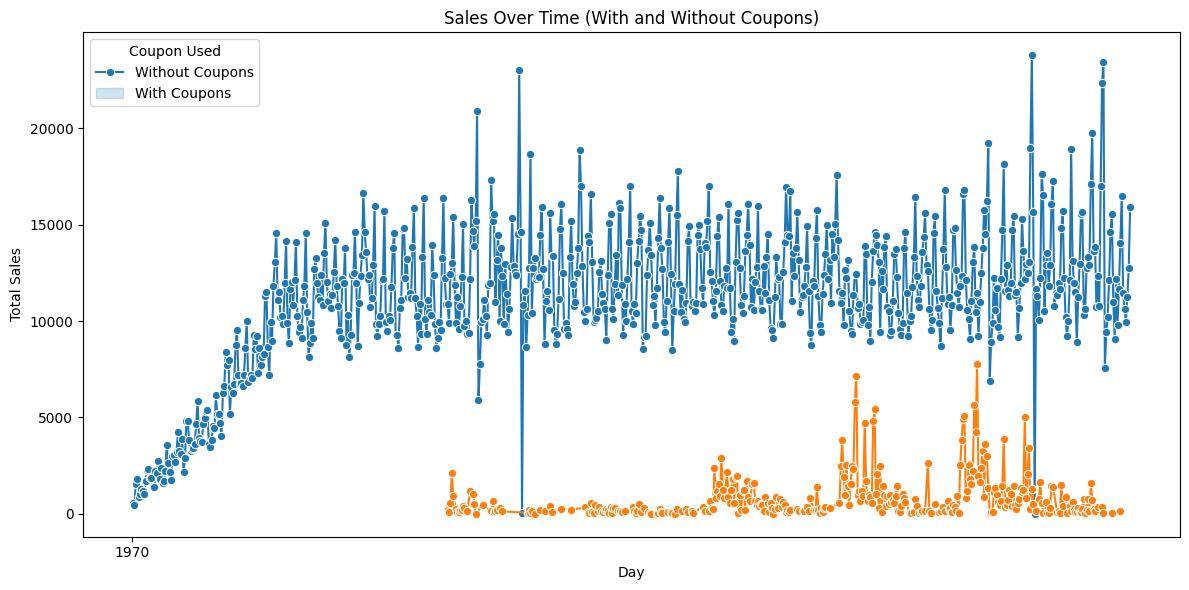

Descriptive Statistics by Coupon Type:
       COUPON_UPC  TOTAL_SALES  TRANSACTION_COUNT  AVERAGE_SALES  PERCENTAGE
0    1.000009e+10       137.86                 64       2.154063    0.050508
1    1.000009e+10      2462.20                909       2.708691    0.902088
2    1.000009e+10      3896.67               1405       2.773431    1.427642
3    1.000009e+10      4094.61               1372       2.984410    1.500162
4    1.000009e+10       551.30                213       2.588263    0.201982
..            ...          ...                ...            ...         ...
551  5.808786e+10       167.55                 54       3.102778    0.061386
552  5.830461e+10        38.32                 16       2.395000    0.014039
553  5.876848e+10       309.36                129       2.398140    0.113342
554  5.887021e+10        97.20                 22       4.418182    0.035612
555  5.897850e+10       299.28                109       2.745688    0.109649

[556 rows x 5 columns]
Descriptive S

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data]:
    df.columns = df.columns.str.upper()

# Merge transaction data with coupon redemption data
transactions_with_coupons = transaction_data.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

# Add a flag for transactions with coupons
transactions_with_coupons["COUPON_USED"] = transactions_with_coupons["COUPON_UPC"].notna()

# Aggregate sales by coupon type
sales_by_coupon = transactions_with_coupons.groupby("COUPON_UPC").agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
    AVERAGE_SALES=("SALES_VALUE", "mean")
).reset_index()

# Add percentage contribution
sales_by_coupon["PERCENTAGE"] = (
    sales_by_coupon["TOTAL_SALES"] / sales_by_coupon["TOTAL_SALES"].sum() * 100
)

# Filter top 20 coupons by total sales
top_20_coupons = sales_by_coupon.nlargest(20, "TOTAL_SALES")

# Visualizations

# Bar Chart: Total Sales by Coupon Type
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_coupons, x="COUPON_UPC", y="TOTAL_SALES", palette="viridis")
plt.title("Top 20 Coupons by Total Sales")
plt.xlabel("Coupon Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart: Contribution of Top 20 Coupon Types to Total Sales
plt.figure(figsize=(8, 8))
plt.pie(
    top_20_coupons["PERCENTAGE"],
    labels=top_20_coupons["COUPON_UPC"],
    autopct="%1.1f%%",
    colors=sns.color_palette("viridis", len(top_20_coupons))
)
plt.title("Sales Contribution by Top 20 Coupon Types")
plt.tight_layout()
plt.show()

# Time Series: Sales Over Time by Coupon Type
transactions_with_coupons["DAY"] = pd.to_datetime(transactions_with_coupons["DAY"])
sales_time_series = transactions_with_coupons.groupby(["DAY", "COUPON_USED"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_time_series, x="DAY", y="TOTAL_SALES", hue="COUPON_USED", marker="o")
plt.title("Sales Over Time (With and Without Coupons)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Coupon Used", labels=["Without Coupons", "With Coupons"])
plt.tight_layout()
plt.show()

# Descriptive Statistics for All Coupons
print("Descriptive Statistics by Coupon Type:")
print(sales_by_coupon)

# Descriptive Statistics for Top 20 Coupons
print("Descriptive Statistics for Top 20 Coupons:")
print(top_20_coupons)


Mean Squared Error (MSE): 3356.686607668254
R-squared (R²): 0.9940460850184061

Feature Coefficients:
             Feature  Coefficient
0  TRANSACTION_COUNT     2.839217
1      AVERAGE_SALES    35.724598


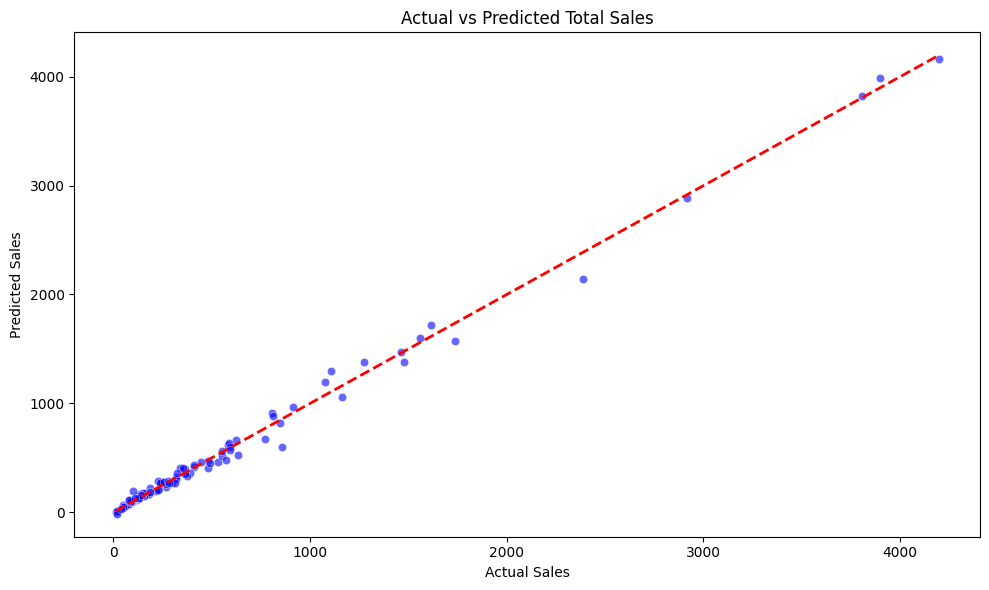

<ipython-input-14-ba03f7fde08f>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")


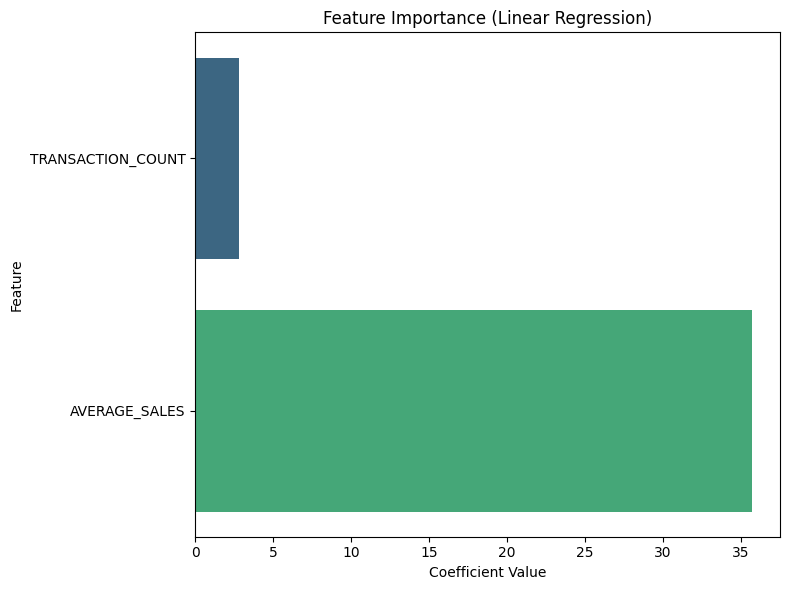

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming `sales_by_coupon` from your earlier analysis)
data = pd.DataFrame({
    "COUPON_UPC": sales_by_coupon["COUPON_UPC"],
    "TRANSACTION_COUNT": sales_by_coupon["TRANSACTION_COUNT"],
    "AVERAGE_SALES": sales_by_coupon["AVERAGE_SALES"],
    "TOTAL_SALES": sales_by_coupon["TOTAL_SALES"]
})

# Features and target
X = data[["TRANSACTION_COUNT", "AVERAGE_SALES"]]
y = data["TOTAL_SALES"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)

# Visualize actual vs predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Total Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.tight_layout()
plt.show()

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<ipython-input-15-0dc0318f8455>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coupons, x="COUPON_UPC", y="TOTAL_SALES", ax=ax[0], palette="viridis")
<ipython-input-15-0dc0318f8455>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coupons, x="COUPON_UPC", y="IMPACT_SCORE", ax=ax[1], palette="coolwarm")


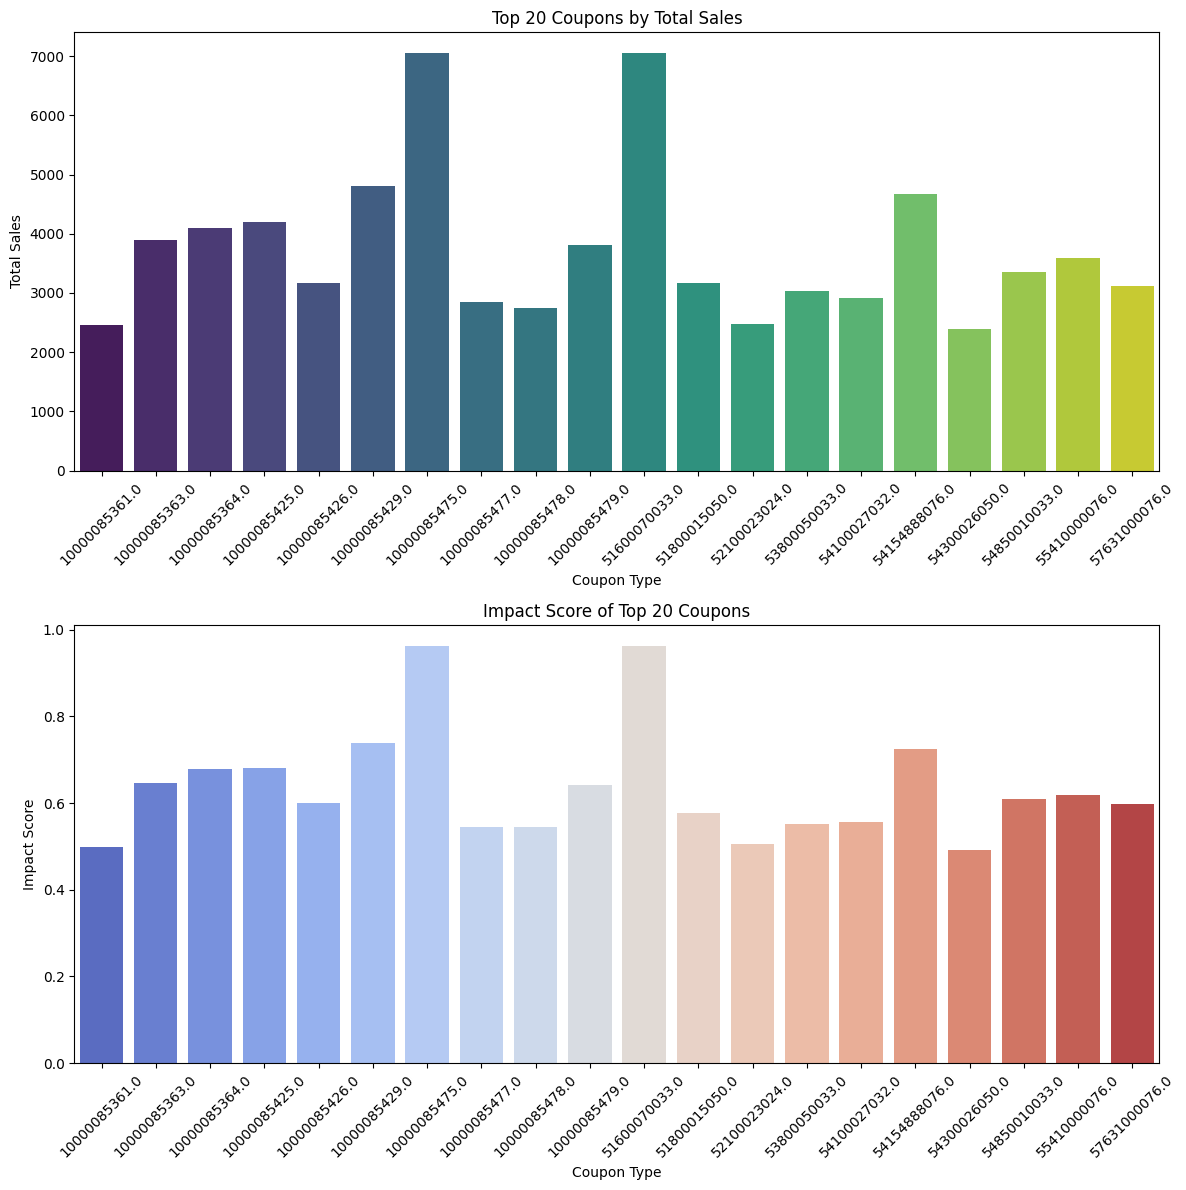

Top Coupons by Impact Score:
       COUPON_UPC  TOTAL_SALES  TRANSACTION_COUNT  AVERAGE_SALES  IMPACT_SCORE
218  5.160007e+10      7049.34               2462       2.863258      0.963134
18   1.000009e+10      7047.60               2503       2.815661      0.961858
15   1.000009e+10      4804.20               1726       2.783430      0.737652
375  5.415489e+10      4674.97               1677       2.787698      0.724968
11   1.000009e+10      4197.29               1465       2.865044      0.681344
3    1.000009e+10      4094.61               1372       2.984410      0.677736
2    1.000009e+10      3896.67               1405       2.773431      0.646703
22   1.000009e+10      3807.54               1345       2.830885      0.640933
473  5.541000e+10      3583.25               1263       2.837094      0.619050
436  5.485001e+10      3358.44               1109       3.028350      0.608594
12   1.000009e+10      3173.65               1003       3.164158      0.599654
531  5.763100e+10      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the top 20 coupons by total sales
top_coupons = sales_by_coupon.nlargest(20, 'TOTAL_SALES')

# Calculate a weighted impact score for each coupon
top_coupons['IMPACT_SCORE'] = (
    0.5 * (top_coupons['TOTAL_SALES'] / top_coupons['TOTAL_SALES'].max()) +
    0.3 * (top_coupons['AVERAGE_SALES'] / top_coupons['AVERAGE_SALES'].max()) +
    0.2 * (top_coupons['TRANSACTION_COUNT'] / top_coupons['TRANSACTION_COUNT'].max())
)

# Sort coupons by their impact score
top_coupons = top_coupons.sort_values('IMPACT_SCORE', ascending=False)

# Visualize total sales and impact score for the top 20 coupons
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Bar plot for total sales
sns.barplot(data=top_coupons, x="COUPON_UPC", y="TOTAL_SALES", ax=ax[0], palette="viridis")
ax[0].set_title("Top 20 Coupons by Total Sales")
ax[0].set_xlabel("Coupon Type")
ax[0].set_ylabel("Total Sales")
ax[0].tick_params(axis='x', rotation=45)

# Bar plot for impact score
sns.barplot(data=top_coupons, x="COUPON_UPC", y="IMPACT_SCORE", ax=ax[1], palette="coolwarm")
ax[1].set_title("Impact Score of Top 20 Coupons")
ax[1].set_xlabel("Coupon Type")
ax[1].set_ylabel("Impact Score")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print insights
print("Top Coupons by Impact Score:")
print(top_coupons[['COUPON_UPC', 'TOTAL_SALES', 'TRANSACTION_COUNT', 'AVERAGE_SALES', 'IMPACT_SCORE']])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
<ipython-input-16-2b36a9813061>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


Mean Squared Error (MSE): 2.8574056019477814
R-squared (R²): nan


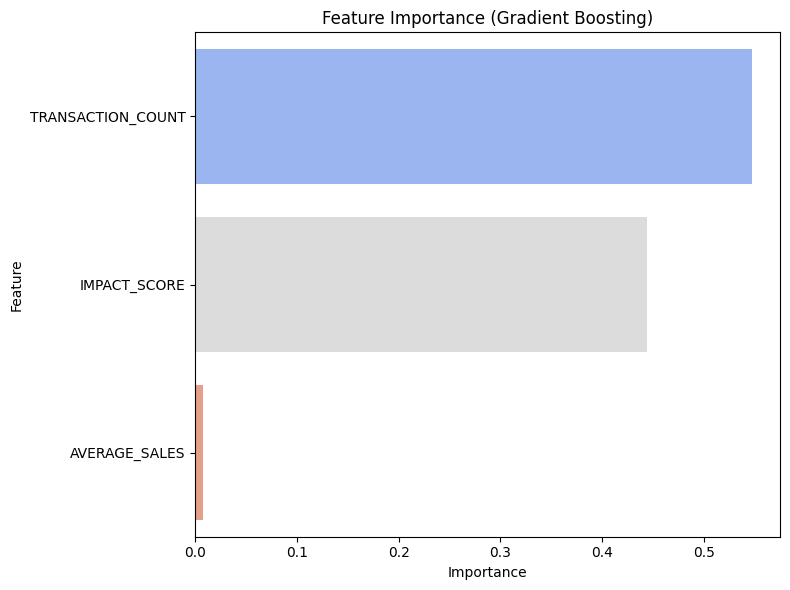

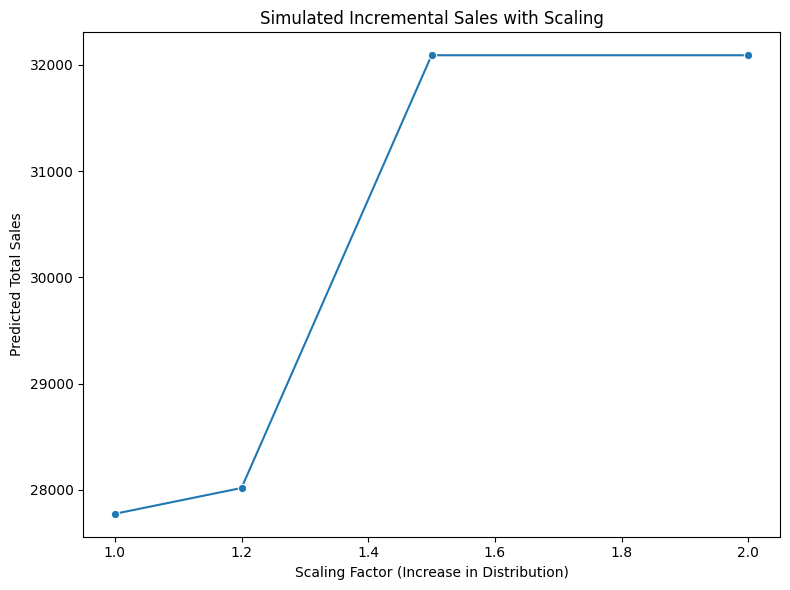

Simulation Results:
   Scaling Factor  Predicted Total Sales
0             1.0           27775.090386
1             1.2           28018.092796
2             1.5           32091.337484
3             2.0           32091.337484


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming top coupons data is available)
top_coupons = pd.DataFrame({
    'COUPON_UPC': [5160007033.0, 10000085475.0, 10000085429.0, 54154888076.0, 10000085426.0],
    'TOTAL_SALES': [7049.34, 7047.60, 4804.20, 4674.97, 4197.29],
    'TRANSACTION_COUNT': [2462, 2503, 1726, 1677, 1465],
    'AVERAGE_SALES': [2.863258, 2.815661, 2.783430, 2.787698, 2.865044],
    'IMPACT_SCORE': [0.963134, 0.961858, 0.737652, 0.724968, 0.681344]
})

# Features and target
X = top_coupons[['TRANSACTION_COUNT', 'AVERAGE_SALES', 'IMPACT_SCORE']]
y = top_coupons['TOTAL_SALES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization: Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

# Simulate Scaling: Incremental Sales Prediction
scaling_factors = [1, 1.2, 1.5, 2]  # Increase distribution by 20%, 50%, 100%
simulation_results = []

for factor in scaling_factors:
    scaled_X = X.copy()
    scaled_X['TRANSACTION_COUNT'] = scaled_X['TRANSACTION_COUNT'] * factor
    incremental_sales = gbr.predict(scaled_X)
    simulation_results.append({
        'Scaling Factor': factor,
        'Predicted Total Sales': incremental_sales.sum()
    })

# Convert simulation results to DataFrame
simulation_df = pd.DataFrame(simulation_results)

# Visualization: Incremental Sales Prediction
plt.figure(figsize=(8, 6))
sns.lineplot(data=simulation_df, x='Scaling Factor', y='Predicted Total Sales', marker='o')
plt.title('Simulated Incremental Sales with Scaling')
plt.xlabel('Scaling Factor (Increase in Distribution)')
plt.ylabel('Predicted Total Sales')
plt.tight_layout()
plt.show()

print("Simulation Results:")
print(simulation_df)


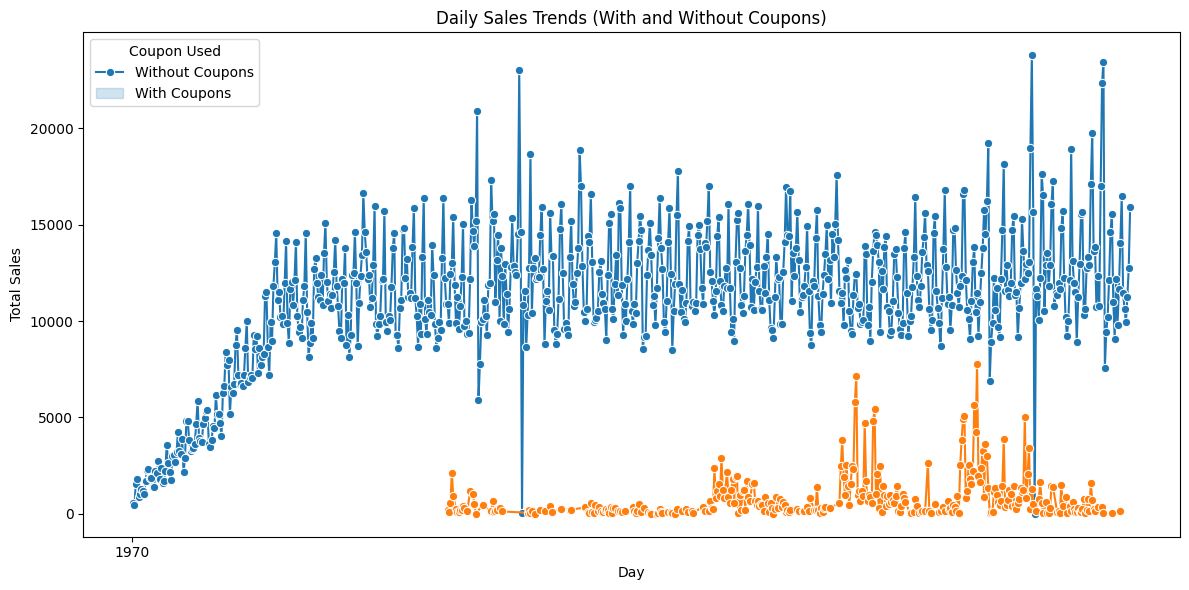

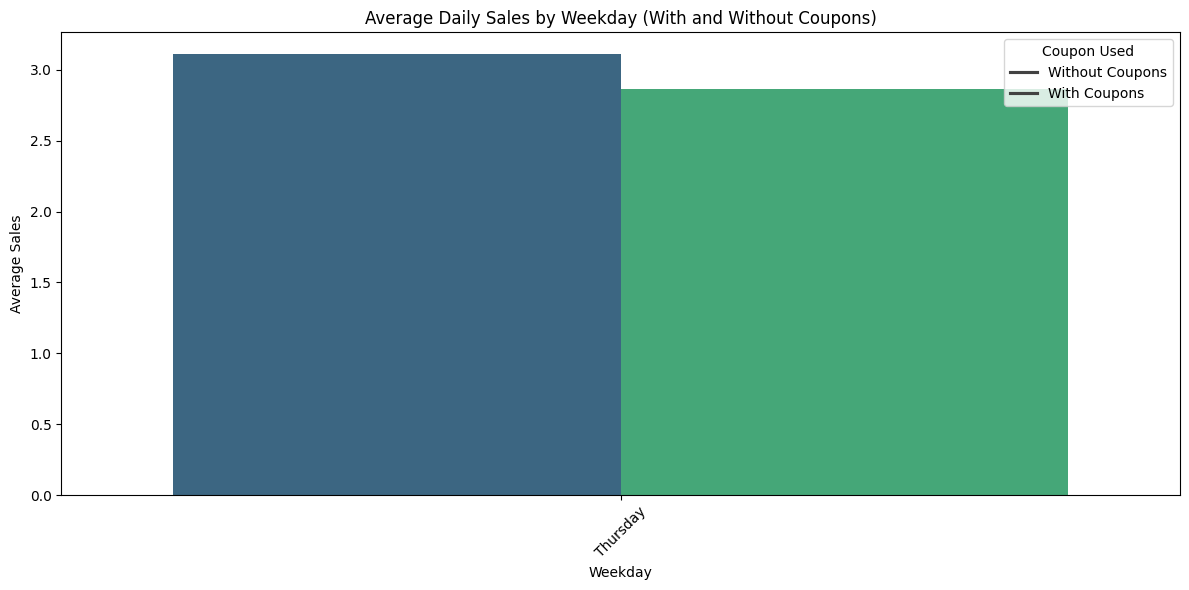

KeyError: "['COUPON_UPC'] not in index"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
campaign_desc = pd.read_csv("campaign_desc.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, campaign_desc]:
    df.columns = df.columns.str.upper()

# Merge transaction data with coupon redemption data
transactions_with_coupons = transaction_data.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

# Add a flag for transactions with coupons
transactions_with_coupons["COUPON_USED"] = transactions_with_coupons["COUPON_UPC"].notna()
transactions_with_coupons["DAY"] = pd.to_datetime(transactions_with_coupons["DAY"])

# Aggregate sales and transactions by day
daily_sales = transactions_with_coupons.groupby(["DAY", "COUPON_USED"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count")
).reset_index()

# Visualize daily sales trends (with and without coupons)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x="DAY", y="TOTAL_SALES", hue="COUPON_USED", marker="o")
plt.title("Daily Sales Trends (With and Without Coupons)")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Coupon Used", labels=["Without Coupons", "With Coupons"])
plt.tight_layout()
plt.show()

# Day of the Week Analysis
transactions_with_coupons["WEEKDAY"] = transactions_with_coupons["DAY"].dt.day_name()
weekday_sales = transactions_with_coupons.groupby(["WEEKDAY", "COUPON_USED"]).agg(
    AVERAGE_SALES=("SALES_VALUE", "mean"),
    TRANSACTION_COUNT=("SALES_VALUE", "count")
).reset_index()

# Visualize average sales by weekday
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_sales, x="WEEKDAY", y="AVERAGE_SALES", hue="COUPON_USED", palette="viridis")
plt.title("Average Daily Sales by Weekday (With and Without Coupons)")
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.legend(title="Coupon Used", labels=["Without Coupons", "With Coupons"])
plt.tight_layout()
plt.show()

# Duration of Coupon Campaigns
campaign_desc["START_DAY"] = pd.to_datetime(campaign_desc["START_DAY"])
campaign_desc["END_DAY"] = pd.to_datetime(campaign_desc["END_DAY"])
campaign_desc["DURATION"] = (campaign_desc["END_DAY"] - campaign_desc["START_DAY"]).dt.days

# Merge campaigns with transactions
transactions_with_coupons = transactions_with_coupons.merge(
    campaign_desc[["COUPON_UPC", "START_DAY", "END_DAY", "DURATION"]],
    on="COUPON_UPC",
    how="left"
)

# Analyze sales trends during campaign durations
campaign_sales = transactions_with_coupons.groupby(["DAY", "COUPON_USED"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count")
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=campaign_sales, x="DAY", y="TOTAL_SALES", hue="COUPON_USED", marker="o")
plt.title("Sales Trends During Coupon Campaign Durations")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.legend(title="Coupon Used", labels=["Without Coupons", "With Coupons"])
plt.tight_layout()
plt.show()

# Print descriptive stats for campaign durations
print("Descriptive Statistics for Coupon Campaign Durations:")
print(campaign_desc[["DURATION"]].describe())


In [ ]:
print(campaign_desc.columns)


Index(['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'DURATION'], dtype='object')


<ipython-input-1-f04ce0805d7f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=household_reach, x="MANUFACTURER", y="HOUSEHOLD_REACH", palette="viridis")


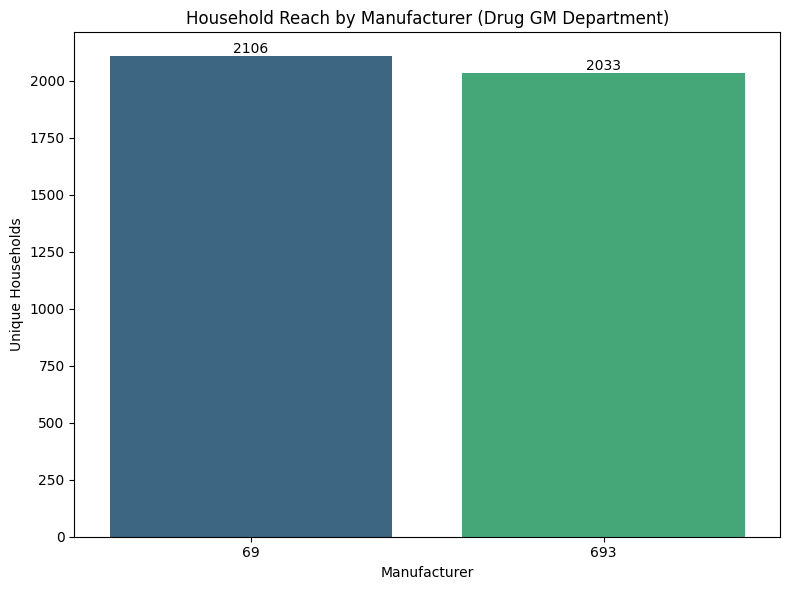

Household Reach Data (Drug GM Department):
   MANUFACTURER  HOUSEHOLD_REACH
0            69             2106
1           693             2033


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [transaction_data, product_data]:
    df.columns = df.columns.str.upper()

# Filter products for Drug GM department
drug_gm_products = product_data[product_data["DEPARTMENT"] == "DRUG GM"]

# Filter transactions for products in the Drug GM department
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Filter for manufacturers 69 and 693
# Include "MANUFACTURER" in merge to keep it in the filtered DataFrame
manufacturers = [69, 693]
drug_gm_transactions_filtered = drug_gm_transactions.merge(
    drug_gm_products[drug_gm_products["MANUFACTURER"].isin(manufacturers)][["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"  # Use 'inner' to keep only matching transactions
)

# Calculate household reach
household_reach = drug_gm_transactions_filtered.groupby("MANUFACTURER")["HOUSEHOLD_KEY"].nunique().reset_index()
household_reach.columns = ["MANUFACTURER", "HOUSEHOLD_REACH"]

# Visualize household reach
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=household_reach, x="MANUFACTURER", y="HOUSEHOLD_REACH", palette="viridis")
plt.title("Household Reach by Manufacturer (Drug GM Department)")
plt.xlabel("Manufacturer")
plt.ylabel("Unique Households")
plt.tight_layout()

# Add data labels to bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
        bar.get_height(),  # Position vertically at the top of the bar
        int(bar.get_height()),  # Label text
        ha='center',  # Center align the text
        va='bottom',  # Position the text at the bottom of the label
        fontsize=10  # Adjust font size
    )

plt.show()

# Print household reach data
print("Household Reach Data (Drug GM Department):")
print(household_reach)


Household Overlap Analysis:
Total Households for Manufacturer 69: 2106
Total Households for Manufacturer 693: 2033
Overlapping Households: 1810
Overlap Percentage for 69: 85.94%
Overlap Percentage for 693: 89.03%
Exclusive Households for 69: 296 (14.06%)
Exclusive Households for 693: 223 (10.97%)


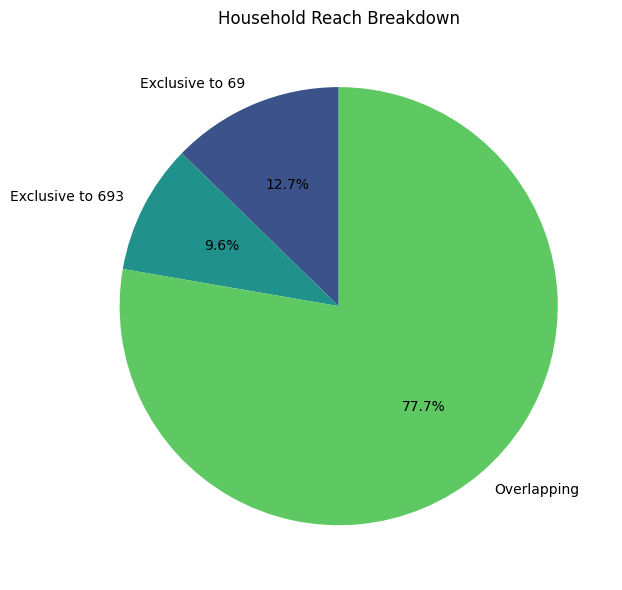

In [ ]:
# Identify unique households for each manufacturer
households_69 = set(drug_gm_transactions_filtered[drug_gm_transactions_filtered["MANUFACTURER"] == 69]["HOUSEHOLD_KEY"])
households_693 = set(drug_gm_transactions_filtered[drug_gm_transactions_filtered["MANUFACTURER"] == 693]["HOUSEHOLD_KEY"])

# Calculate overlaps and exclusives
overlapping_households = households_69.intersection(households_693)
exclusive_69 = households_69 - households_693
exclusive_693 = households_693 - households_69

# Calculate metrics
total_69 = len(households_69)
total_693 = len(households_693)
overlap_count = len(overlapping_households)
exclusive_69_count = len(exclusive_69)
exclusive_693_count = len(exclusive_693)

# Percentages
overlap_percentage_69 = (overlap_count / total_69) * 100
overlap_percentage_693 = (overlap_count / total_693) * 100
exclusive_percentage_69 = (exclusive_69_count / total_69) * 100
exclusive_percentage_693 = (exclusive_693_count / total_693) * 100

# Results
print("Household Overlap Analysis:")
print(f"Total Households for Manufacturer 69: {total_69}")
print(f"Total Households for Manufacturer 693: {total_693}")
print(f"Overlapping Households: {overlap_count}")
print(f"Overlap Percentage for 69: {overlap_percentage_69:.2f}%")
print(f"Overlap Percentage for 693: {overlap_percentage_693:.2f}%")
print(f"Exclusive Households for 69: {exclusive_69_count} ({exclusive_percentage_69:.2f}%)")
print(f"Exclusive Households for 693: {exclusive_693_count} ({exclusive_percentage_693:.2f}%)")

# Visualization
labels = ["Exclusive to 69", "Exclusive to 693", "Overlapping"]
sizes = [exclusive_69_count, exclusive_693_count, overlap_count]
colors = sns.color_palette("viridis", len(sizes))

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Household Reach Breakdown")
plt.tight_layout()
plt.show()


<ipython-input-7-59088c8f3368>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=household_features, x="CLUSTER", palette="viridis")


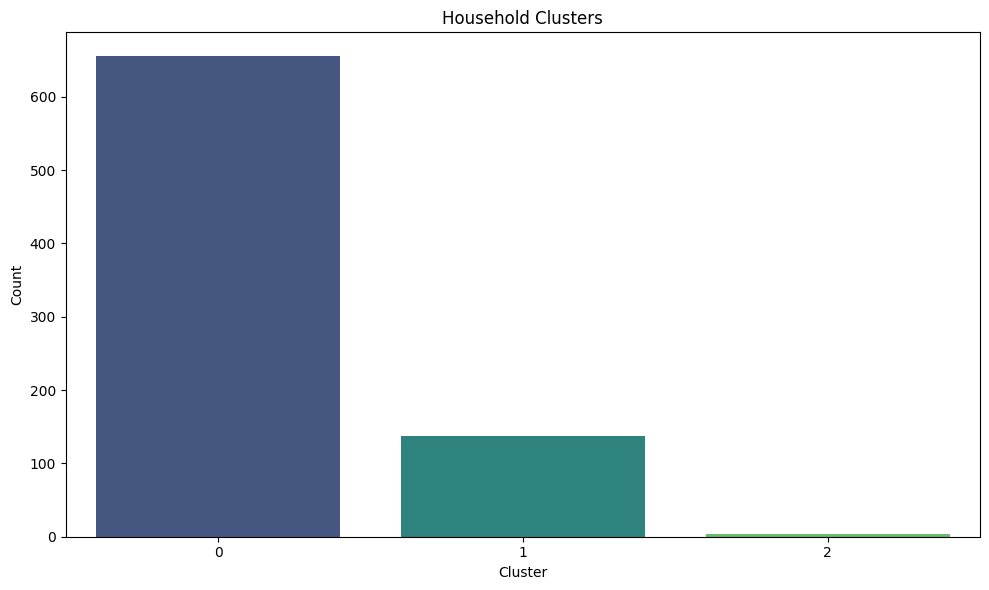

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
product_data = pd.read_csv("product.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")

# Capitalize column names for consistency
for df in [transaction_data, product_data, hh_demographic]:
    df.columns = df.columns.str.upper()

# Step 1: Filter products for Drug GM department
drug_gm_products = product_data[product_data["DEPARTMENT"] == "DRUG GM"]

# Step 2: Filter transactions for Drug GM products
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Step 3: Filter transactions for manufacturers 69 and 693
manufacturers = [69, 693]
drug_gm_transactions_filtered = drug_gm_transactions.merge(
    drug_gm_products[drug_gm_products["MANUFACTURER"].isin(manufacturers)][["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Step 4: Merge demographic data
transactions_with_demographics = drug_gm_transactions_filtered.merge(
    hh_demographic, on="HOUSEHOLD_KEY", how="inner"
)

# Step 5: Aggregate data for clustering
household_features = transactions_with_demographics.groupby("HOUSEHOLD_KEY").agg(
    TOTAL_SALES_69=("SALES_VALUE", lambda x: x[transactions_with_demographics.loc[x.index, "MANUFACTURER"] == 69].sum()),
    TOTAL_SALES_693=("SALES_VALUE", lambda x: x[transactions_with_demographics.loc[x.index, "MANUFACTURER"] == 693].sum()),
    TOTAL_TRANSACTIONS=("SALES_VALUE", "count"),  # Counting sales occurrences as transactions
    CLASSIFICATION_1=("CLASSIFICATION_1", "first"),  # Assuming household classification is categorical
    CLASSIFICATION_2=("CLASSIFICATION_2", "first")
).reset_index()

# Fill NaN values with 0
household_features.fillna(0, inplace=True)

# Preprocess data for clustering
numeric_features = ["TOTAL_SALES_69", "TOTAL_SALES_693", "TOTAL_TRANSACTIONS"]
scaler = StandardScaler()
household_features_scaled = scaler.fit_transform(household_features[numeric_features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
household_features["CLUSTER"] = kmeans.fit_predict(household_features_scaled)

# Visualize cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=household_features, x="CLUSTER", palette="viridis")
plt.title("Household Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Analyze clusters
cluster_summary = household_features.groupby("CLUSTER").agg(
    AVG_SALES_69=("TOTAL_SALES_69", "mean"),
    AVG_SALES_693=("TOTAL_SALES_693", "mean"),
    AVG_TRANSACTIONS=("TOTAL_TRANSACTIONS", "mean"),
    AVG_CLASSIFICATION_1=("CLASSIFICATION_1", "mean"),
    AVG_CLASSIFICATION_2=("CLASSIFICATION_2", "mean"),
).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Save results to CSV
household_features.to_csv("household_clusters.csv", index=False)
cluster_summary.to_csv("cluster_summary.csv", index=False)


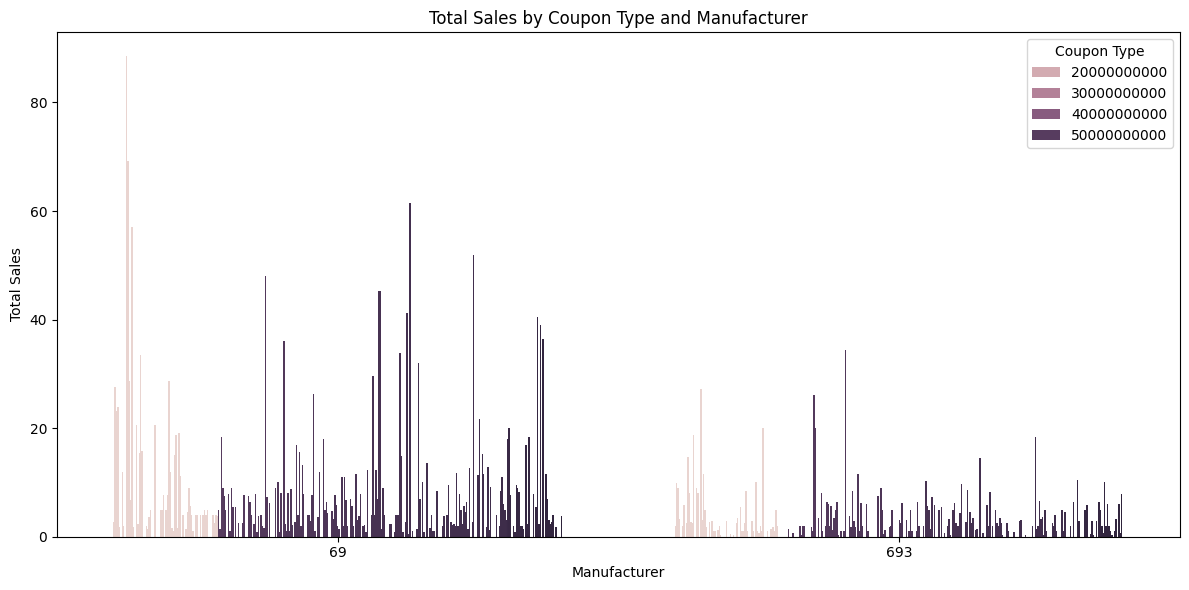

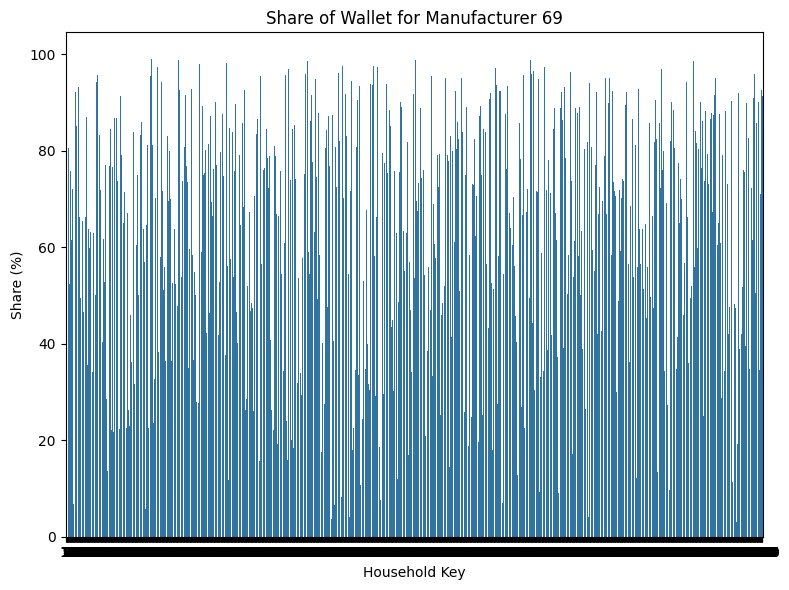

Coupon Usage Analysis:
   MANUFACTURER    COUPON_UPC  TOTAL_SALES  TRANSACTION_COUNT  AVERAGE_SALES
0            69  1.000009e+10         2.79                  2       1.395000
1            69  1.000009e+10        27.56                  4       6.890000
2            69  1.000009e+10        23.21                 11       2.110000
3            69  1.000009e+10        23.84                  6       3.973333
4            69  1.000009e+10         1.79                  1       1.790000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter products for Drug GM department and manufacturers 69, 693
manufacturers = [69, 693]
drug_gm_products = product_data[
    (product_data["DEPARTMENT"] == "DRUG GM") &
    (product_data["MANUFACTURER"].isin(manufacturers))
]

# Step 2: Filter transactions for Drug GM products
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Step 3: Add manufacturer information to transactions
drug_gm_transactions = drug_gm_transactions.merge(
    drug_gm_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Step 4: Filter transactions for overlapping households
overlapping_households = drug_gm_transactions.groupby("HOUSEHOLD_KEY")["MANUFACTURER"].nunique()
overlapping_households = overlapping_households[overlapping_households > 1].index
overlapping_transactions = drug_gm_transactions[
    drug_gm_transactions["HOUSEHOLD_KEY"].isin(overlapping_households)
]

# Step 5: Analyze Coupon Usage Patterns
transactions_with_coupons = overlapping_transactions.merge(
    coupon_redempt_data, on=["HOUSEHOLD_KEY", "DAY"], how="left"
)
coupon_analysis = transactions_with_coupons.groupby(["MANUFACTURER", "COUPON_UPC"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
    AVERAGE_SALES=("SALES_VALUE", "mean")
).reset_index()

# Step 6: Engagement Potential Assessment
household_sales = overlapping_transactions.groupby(["HOUSEHOLD_KEY", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).unstack(fill_value=0)
household_sales.columns = ["SALES_69", "SALES_693"]
household_sales["SHARE_69"] = household_sales["SALES_69"] / (
    household_sales["SALES_69"] + household_sales["SALES_693"]
) * 100
household_sales["SHARE_693"] = household_sales["SALES_693"] / (
    household_sales["SALES_69"] + household_sales["SALES_693"]
) * 100

# Step 7: Coupon Effectiveness Analysis
coupon_roi = coupon_analysis.copy()
coupon_roi["ROI"] = coupon_roi["TOTAL_SALES"] / coupon_roi["TRANSACTION_COUNT"]

# Step 8: Simulate Sales Uplift for High-ROI Coupons
high_roi_coupons = coupon_roi[coupon_roi["MANUFACTURER"] == 69].nlargest(5, "ROI")
uplift_simulation = high_roi_coupons.copy()
uplift_simulation["SIMULATED_SALES"] = uplift_simulation["TOTAL_SALES"] * 1.5

# Visualizations: Coupon Usage Patterns
plt.figure(figsize=(12, 6))
sns.barplot(data=coupon_analysis, x="MANUFACTURER", y="TOTAL_SALES", hue="COUPON_UPC")
plt.title("Total Sales by Coupon Type and Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales")
plt.legend(title="Coupon Type")
plt.tight_layout()
plt.show()

# Visualizations: Engagement Potential
plt.figure(figsize=(8, 6))
sns.barplot(data=household_sales.reset_index(), x="HOUSEHOLD_KEY", y="SHARE_69")
plt.title("Share of Wallet for Manufacturer 69")
plt.xlabel("Household Key")
plt.ylabel("Share (%)")
plt.tight_layout()
plt.show()

# Save Results
coupon_analysis.to_csv("coupon_usage_analysis.csv", index=False)
household_sales.to_csv("household_engagement_analysis.csv", index=False)
uplift_simulation.to_csv("sales_uplift_simulation.csv", index=False)

# Print Results
print("Coupon Usage Analysis:")
print(coupon_analysis.head())



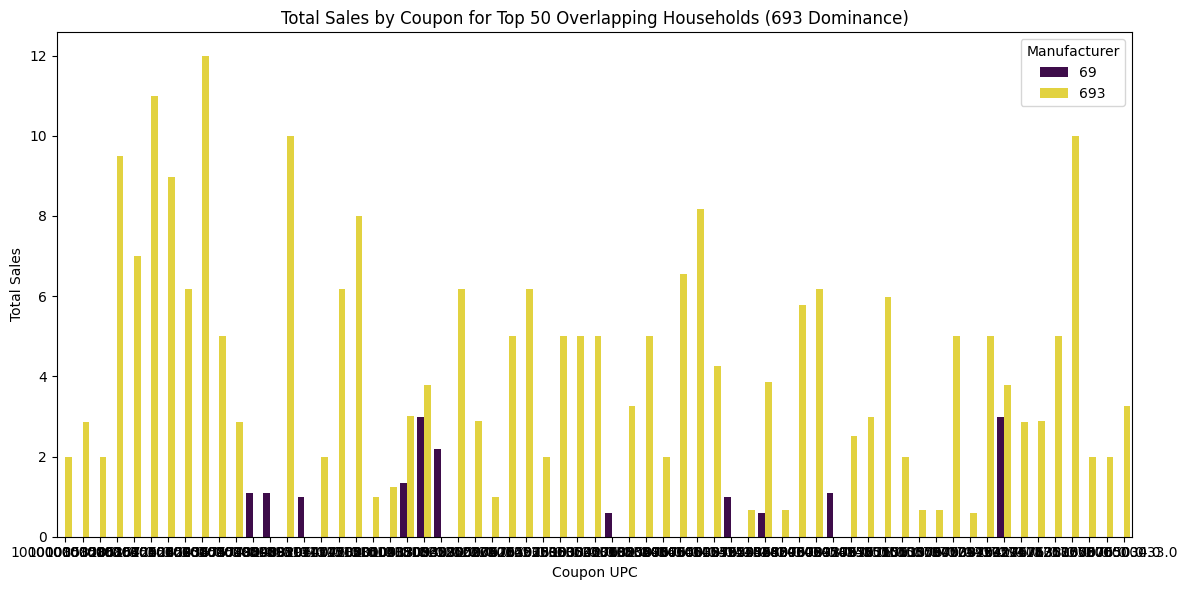

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter products for Drug GM department and manufacturers 69, 693
manufacturers = [69, 693]
drug_gm_products = product_data[
    (product_data["DEPARTMENT"] == "DRUG GM") &
    (product_data["MANUFACTURER"].isin(manufacturers))
]

# Step 2: Filter transactions for Drug GM products
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Step 3: Add manufacturer information to transactions
drug_gm_transactions = drug_gm_transactions.merge(
    drug_gm_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Step 4: Identify overlapping households
overlapping_households = drug_gm_transactions.groupby("HOUSEHOLD_KEY")["MANUFACTURER"].nunique()
overlapping_households = overlapping_households[overlapping_households > 1].index
overlapping_transactions = drug_gm_transactions[
    drug_gm_transactions["HOUSEHOLD_KEY"].isin(overlapping_households)
]

# Step 5: Aggregate sales for overlapping households by manufacturer
household_sales = overlapping_transactions.groupby(["HOUSEHOLD_KEY", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).unstack(fill_value=0)
household_sales.columns = ["SALES_69", "SALES_693"]

# Step 6: Calculate the sales difference in favor of 693
household_sales["DIFFERENCE_693_OVER_69"] = household_sales["SALES_693"] - household_sales["SALES_69"]

# Step 7: Identify top 50 households contributing most to Manufacturer 693
top_50_households = household_sales.nlargest(50, "DIFFERENCE_693_OVER_69").reset_index()

# Step 8: Analyze coupon usage for these households
top_50_transactions = overlapping_transactions[
    overlapping_transactions["HOUSEHOLD_KEY"].isin(top_50_households["HOUSEHOLD_KEY"])
]
top_50_coupons = top_50_transactions.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

coupon_analysis = top_50_coupons.groupby(["COUPON_UPC", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
    AVERAGE_SALES=("SALES_VALUE", "mean")
).reset_index()

# Visualizations: Top Coupons Used
plt.figure(figsize=(12, 6))
sns.barplot(
    data=coupon_analysis,
    x="COUPON_UPC",
    y="TOTAL_SALES",
    hue="MANUFACTURER",
    palette="viridis"
)
plt.title("Total Sales by Coupon for Top 50 Overlapping Households (693 Dominance)")
plt.xlabel("Coupon UPC")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()



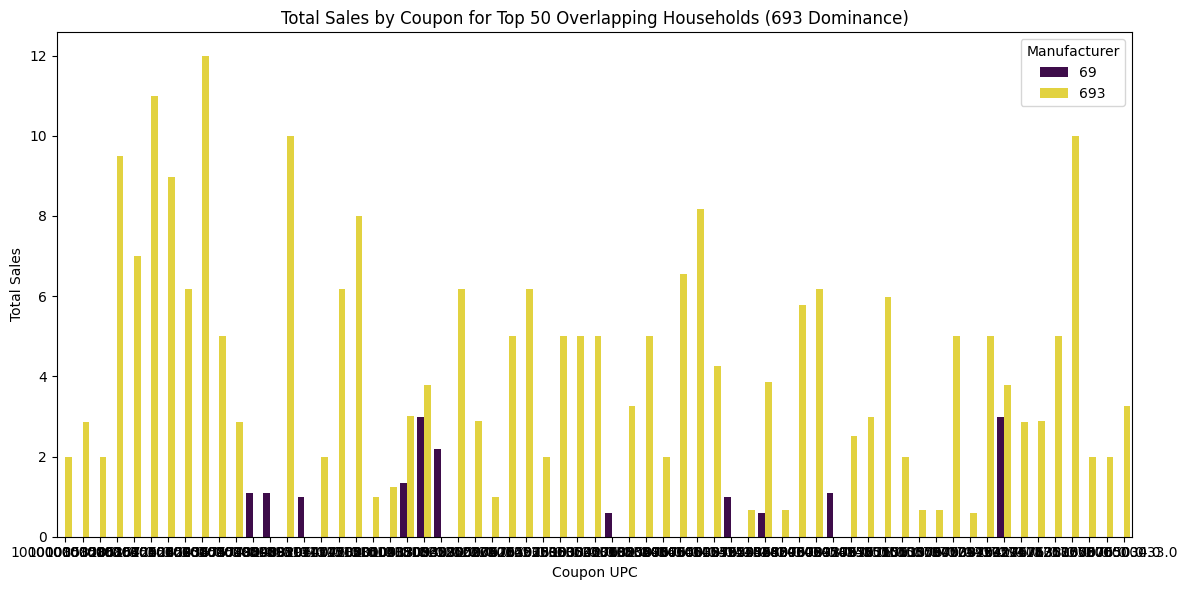

   HOUSEHOLD_KEY  SALES_69  SALES_693  DIFFERENCE_693_OVER_69
0            957     11.01     294.38                  283.37
1           1631     34.73     244.10                  209.37
2           1795     10.96     158.68                  147.72
3           2400     33.23     166.76                  133.53
4            715     43.28     170.88                  127.60


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, product_data]:
    df.columns = df.columns.str.upper()

# Filter products for Drug GM department and manufacturers 69, 693
manufacturers = [69, 693]
drug_gm_products = product_data[
    (product_data["DEPARTMENT"] == "DRUG GM") &
    (product_data["MANUFACTURER"].isin(manufacturers))
]

# Filter transactions for Drug GM products
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Add manufacturer information to transactions
drug_gm_transactions = drug_gm_transactions.merge(
    drug_gm_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Identify overlapping households
overlapping_households = drug_gm_transactions.groupby("HOUSEHOLD_KEY")["MANUFACTURER"].nunique()
overlapping_households = overlapping_households[overlapping_households > 1].index
overlapping_transactions = drug_gm_transactions[
    drug_gm_transactions["HOUSEHOLD_KEY"].isin(overlapping_households)
]

# Aggregate sales for overlapping households by manufacturer
household_sales = overlapping_transactions.groupby(["HOUSEHOLD_KEY", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).unstack(fill_value=0)
household_sales.columns = ["SALES_69", "SALES_693"]

# Calculate the sales difference in favor of 693
household_sales["DIFFERENCE_693_OVER_69"] = household_sales["SALES_693"] - household_sales["SALES_69"]

# Identify top 50 households contributing most to Manufacturer 693
top_50_households = household_sales.nlargest(50, "DIFFERENCE_693_OVER_69").reset_index()

# Analyze coupon usage for these households
top_50_transactions = overlapping_transactions[
    overlapping_transactions["HOUSEHOLD_KEY"].isin(top_50_households["HOUSEHOLD_KEY"])
]
top_50_coupons = top_50_transactions.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

coupon_analysis = top_50_coupons.groupby(["COUPON_UPC", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
    AVERAGE_SALES=("SALES_VALUE", "mean")
).reset_index()

# Add descriptive statistics for household sales and coupon usage
household_stats = household_sales.describe()
coupon_stats = coupon_analysis.describe()

# Visualizations: Top Coupons Used
plt.figure(figsize=(12, 6))
sns.barplot(
    data=coupon_analysis,
    x="COUPON_UPC",
    y="TOTAL_SALES",
    hue="MANUFACTURER",
    palette="viridis"
)
plt.title("Total Sales by Coupon for Top 50 Overlapping Households (693 Dominance)")
plt.xlabel("Coupon UPC")
plt.ylabel("Total Sales")
plt.legend(title="Manufacturer")
plt.tight_layout()
plt.show()

# Save Results
top_50_households.to_csv("top_50_households.csv", index=False)
coupon_analysis.to_csv("top_50_coupon_analysis.csv", index=False)

print(top_50_households.head())

<ipython-input-5-5ffcd59399d9>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


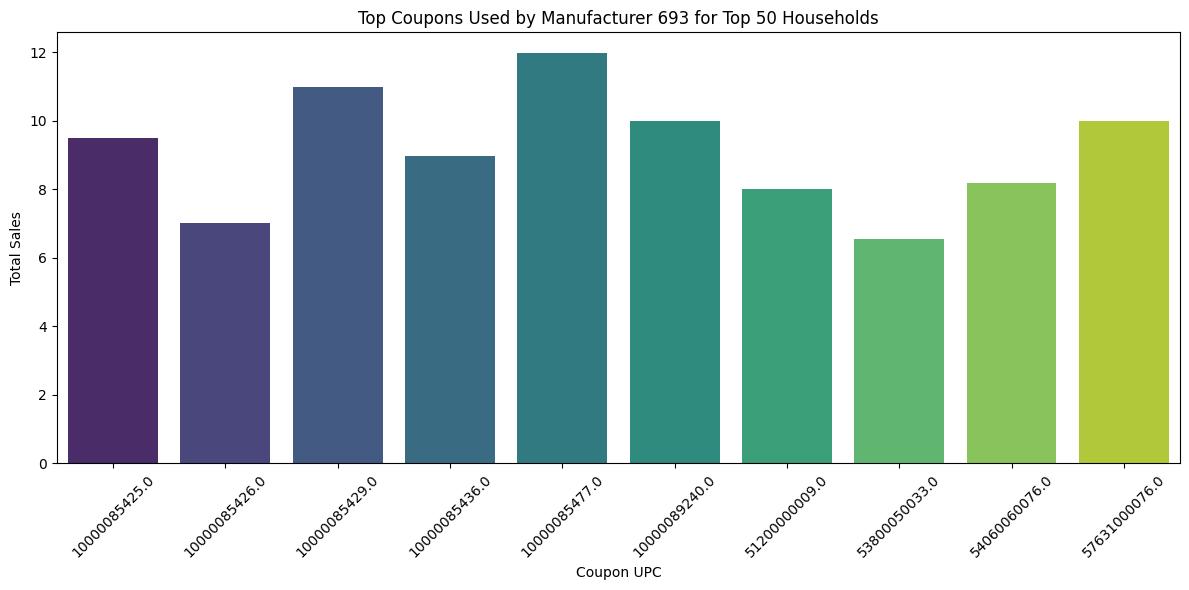

Top Coupons Used by Manufacturer 693 for Top 50 Households:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, product_data]:
    df.columns = df.columns.str.upper()

# Filter products for Drug GM department and manufacturers 69, 693
manufacturers = [69, 693]
drug_gm_products = product_data[
    (product_data["DEPARTMENT"] == "DRUG GM") &
    (product_data["MANUFACTURER"].isin(manufacturers))
]

# Filter transactions for Drug GM products
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Add manufacturer information to transactions
drug_gm_transactions = drug_gm_transactions.merge(
    drug_gm_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Identify overlapping households
overlapping_households = drug_gm_transactions.groupby("HOUSEHOLD_KEY")["MANUFACTURER"].nunique()
overlapping_households = overlapping_households[overlapping_households > 1].index
overlapping_transactions = drug_gm_transactions[
    drug_gm_transactions["HOUSEHOLD_KEY"].isin(overlapping_households)
]

# Aggregate sales for overlapping households by manufacturer
household_sales = overlapping_transactions.groupby(["HOUSEHOLD_KEY", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).unstack(fill_value=0)
household_sales.columns = ["SALES_69", "SALES_693"]

# Calculate the sales difference in favor of 693
household_sales["DIFFERENCE_693_OVER_69"] = household_sales["SALES_693"] - household_sales["SALES_69"]

# Identify top 50 households contributing most to Manufacturer 693
top_50_households = household_sales.nlargest(50, "DIFFERENCE_693_OVER_69").reset_index()

# Filter transactions for top 50 households
top_50_transactions = overlapping_transactions[
    overlapping_transactions["HOUSEHOLD_KEY"].isin(top_50_households["HOUSEHOLD_KEY"])
]

# Merge coupon redemption data for top 50 households
top_50_coupons = top_50_transactions.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

# Filter for Manufacturer 693
coupons_693 = top_50_coupons[top_50_coupons["MANUFACTURER"] == 693]

# Analyze coupons used by 693
coupons_693_analysis = coupons_693.groupby("COUPON_UPC").agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
    AVERAGE_SALES=("SALES_VALUE", "mean")
).reset_index()

# Sort by total sales
coupons_693_analysis = coupons_693_analysis.sort_values(by="TOTAL_SALES", ascending=False)

# Visualization: Top Coupons Used by 693
plt.figure(figsize=(12, 6))
sns.barplot(
    data=coupons_693_analysis.head(10),
    x="COUPON_UPC",
    y="TOTAL_SALES",
    palette="viridis"
)
plt.title("Top Coupons Used by Manufacturer 693 for Top 50 Households")
plt.xlabel("Coupon UPC")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save Results
coupons_693_analysis.to_csv("coupons_used_by_693.csv", index=False)

# Print Results
print("Top Coupons Used by Manufacturer 693 for Top 50 Households:")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
transaction_data = pd.read_csv("transaction_data.csv")
coupon_redempt_data = pd.read_csv("coupon_redempt.csv")
product_data = pd.read_csv("product.csv")

# Capitalize column names for consistency
for df in [transaction_data, coupon_redempt_data, product_data]:
    df.columns = df.columns.str.upper()

# Step 1: Filter products for Drug GM department and manufacturers 69, 693
manufacturers = [69, 693]
drug_gm_products = product_data[
    (product_data["DEPARTMENT"] == "DRUG GM") &
    (product_data["MANUFACTURER"].isin(manufacturers))
]

# Step 2: Filter transactions for Drug GM products
drug_gm_transactions = transaction_data[
    transaction_data["PRODUCT_ID"].isin(drug_gm_products["PRODUCT_ID"])
]

# Step 3: Add manufacturer information to transactions
drug_gm_transactions = drug_gm_transactions.merge(
    drug_gm_products[["PRODUCT_ID", "MANUFACTURER"]],
    on="PRODUCT_ID",
    how="inner"
)

# Step 4: Identify overlapping households
overlapping_households = drug_gm_transactions.groupby("HOUSEHOLD_KEY")["MANUFACTURER"].nunique()
overlapping_households = overlapping_households[overlapping_households > 1].index
overlapping_transactions = drug_gm_transactions[
    drug_gm_transactions["HOUSEHOLD_KEY"].isin(overlapping_households)
]

# Step 5: Aggregate sales for overlapping households by manufacturer
household_sales = overlapping_transactions.groupby(["HOUSEHOLD_KEY", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum")
).unstack(fill_value=0)
household_sales.columns = ["SALES_69", "SALES_693"]

# Step 6: Calculate sales difference in favor of 693
household_sales["DIFFERENCE_693_OVER_69"] = household_sales["SALES_693"] - household_sales["SALES_69"]

# Step 7: Identify top 50 households contributing most to Manufacturer 693
top_50_households = household_sales.nlargest(50, "DIFFERENCE_693_OVER_69").reset_index()

# Step 8: Filter transactions for top 50 households
top_50_transactions = overlapping_transactions[
    overlapping_transactions["HOUSEHOLD_KEY"].isin(top_50_households["HOUSEHOLD_KEY"])
]

# Step 9: Merge coupon redemption data for top 50 households
top_50_coupons = top_50_transactions.merge(
    coupon_redempt_data[["HOUSEHOLD_KEY", "DAY", "COUPON_UPC"]],
    on=["HOUSEHOLD_KEY", "DAY"],
    how="left"
)

# Step 10: Filter coupons for Manufacturer 693
coupons_693 = top_50_coupons[top_50_coupons["MANUFACTURER"] == 693]

# Prepare dataset for modeling
data = top_50_coupons.groupby(["HOUSEHOLD_KEY", "COUPON_UPC", "MANUFACTURER"]).agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
).reset_index()

# Create feature matrix and target variable
X = pd.get_dummies(data[["HOUSEHOLD_KEY", "COUPON_UPC", "MANUFACTURER"]], drop_first=True)
y = data["TOTAL_SALES"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict sales for Manufacturer 69
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Simulate sales for Manufacturer 69 using top-performing coupons from 693
top_coupons = coupons_693.groupby("COUPON_UPC").agg(
    TOTAL_SALES=("SALES_VALUE", "sum"),
    TRANSACTION_COUNT=("SALES_VALUE", "count"),
).sort_values(by="TOTAL_SALES", ascending=False).head(5)

simulation_data = pd.DataFrame({
    "HOUSEHOLD_KEY": top_50_households["HOUSEHOLD_KEY"].repeat(len(top_coupons)),
    "COUPON_UPC": top_coupons.index.repeat(len(top_50_households)),
    "MANUFACTURER": 69  # Simulating for Manufacturer 69
})

simulation_X = pd.get_dummies(simulation_data, drop_first=True)
simulated_sales = model.predict(simulation_X)

# Aggregate predicted sales
simulated_total_sales = simulated_sales.sum()

print("\nSimulated Total Sales for Manufacturer 69 Using Top Coupons from 693:")
print(simulated_total_sales)


Mean Squared Error (MSE): 6.276029121735001
R-squared (R²): 0.0096411367463336

Simulated Total Sales for Manufacturer 69 Using Top Coupons from 693:
765.8549999999999


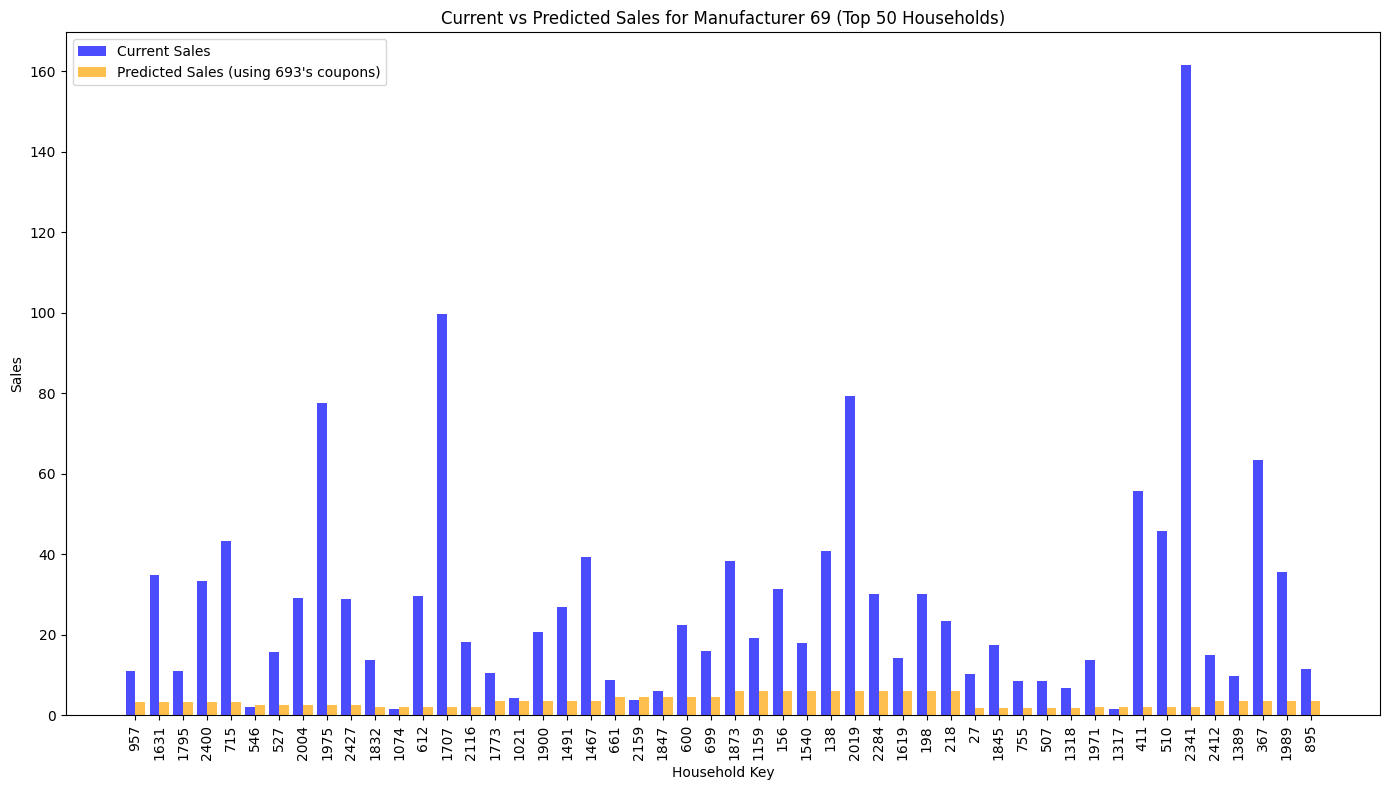

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the current sales of 69 to the simulation dataset for comparison
comparison_data = top_50_households[["HOUSEHOLD_KEY", "SALES_69"]].copy()
comparison_data["PREDICTED_SALES"] = simulated_sales[:50]  # Ensure simulated sales align with top households

# Visualization: Current vs Predicted Sales for Manufacturer 69
plt.figure(figsize=(14, 8))

# Bar positions
x = range(len(comparison_data))
bar_width = 0.4

# Plot current sales
plt.bar(x, comparison_data["SALES_69"], width=bar_width, label="Current Sales", alpha=0.7, color="blue")

# Plot predicted sales
plt.bar(
    [p + bar_width for p in x],
    comparison_data["PREDICTED_SALES"],
    width=bar_width,
    label="Predicted Sales (using 693's coupons)",
    alpha=0.7,
    color="orange"
)

# Add labels, title, and legend
plt.title("Current vs Predicted Sales for Manufacturer 69 (Top 50 Households)")
plt.xlabel("Household Key")
plt.ylabel("Sales")
plt.xticks([p + bar_width / 2 for p in x], comparison_data["HOUSEHOLD_KEY"], rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()